# Setting Up

In [1]:
options(digits = 3)

Sys.setenv(LANG = "en")

library(haven)
library(JWileymisc)
library(ggplot2)
library(ggpubr)
library(visreg)
library(survey)
library(tidyverse)
library(dplyr)
library(ggExtra)
library(psych)
library(ggthemes)
library(scales)
library(olsrr)
library(modelsummary)
library(marginaleffects)
library(tidyverse)
library(betareg)
library(brms)
library(corrplot)

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The following object is masked from ‘package:JWileymisc’:

    cor2c

In [2]:
# read in data
setwd('/home/pavgreen/Documents/LRGS/EEG/alt/study')

db <- as.data.frame(read_csv("mind.csv"))

#rem <- which(db[[1]] %in% c(9024))
#db <- db[-rem, ]

Rows: 45 Columns: 87
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): When is your date of birth?, Which sex were you assigned at birth?...
dbl (80): Please enter your participant number, Please rate each of the foll...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Demographic

## Age

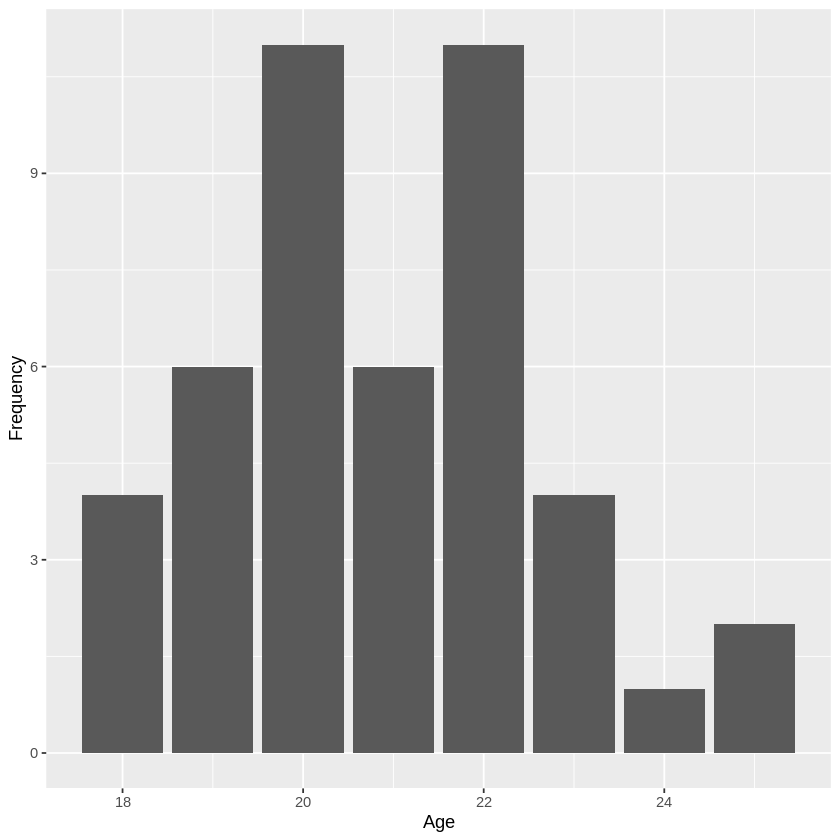

In [3]:
db %>%
    select(c(1:4)) %>%
        mutate(Age = floor(time_length(difftime(Sys.Date(), dmy(db[[2]])), "years"))) %>%
            ggplot(aes(Age)) +
                geom_bar() +
                    ylab("Frequency")

## Sex and Gender

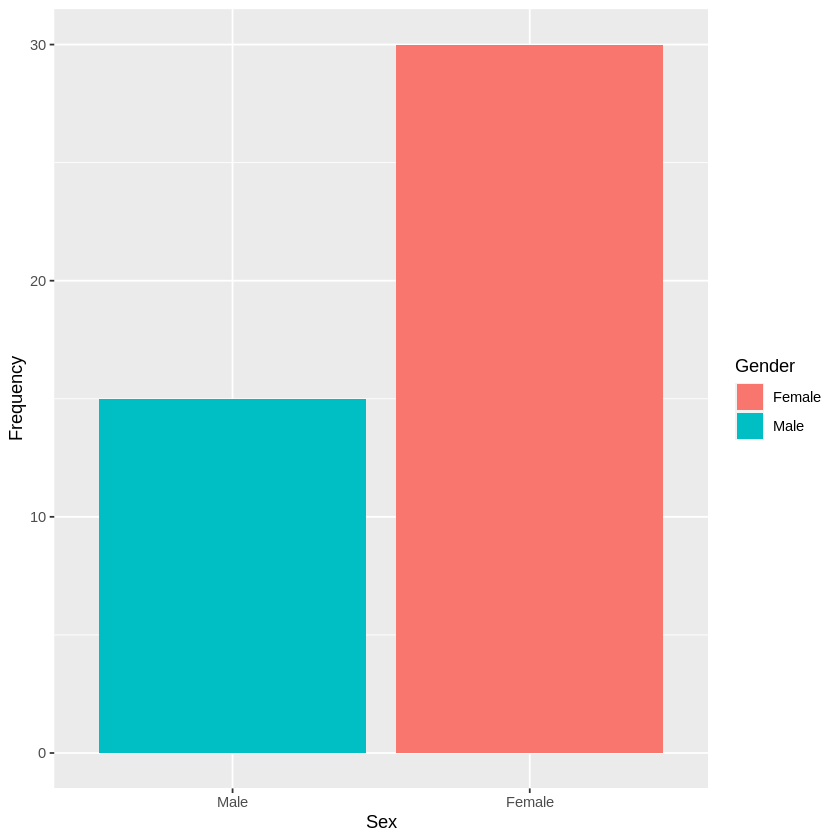

In [4]:
db %>% 
    select(c(1, 3, 4)) %>%
        mutate(Sex = factor(db[[3]], levels = c("Male", "Female")), Gender = factor(db[[4]])) %>%
            ggplot(aes(Sex, fill = Gender)) +
                geom_bar() +
                    ylab("Frequency")

db <- db %>% mutate(Sex = ifelse(db[[3]] == 'Female', 1L, 0L))

sex <- db[["Sex"]]

## Mindfulness Experience

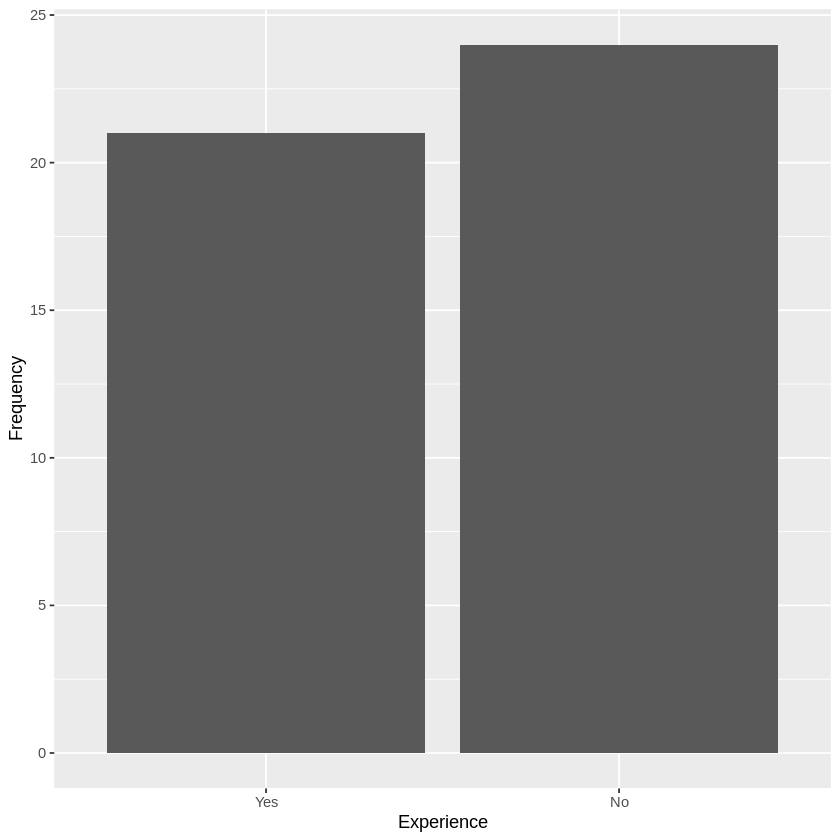

In [5]:
db <- db %>%
        mutate(Experience = factor(db[[5]], levels = c("Yes", "No"))) 

db %>%
    ggplot(aes(Experience)) +
        geom_bar() +
            ylab("Frequency")

In [6]:
db %>%
    filter(db[, 5] == "Yes") %>%
        select(c(5:8))

Have you ever practiced meditation, mindfulness, or contemplative prayer?
1  Yes                                                                      
2  Yes                                                                      
3  Yes                                                                      
4  Yes                                                                      
5  Yes                                                                      
6  Yes                                                                      
7  Yes                                                                      
8  Yes                                                                      
9  Yes                                                                      
10 Yes                                                                      
11 Yes                                                                      
12 Yes                                                                      
13 Yes                                                                      
14 Yes                                                                      
15 Yes                                                                      
16 Yes                                                                      
17 Yes                                                                      
18 Yes                                                                      
19 Yes                                                                      
20 Yes                                                                      
21 Yes                                                                      
   If you responded 'yes' to the previous question, please briefly describe the kind of practice you engage in most frequently
1  breathing meditation, diary\\ mood tracking                                                                                
2  mindfulness - pay attention to my surroundings or what i eat (pay attention to the taste and my chewing)                   
3  mindfulness                                                                                                                
4  mindfulness                                                                                                                
5  meditation for 5-10 minutes a few years ago                                                                                
6  meditate once in a while                                                                                                   
7  meditation                                                                                                                 
8  Journaling, affirmations, meditation, artistics form of expression for grounding (painting)                                
9  mindfulness                                                                                                                
10 Occasionally practice meditation when tired or stressed                                                                    
11 meditation but very rarely                                                                                                 
12 meditation                                                                                                                 
13 mindfulness                                                                                                                
14 Sitting with my thoughts in a quiet and open space, whilst reminding myself with positive affirmations.                    
15 meditation                                                                                                                 
16 prayer                                                                                                                     
17 Usually guided meditation where I play a YouTube meditation video and follow along.                                        
18 I have practiced med

In [7]:
db <- db %>% mutate(Experience = ifelse(Experience == 'Yes', 1L, 0L))

exp <- db[["Experience"]]

---

# Cronbach Alpha

## FFMQ

In [8]:
db[, c(1, 9:47)]

Please enter your participant number
1  9001                                
2  9002                                
3  9003                                
4  9004                                
5  9005                                
6  9006                                
7  9007                                
8  9008                                
9  9009                                
10 9011                                
11 9012                                
12 9013                                
13 9014                                
14 9015                                
15 9016                                
16 9017                                
17 9018                                
18 9019                                
19 9020                                
20 9021                                
21 9022                                
22 9023                                
23 9024                                
24 9026                                
25 9027                                
26 9028                                
27 9029                                
28 9030                                
29 9031                                
30 9032                                
31 9033                                
32 9034                                
33 9036                                
34 9037                                
35 9038                                
36 9039                                
37 9040                                
38 9041                                
39 9050                                
40 9051                                
41 9052                                
42 9053                                
43 9054                                
44 9055                                
45 9056                                
   Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]
1  3                                                                                                                                                                                                                                            
2  3                                                                                                                                                                                                                                            
3  3                                                                                                                                                                                                                                            
4  3                                                                                                                                                                                                                                            
5  3                                                                                                                                                                                                                                            
6  3                                                                                                                                                                                                                                            
7  3                                                                                                                                                                                                                                            
8  3                                                                                                                                                                                                                                       

In [9]:
psych::alpha(x = db[, 9:47])

Warning message in psych::alpha(x = db[, 9:47]):
“Some items were negatively correlated with the total scale and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [I notice the smells and aromas of things.] ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option


Reliability analysis   
Call: psych::alpha(x = db[, 9:47])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.89      0.89    0.99      0.17   8 0.023    3 0.45     0.15

    95% confidence boundaries 
         lower alpha upper
Feldt     0.84  0.89  0.93
Duhachek  0.84  0.89  0.94

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                     raw_alpha
Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]                                                             0.89
Please rate each of the following statements u

## STAI

In [10]:
db[, c(1, 60:79)]

Please enter your participant number
1  9001                                
2  9002                                
3  9003                                
4  9004                                
5  9005                                
6  9006                                
7  9007                                
8  9008                                
9  9009                                
10 9011                                
11 9012                                
12 9013                                
13 9014                                
14 9015                                
15 9016                                
16 9017                                
17 9018                                
18 9019                                
19 9020                                
20 9021                                
21 9022                                
22 9023                                
23 9024                                
24 9026                                
25 9027                                
26 9028                                
27 9029                                
28 9030                                
29 9031                                
30 9032                                
31 9033                                
32 9034                                
33 9036                                
34 9037                                
35 9038                                
36 9039                                
37 9040                                
38 9041                                
39 9050                                
40 9051                                
41 9052                                
42 9053                                
43 9054                                
44 9055                                
45 9056                                
   Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]
1  3                                                                                                                                                                                                                        
2  3                                                                                                                                                                                                                        
3  2                                                                                                                                                                                                                        
4  1                                                                                                                                                                                                                        
5  4                                                                                                                                                                                                                        
6  2                                                                                                                                                                                                                        
7  2                                                                                                                                                                                                                        
8  3                                                                                                                                                                                                                        
9  3                                                                                                                                                                          

In [11]:
psych::alpha(x = db[, 60:79])


Reliability analysis   
Call: psych::alpha(x = db[, 60:79])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.92      0.92    0.96      0.38  12 0.016  2.5 0.6     0.37

    95% confidence boundaries 
         lower alpha upper
Feldt     0.89  0.92  0.95
Duhachek  0.89  0.92  0.96

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                  raw_alpha
Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]                                                                              0.92
Please read the following statements and select the i

---

# Behavioural Data

In [12]:
db[, c(1, 81:86)]

Please enter your participant number Go Correct noGo Correct delta Go
1  9001                                 98.8       81.0         62.8    
2  9002                                 97.5       72.0         63.5    
3  9003                                 95.0       67.0         62.6    
4  9004                                 97.8       65.0         65.2    
5  9005                                 98.2       80.0         62.6    
6  9006                                 97.5       78.6         62.8    
7  9007                                 96.1       44.8         67.8    
8  9008                                 96.5       68.0         63.5    
9  9009                                 98.2       52.5         68.3    
10 9011                                 98.2       74.0         63.8    
11 9012                                 96.0       67.0         63.3    
12 9013                                 99.0       91.0         61.0    
13 9014                                 97.5       43.0         69.3    
14 9015                                 98.2       49.0         68.7    
15 9016                                 98.2       69.0         64.8    
16 9017                                 93.7       28.0         69.3    
17 9018                                 96.5       67.7         63.6    
18 9019                                 97.2       83.0         61.2    
19 9020                                 96.4       57.3         65.9    
20 9021                                 92.7       45.9         65.1    
21 9022                                 93.5       78.0         59.2    
22 9023                                 95.7       53.1         66.3    
23 9024                                 89.2       38.5         61.1    
24 9026                                 91.5       58.0         61.6    
25 9027                                 91.0       30.1         66.4    
26 9028                                 96.0       52.5         66.5    
27 9029                                 97.7       49.5         68.5    
28 9030                                 95.7       66.0         63.3    
29 9031                                 98.2       93.0         60.0    
30 9032                                 90.6       64.6         59.5    
31 9033                                 96.2       67.0         63.2    
32 9034                                 97.5       84.0         61.2    
33 9036                                 95.5       74.0         61.5    
34 9037                                 95.5       69.0         62.4    
35 9038                                 98.0       73.0         63.6    
36 9039                                 94.4       42.1         68.0    
37 9040                                 95.0       63.0         63.4    
38 9041                                 98.2       87.0         61.2    
39 9050                                 94.0       66.0         61.8    
40 9051                                 91.7       68.0         59.7    
41 9052                                 97.5       83.0         61.3    
42 9053                                 84.6       69.0         53.6    
43 9054                                 95.7       76.8         61.4    
44 9055                                 87.9       50.5         60.4    
45 9056                                 96.7       55.0         66.3    
   Go Correct 1 noGo Correct 1 Go Correct 2
1  98.5         80.0           99.0        
2  98.5         72.0           96.5        
3  94.0         68.0           96.0        
4  98.0         82.0           97.5        
5  98.0         88.0           98.5        
6  96.5         76.0           98.5        
7  96.5         52.0           95.6        
8  96.0         66.0           97.0        
9  97.5         58.0           99.0        
10 99.0         80.0           97.5        
11 97.5         74.0           94.5        
12 99.0         92.0           99.0        
13 97.0         48.0           98.0        
14 97.5         46.0         

In [13]:
db[db[82] < 60, c(1, 82, 83)] 
db[db[82] > 80, c(1, 82, 83)] 

Please enter your participant number noGo Correct delta Go
7  9007                                 44.8         67.8    
9  9009                                 52.5         68.3    
13 9014                                 43.0         69.3    
14 9015                                 49.0         68.7    
16 9017                                 28.0         69.3    
19 9020                                 57.3         65.9    
20 9021                                 45.9         65.1    
22 9023                                 53.1         66.3    
23 9024                                 38.5         61.1    
24 9026                                 58.0         61.6    
25 9027                                 30.1         66.4    
26 9028                                 52.5         66.5    
27 9029                                 49.5         68.5    
36 9039                                 42.1         68.0    
44 9055                                 50.5         60.4    
45 9056                                 55.0         66.3

Please enter your participant number noGo Correct delta Go
1  9001                                 81           62.8    
12 9013                                 91           61.0    
18 9019                                 83           61.2    
29 9031                                 93           60.0    
32 9034                                 84           61.2    
38 9041                                 87           61.2    
41 9052                                 83           61.3

# FFMQ and STAI

In [14]:
db[, c(1, 48:59)]

Please enter your participant number Observing Total Describing Total
1  9001                                 23              25              
2  9002                                 26              30              
3  9003                                 30              30              
4  9004                                 34              38              
5  9005                                 29               9              
6  9006                                 28              22              
7  9007                                 22              26              
8  9008                                 29              26              
9  9009                                 18              16              
10 9011                                 18              19              
11 9012                                 21              25              
12 9013                                 13              29              
13 9014                                 18              22              
14 9015                                 31              24              
15 9016                                 27              24              
16 9017                                 30              27              
17 9018                                 15              22              
18 9019                                 29              22              
19 9020                                 32              26              
20 9021                                 28              29              
21 9022                                 29              21              
22 9023                                 28              19              
23 9024                                 28              24              
24 9026                                 29              32              
25 9027                                 27              21              
26 9028                                 30              27              
27 9029                                 15              20              
28 9030                                 22              28              
29 9031                                 26              30              
30 9032                                 29              29              
31 9033                                 30              34              
32 9034                                 28              23              
33 9036                                 32              30              
34 9037                                 20              28              
35 9038                                 20              24              
36 9039                                 30              13              
37 9040                                 28              29              
38 9041                                 18              25              
39 9050                                 28              21              
40 9051                                 25              16              
41 9052                                 25              22              
42 9053                                 33              11              
43 9054                                 37              40              
44 9055                                 26              26              
45 9056                                 22              30              
   ActAware Total Nonjudging Total Nonreactivity Total FFMQ Total
1  17             19               15                   99       
2  29             29               24                  138       
3  27             20               19                  126       
4  37             29               26                  164       
5  23             14               20                   95       
6  28             29               20                  127       
7  28             31               17                  124       
8  18             17               24                  114       
9  23             28               24              

In [15]:
db[, c(1, 60:80)]

Please enter your participant number
1  9001                                
2  9002                                
3  9003                                
4  9004                                
5  9005                                
6  9006                                
7  9007                                
8  9008                                
9  9009                                
10 9011                                
11 9012                                
12 9013                                
13 9014                                
14 9015                                
15 9016                                
16 9017                                
17 9018                                
18 9019                                
19 9020                                
20 9021                                
21 9022                                
22 9023                                
23 9024                                
24 9026                                
25 9027                                
26 9028                                
27 9029                                
28 9030                                
29 9031                                
30 9032                                
31 9033                                
32 9034                                
33 9036                                
34 9037                                
35 9038                                
36 9039                                
37 9040                                
38 9041                                
39 9050                                
40 9051                                
41 9052                                
42 9053                                
43 9054                                
44 9055                                
45 9056                                
   Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]
1  3                                                                                                                                                                                                                        
2  3                                                                                                                                                                                                                        
3  2                                                                                                                                                                                                                        
4  1                                                                                                                                                                                                                        
5  4                                                                                                                                                                                                                        
6  2                                                                                                                                                                                                                        
7  2                                                                                                                                                                                                                        
8  3                                                                                                                                                                                                                        
9  3                                                                                                                                                                          

---

# Setting variables

In [16]:
obt = db[["Observing Total"]]
dbt = db[["Describing Total"]]
aat = db[["ActAware Total"]]
nrt = db[["Nonreactivity Total"]]
njt = db[["Nonjudging Total"]]
stai = db[["STAI Total"]]
ffmqt = db[["FFMQ Total"]]

gc = db[["Go Correct"]]
ngc = db[["noGo Correct"]]
dgc = db[["delta Go"]]

gc1 = db[["Go Correct 1"]]
ngc1 = db[["noGo Correct 1"]]

gc2 = db[["Go Correct 2"]]
ngc2 = db[["noGo Correct 2"]]

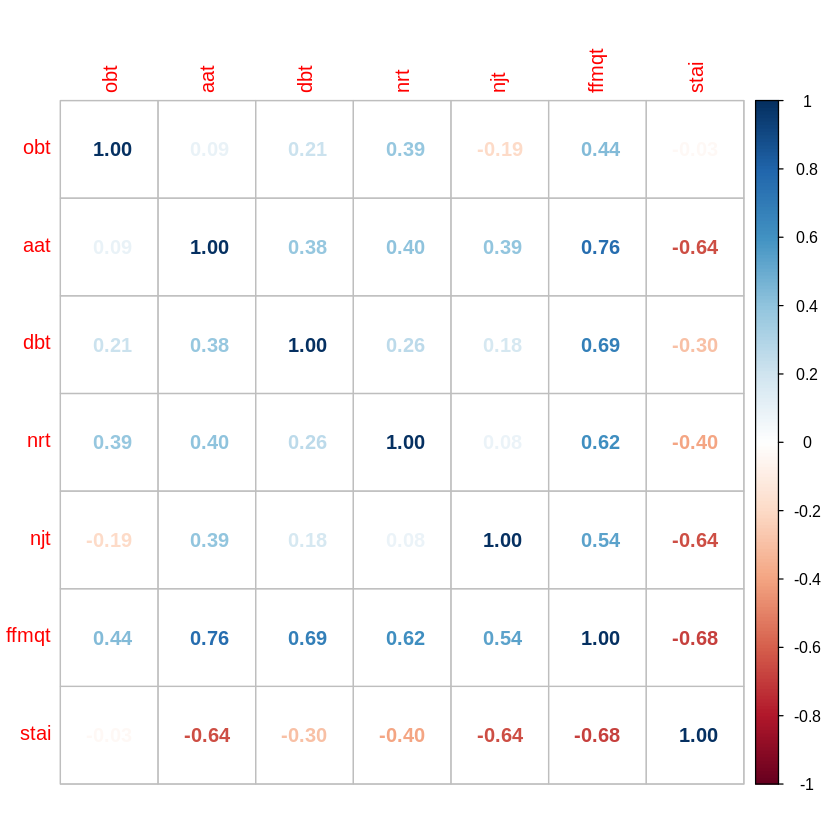

In [17]:
df <- data.frame(obt, aat, dbt, nrt, njt, ffmqt, stai)

corrplot(cor(df), method = "number")

# Linear Probability Models

## Exploratory 

### Mindfulness Experience and Go Accuracy


Call:
lm(formula = gc ~ exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.533  -1.174   0.871   1.805   3.871 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   95.129      0.641  148.48   <2e-16 ***
exp1           0.770      0.938    0.82     0.42    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.14 on 43 degrees of freedom
Multiple R-squared:  0.0154,	Adjusted R-squared:  -0.00745 
F-statistic: 0.674 on 1 and 43 DF,  p-value: 0.416


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.8631          1e-04 
Kolmogorov-Smirnov        0.1756         0.1245 
Cramer-von Mises          2.8891         0.0000 
Anderson-Darling          1.9504         0.0000 
-----------------------------------------------

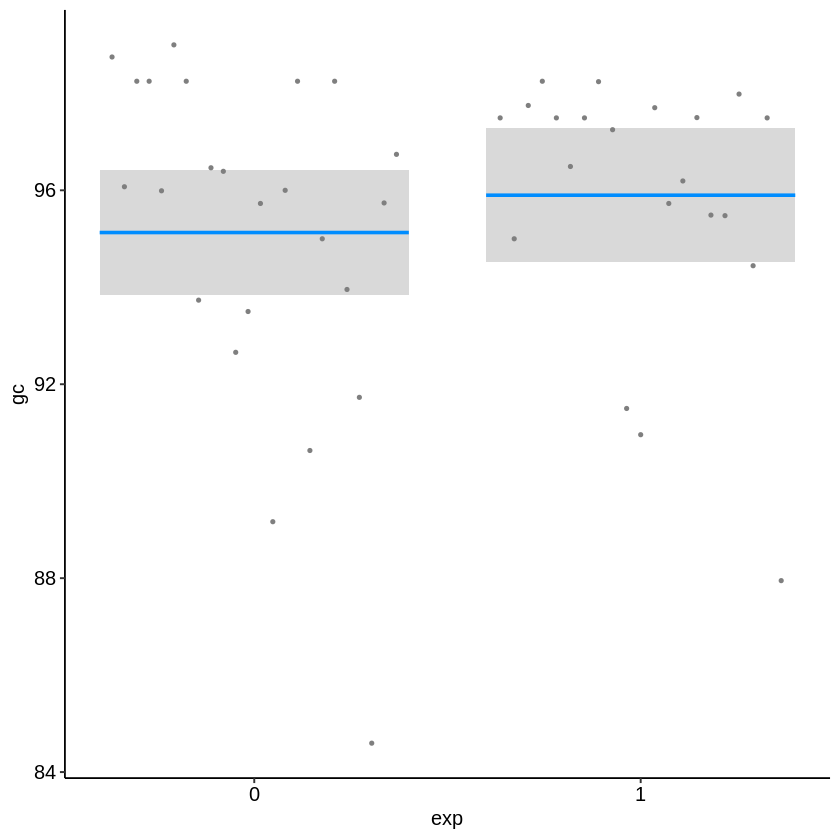

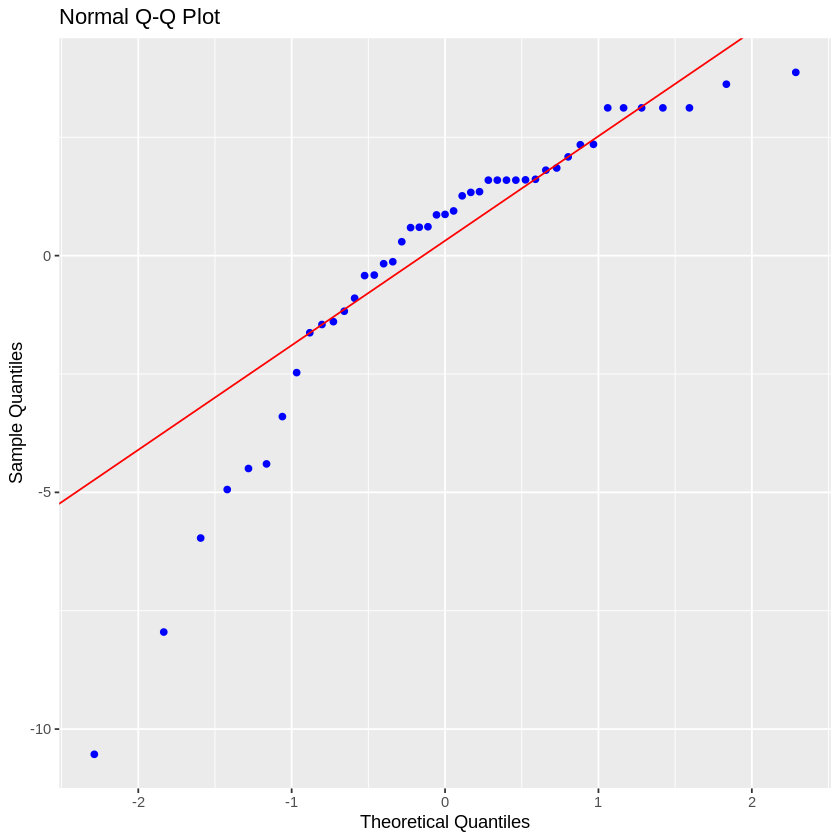


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : gc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               1.2785     1    0.2582 
 ----------------------------------------
  simultaneous     1.2785     1    0.2582 
 ----------------------------------------

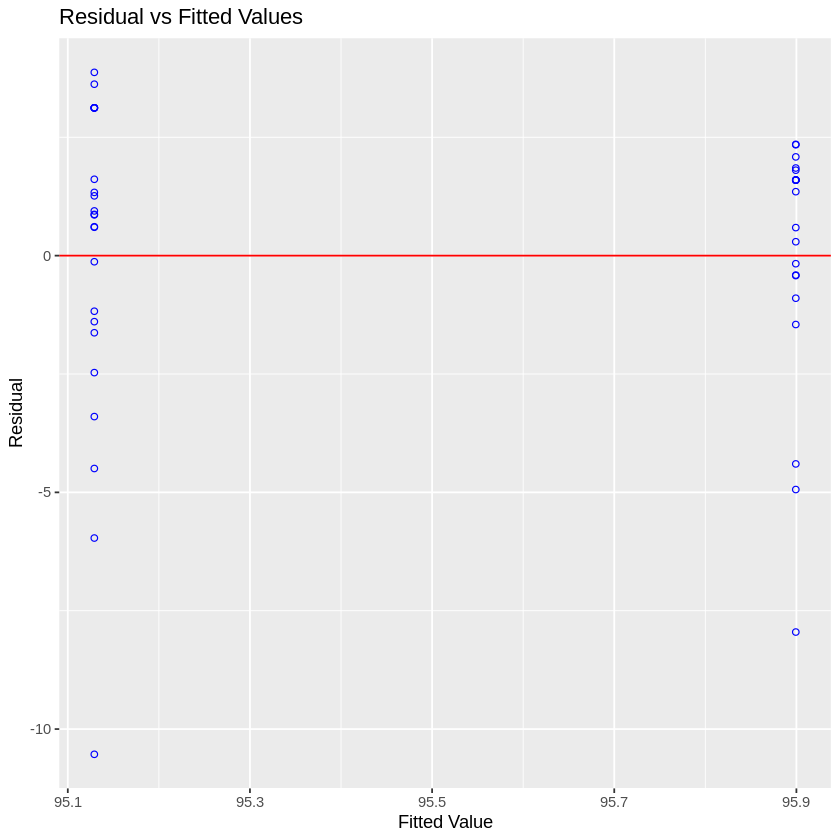

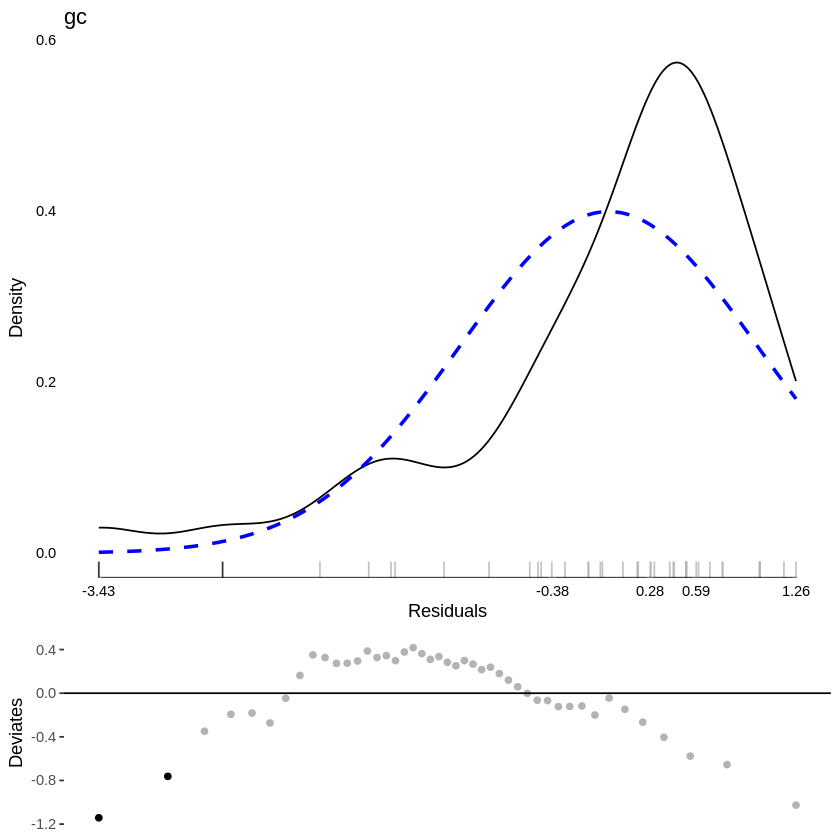

[1] 42 44

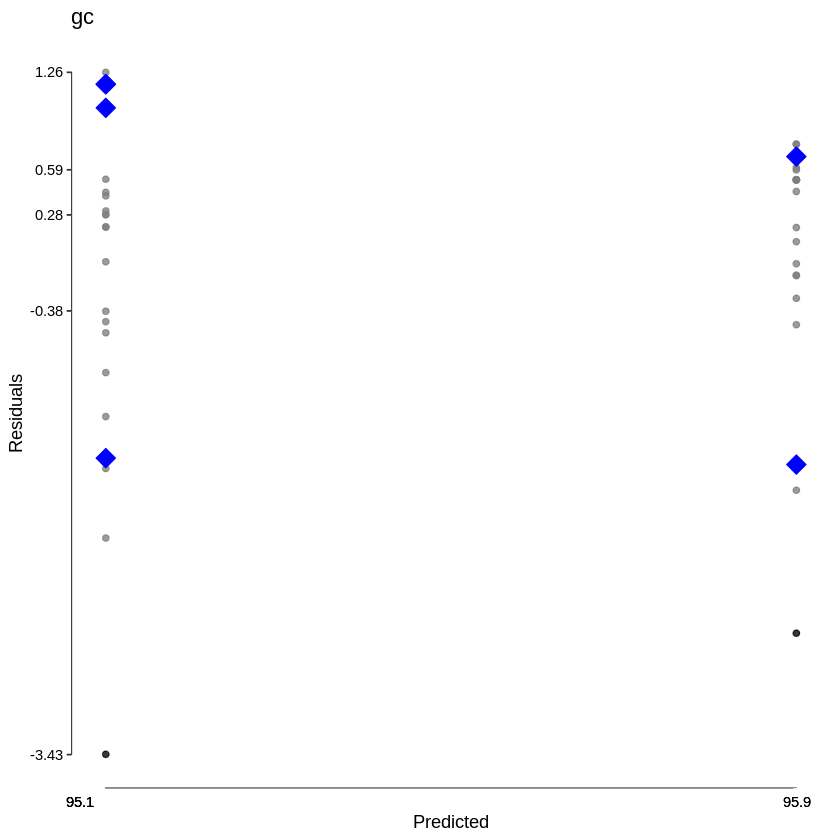

In [18]:
exp <- factor(exp)
expi <- lm(gc ~ exp)

summary(expi)
visreg(expi, xvar = "exp", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(expi)
ols_plot_resid_qq(expi)
ols_plot_resid_fit(expi)
ols_test_breusch_pagan(expi, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(expi, ev.perc = .005)
plot(md)

rem = which(md$residualDiagnostics$Residuals$isEV == "Yes")
rem

### Mindfulness Experience and noGo Accuracy


Call:
lm(formula = ngc ~ exp)

Residuals:
   Min     1Q Median     3Q    Max 
-36.28 -11.75   2.63   9.72  28.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.2777     3.2217   19.95   <2e-16 ***
exp1          0.0929     4.7160    0.02     0.98    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.8 on 43 degrees of freedom
Multiple R-squared:  9.03e-06,	Adjusted R-squared:  -0.0232 
F-statistic: 0.000388 on 1 and 43 DF,  p-value: 0.984


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9747         0.4247 
Kolmogorov-Smirnov        0.1316         0.4164 
Cramer-von Mises           3.75          0.0000 
Anderson-Darling          0.4227         0.3076 
-----------------------------------------------

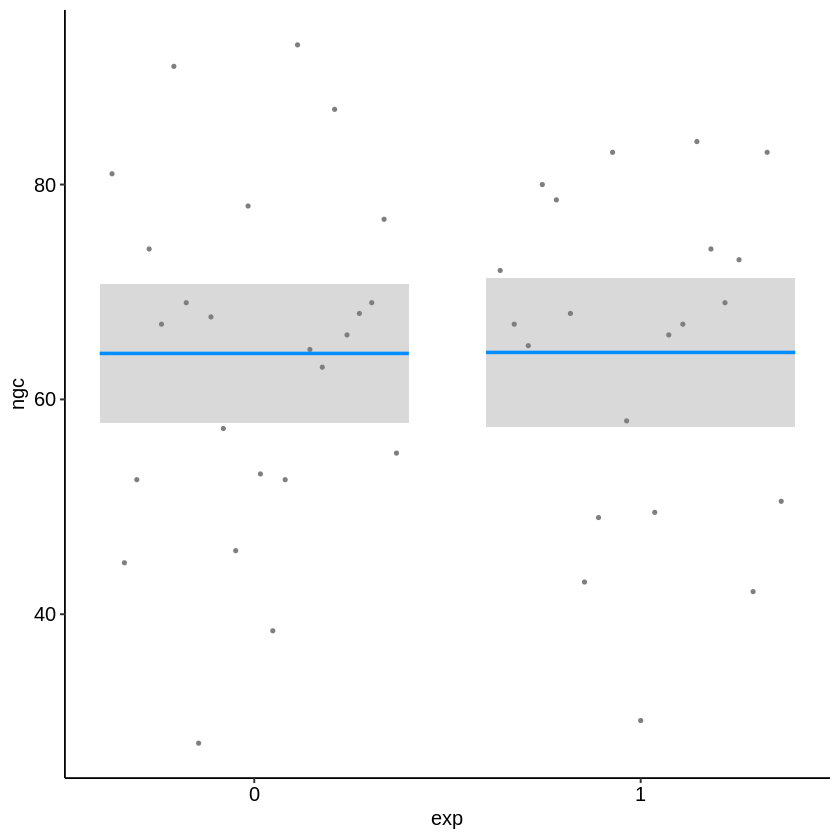

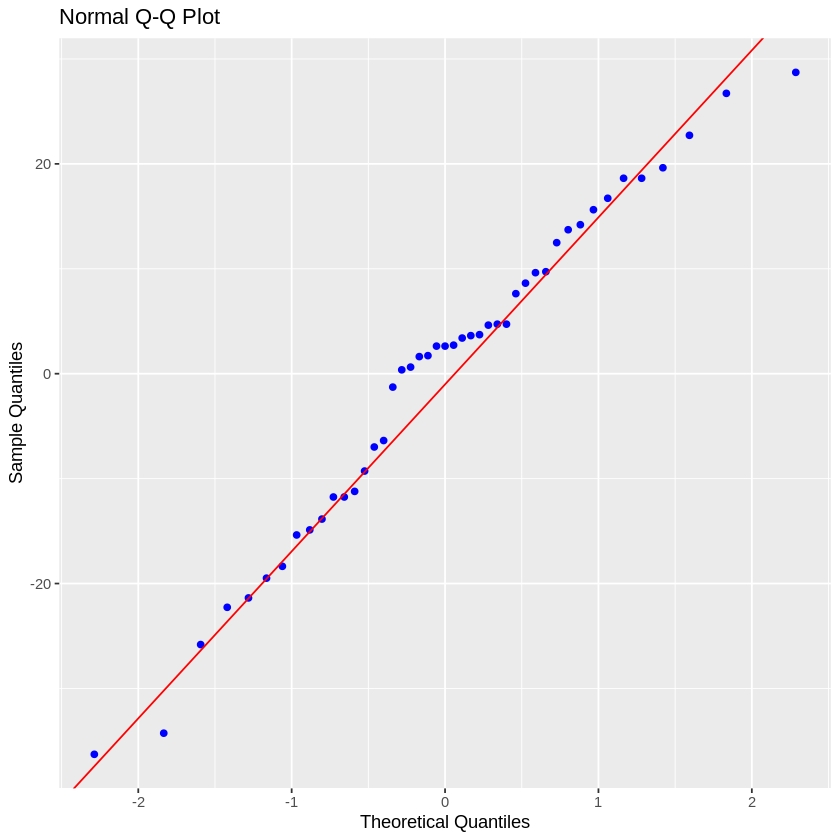


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : ngc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.1135     1    0.7362 
 ----------------------------------------
  simultaneous     0.1135     1    0.7362 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


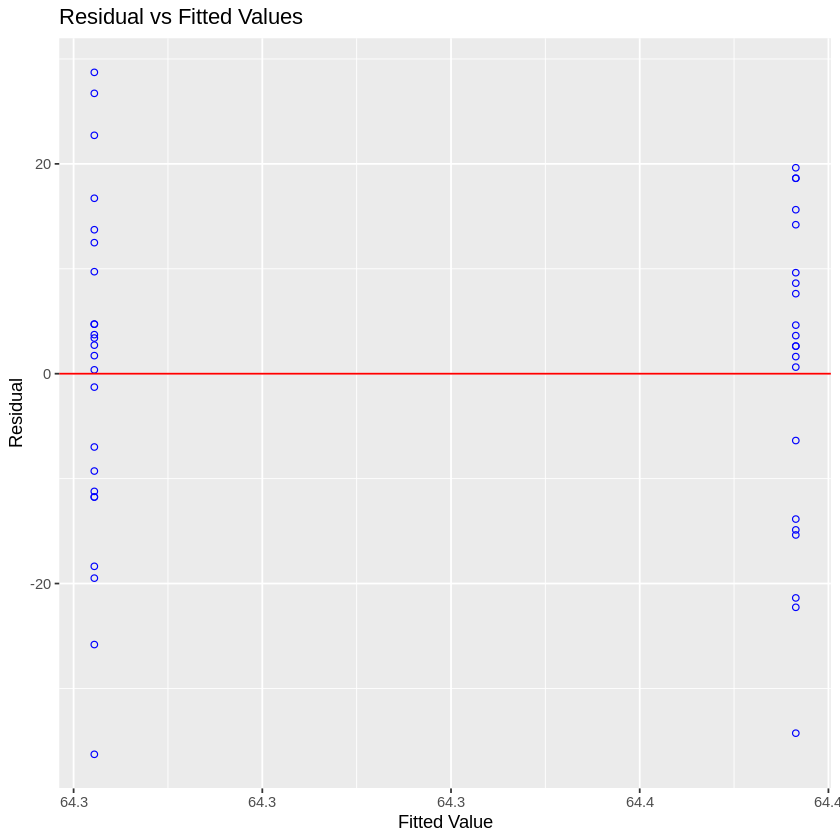

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 64.277”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.093397”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.218e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.008723”


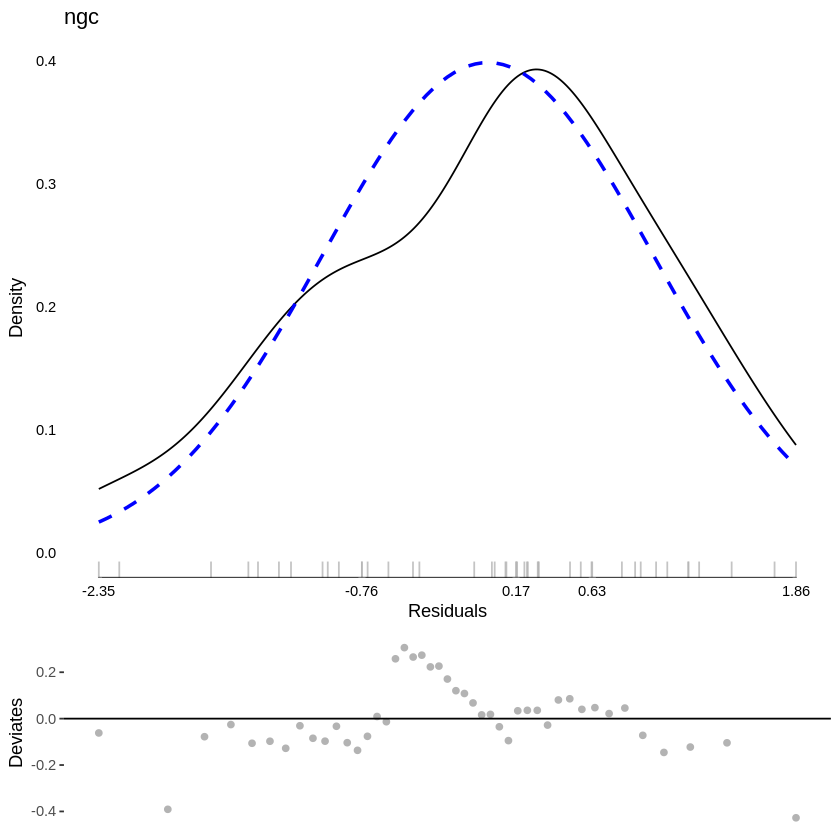

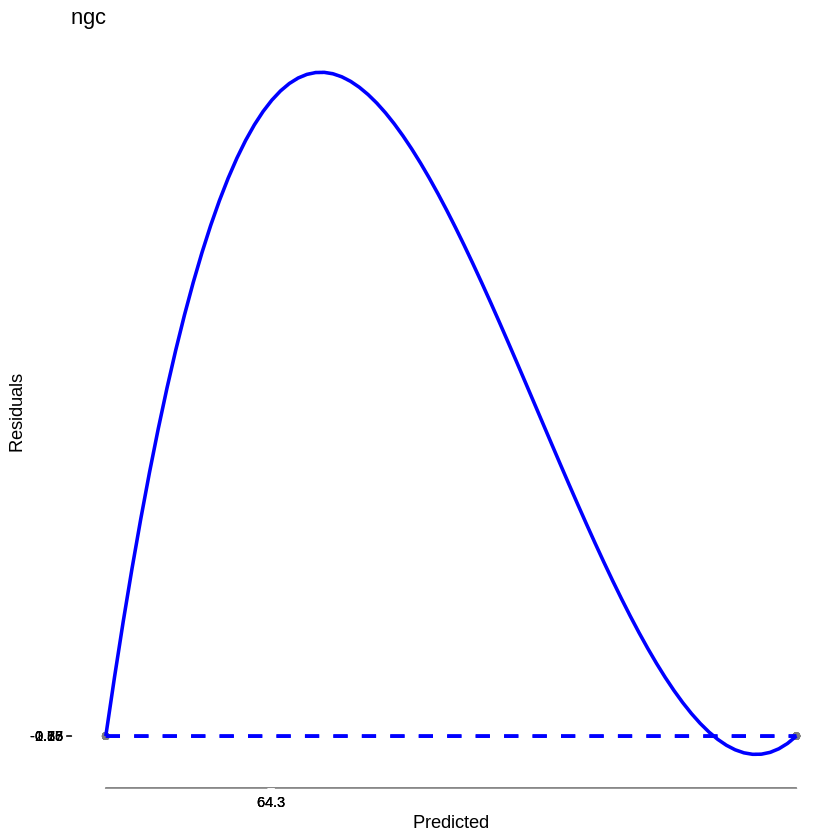

In [19]:
exp <- factor(exp)
expi <- lm(ngc ~ exp)

summary(expi)
visreg(expi, xvar = "exp", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(expi)
ols_plot_resid_qq(expi)
ols_plot_resid_fit(expi)
ols_test_breusch_pagan(expi, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(expi, ev.perc = .005)
plot(md)

### Mindfulness Experience and FFMQ


Call:
lm(formula = ffmqt ~ exp)

Residuals:
   Min     1Q Median     3Q    Max 
-46.67 -11.79   4.21   9.33  46.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  117.792      3.605   32.68   <2e-16 ***
exp1          -0.125      5.277   -0.02     0.98    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.7 on 43 degrees of freedom
Multiple R-squared:  1.3e-05,	Adjusted R-squared:  -0.0232 
F-statistic: 0.000561 on 1 and 43 DF,  p-value: 0.981


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9761         0.4708 
Kolmogorov-Smirnov        0.1064         0.6888 
Cramer-von Mises          3.5999         0.0000 
Anderson-Darling          0.4597         0.2500 
-----------------------------------------------

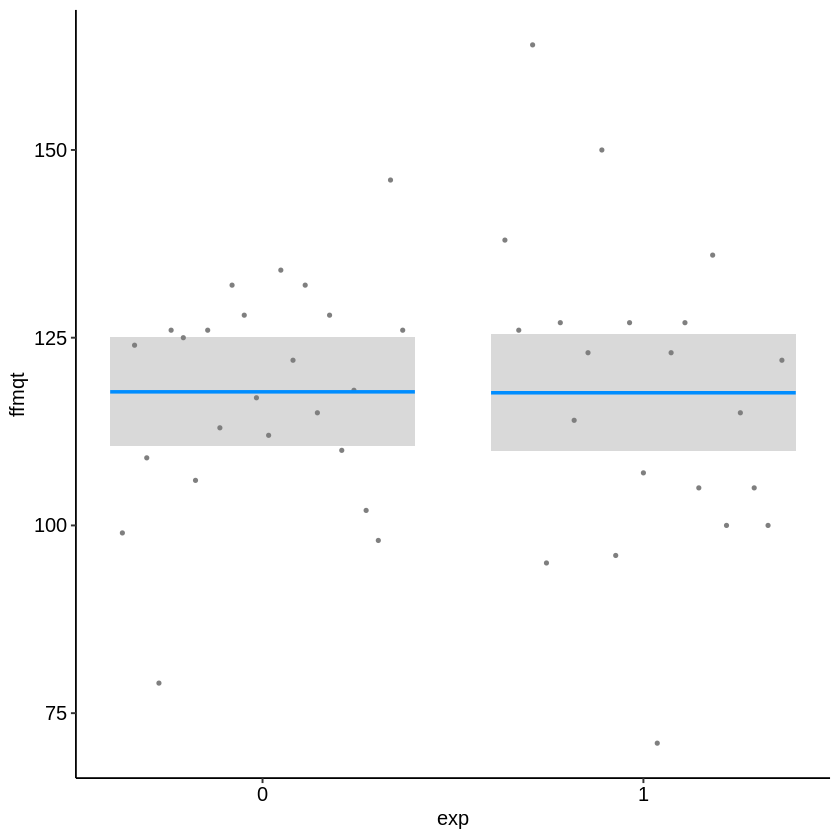

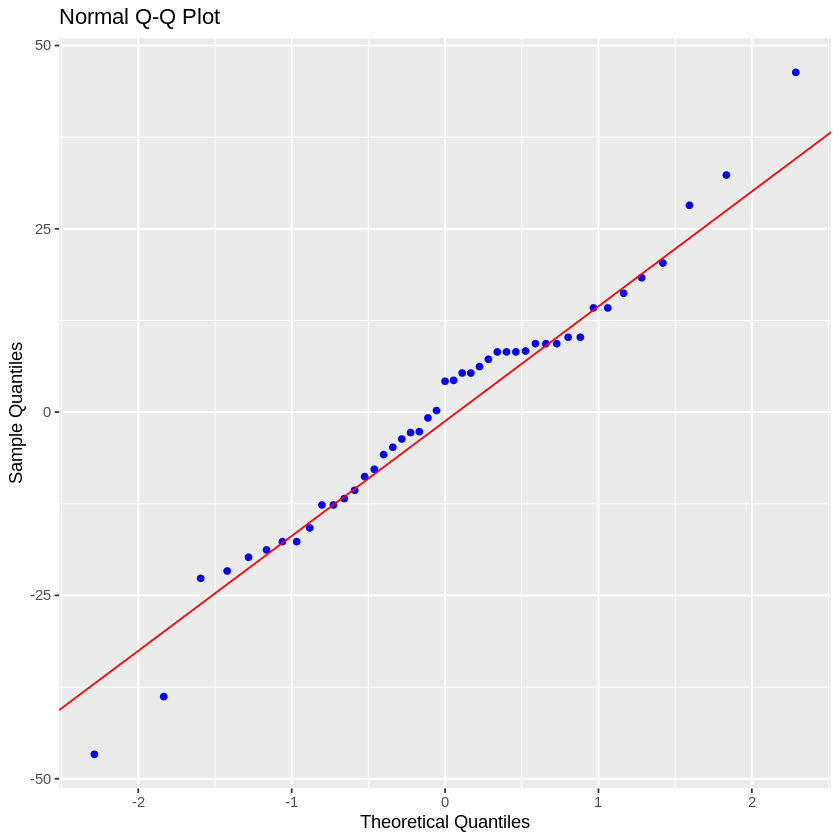


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : ffmqt 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               2.7298     1    0.0985 
 ----------------------------------------
  simultaneous     2.7298     1    0.0985 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


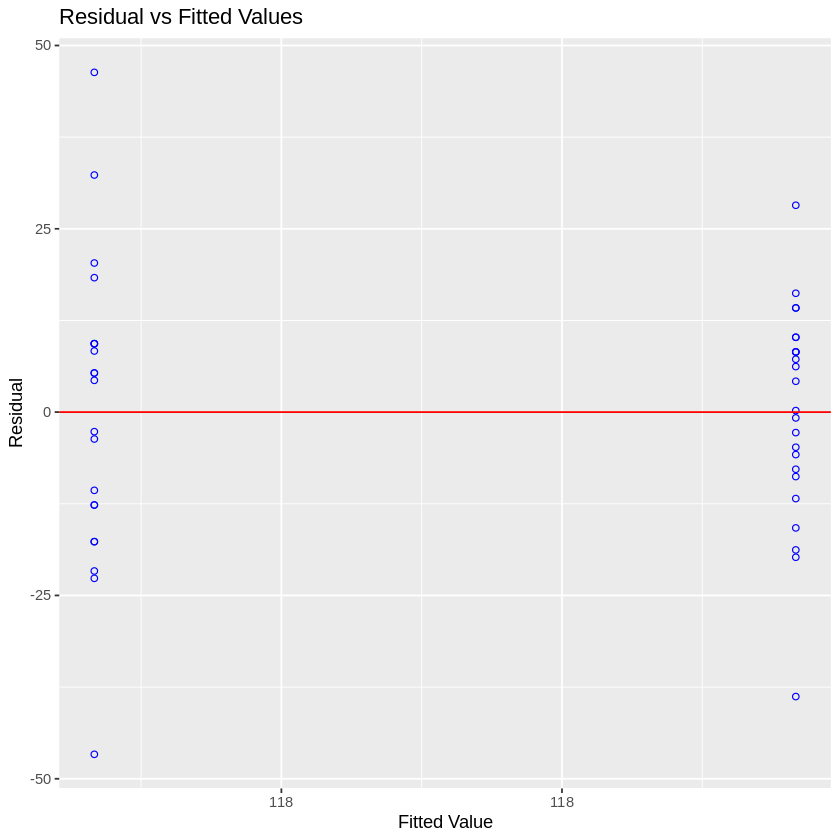

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 117.67”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12563”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.4839e-14”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.015782”


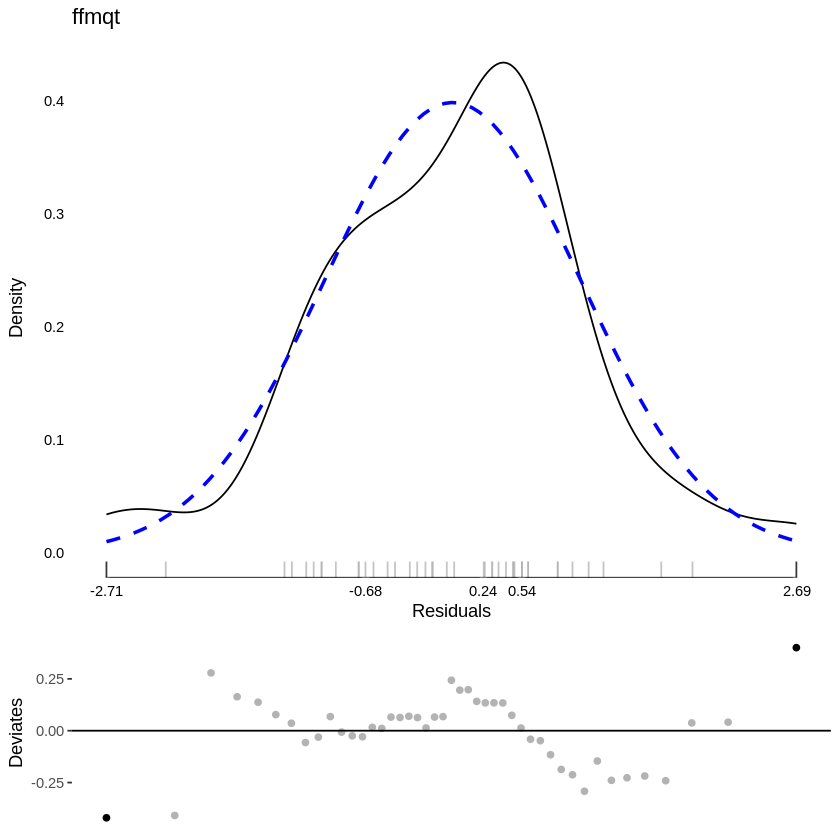

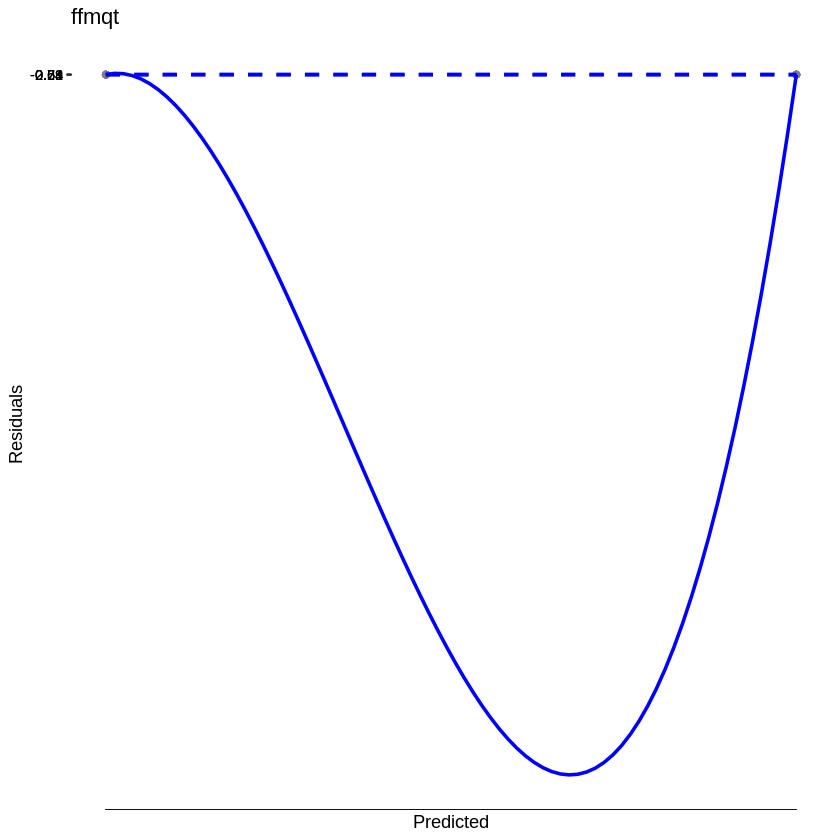

In [20]:
exp <- factor(exp)
expi <- lm(ffmqt ~ exp)

summary(expi)
visreg(expi, xvar = "exp", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(expi)
ols_plot_resid_qq(expi)
ols_plot_resid_fit(expi)
ols_test_breusch_pagan(expi, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(expi, ev.perc = .005)
plot(md)

### Mindfulness Experience and STAI


Call:
lm(formula = stai ~ exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.714  -7.714  -0.714   7.286  27.250 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    47.75       2.40   19.86   <2e-16 ***
exp1            4.96       3.52    1.41     0.17    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.8 on 43 degrees of freedom
Multiple R-squared:  0.0442,	Adjusted R-squared:  0.022 
F-statistic: 1.99 on 1 and 43 DF,  p-value: 0.166


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9906         0.9711 
Kolmogorov-Smirnov        0.0528         0.9996 
Cramer-von Mises          3.4806         0.0000 
Anderson-Darling          0.1312         0.9801 
-----------------------------------------------

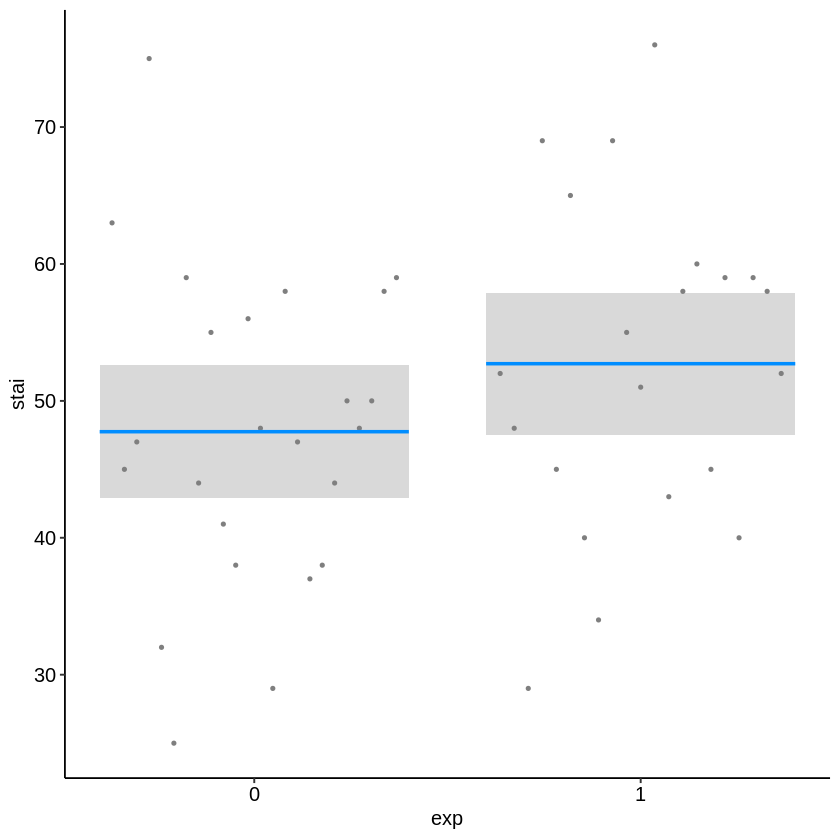

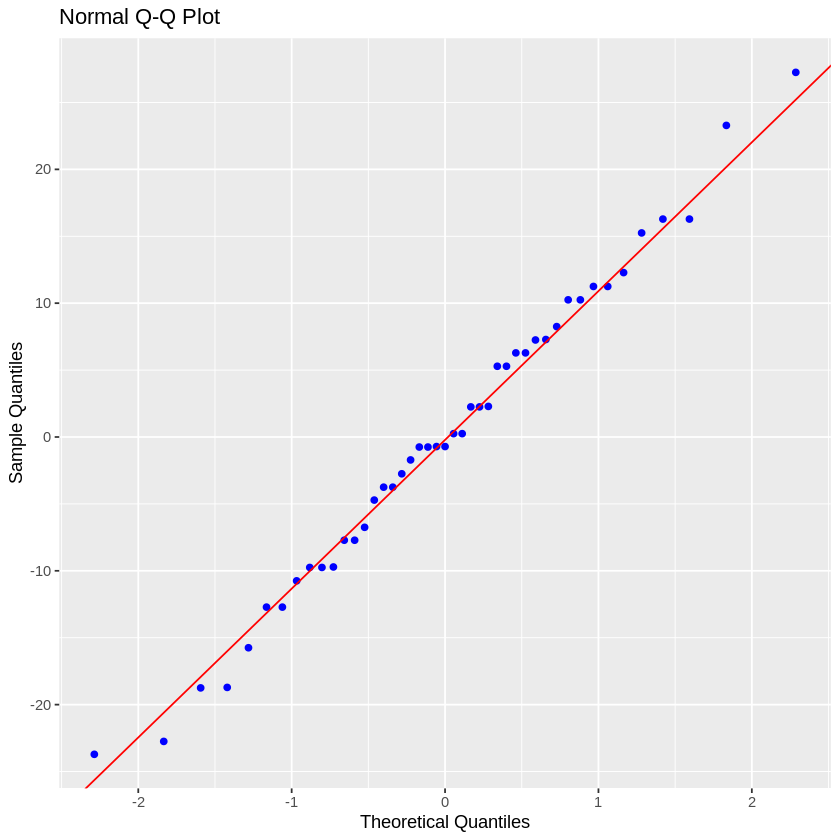


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.0295     1    0.8636 
 ----------------------------------------
  simultaneous     0.0295     1    0.8636 
 ----------------------------------------

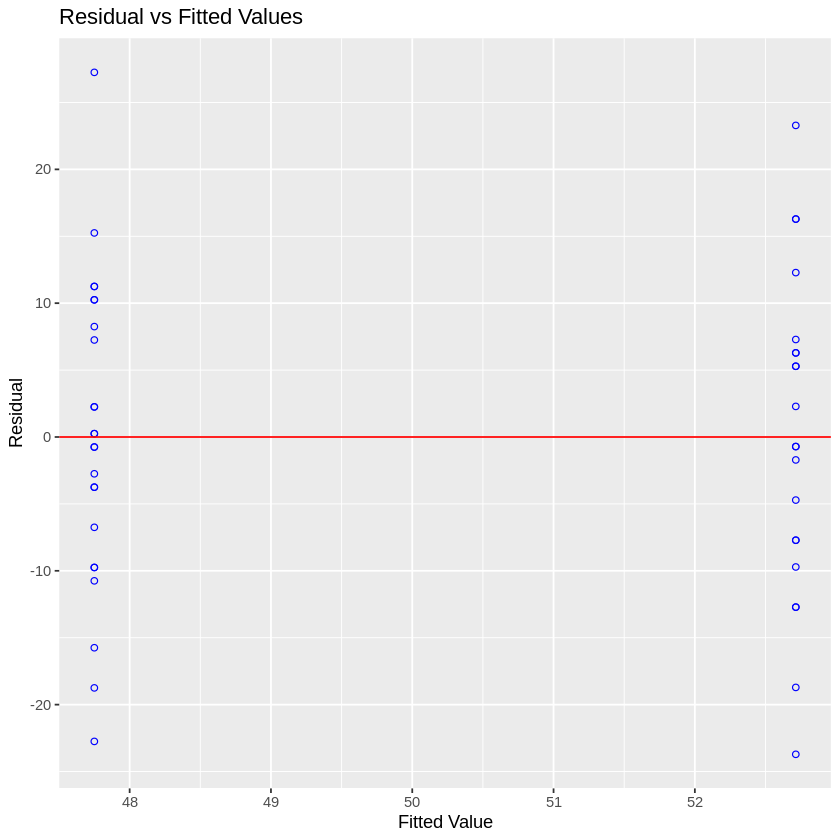

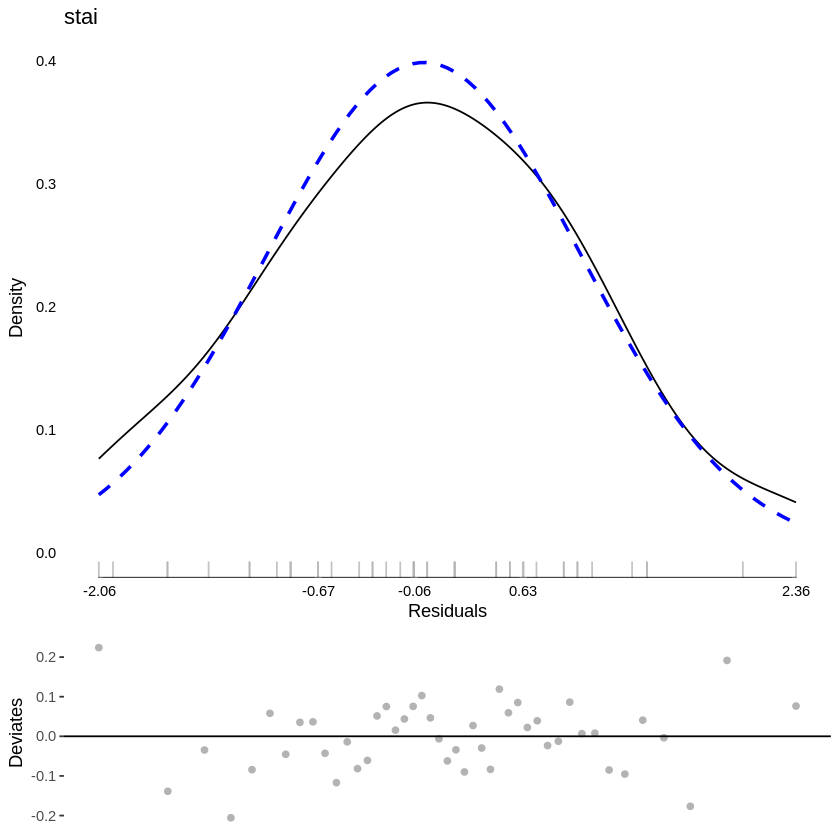

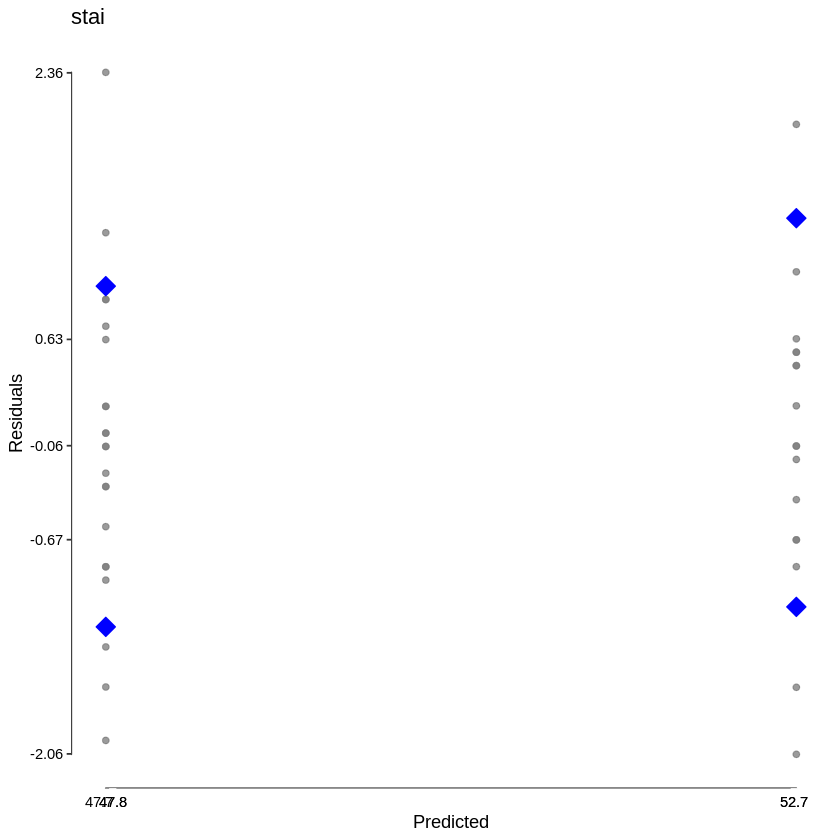

In [21]:
exp <- factor(exp)
expi <- lm(stai ~ exp)

summary(expi)
visreg(expi, xvar = "exp", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(expi)
ols_plot_resid_qq(expi)
ols_plot_resid_fit(expi)
ols_test_breusch_pagan(expi, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(expi, ev.perc = .005)
plot(md)

### Go 1 vs Go 2 

In [22]:
t.test(gc1, gc2, paired = TRUE)


	Paired t-test

data:  gc1 and gc2
t = -0.6, df = 44, p-value = 0.5
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -1.03  0.53
sample estimates:
mean difference 
         -0.249 


### nGo 1 vs nGo 2

In [23]:
t.test(ngc1, ngc2, paired = TRUE)


	Paired t-test

data:  ngc1 and ngc2
t = 4, df = 44, p-value = 8e-04
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
  2.99 10.56
sample estimates:
mean difference 
           6.78 


### STAI and FFMQ Total


Call:
lm(formula = stai ~ ffmqt)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.688  -7.127   0.444   4.223  21.076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 104.8055     9.0610   11.57  8.7e-15 ***
ffmqt        -0.4649     0.0761   -6.11  2.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.82 on 43 degrees of freedom
Multiple R-squared:  0.464,	Adjusted R-squared:  0.452 
F-statistic: 37.3 on 1 and 43 DF,  p-value: 2.57e-07


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.991          0.9773 
Kolmogorov-Smirnov        0.0696         0.9707 
Cramer-von Mises          3.2565         0.0000 
Anderson-Darling          0.1933         0.8889 
-----------------------------------------------

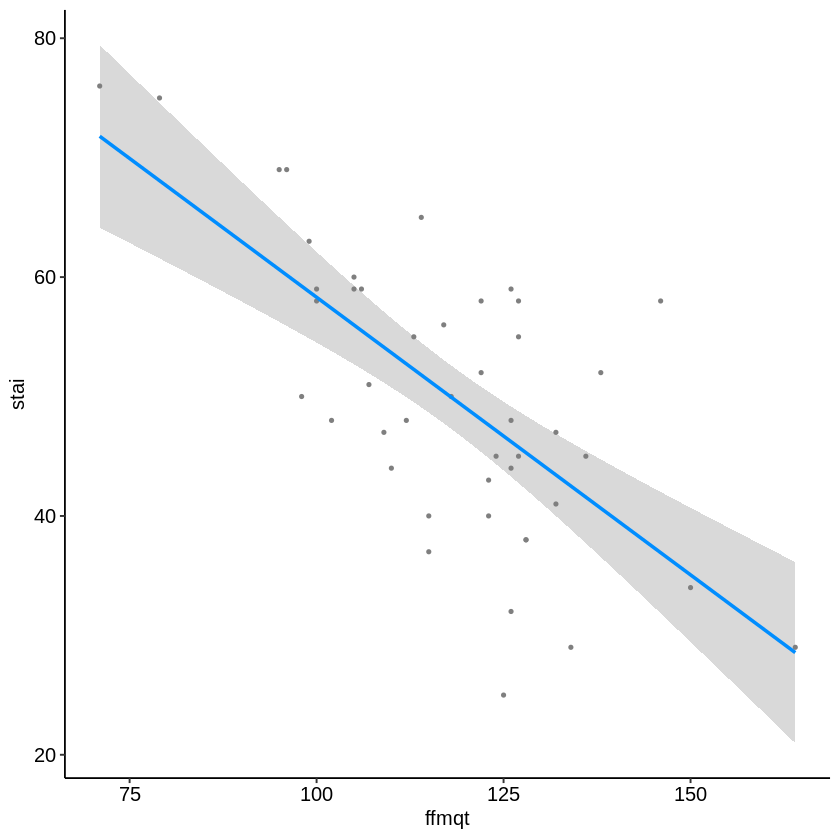

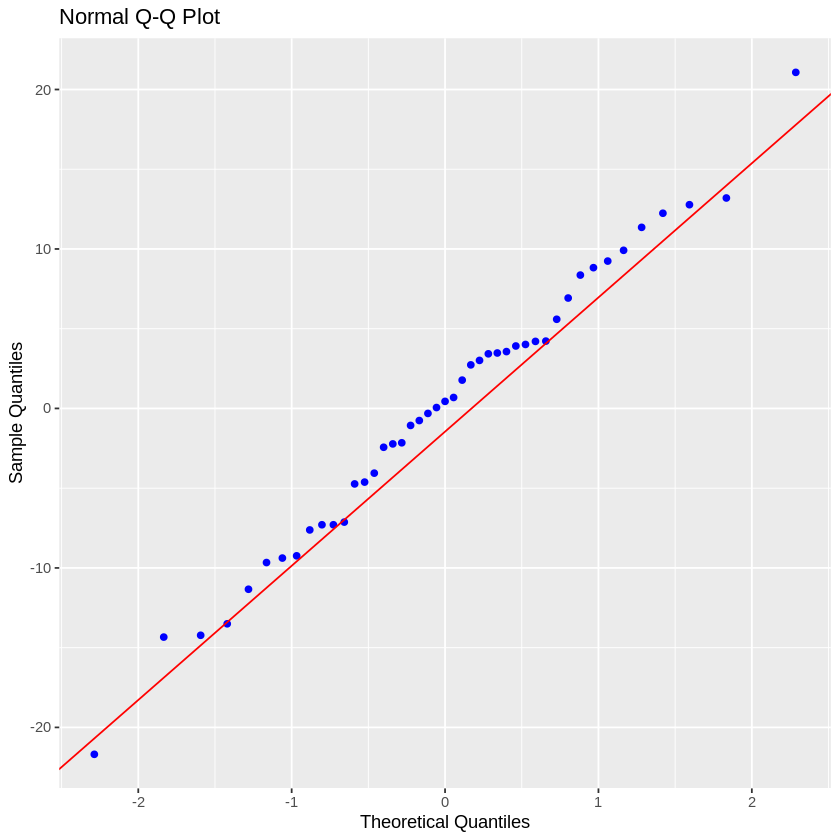


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               1.8251     1    0.1767 
 ----------------------------------------
  simultaneous     1.8251     1    0.1767 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


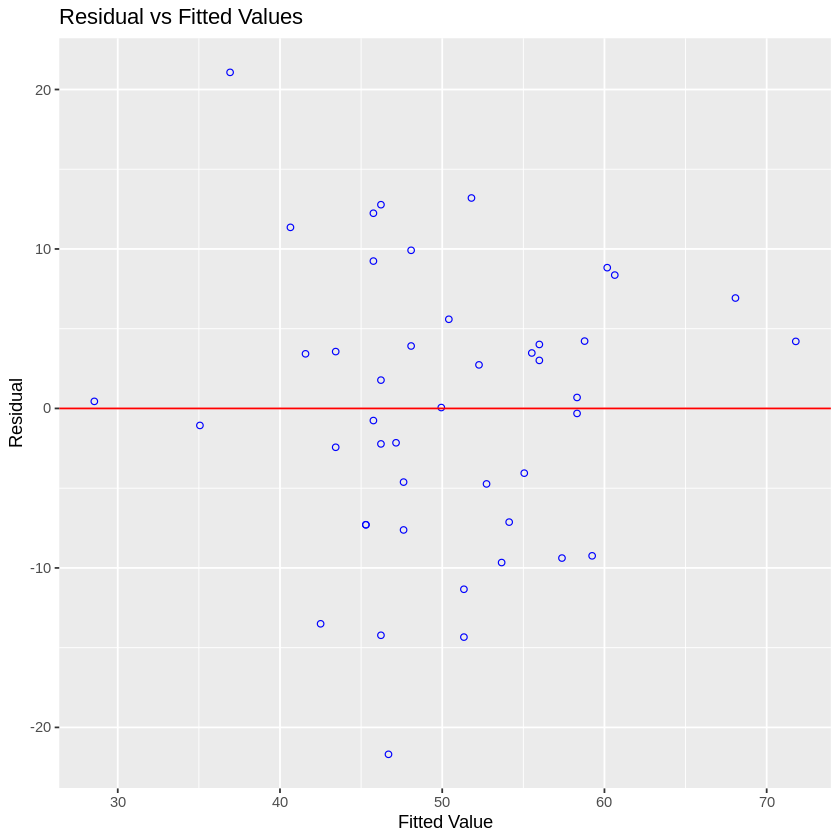

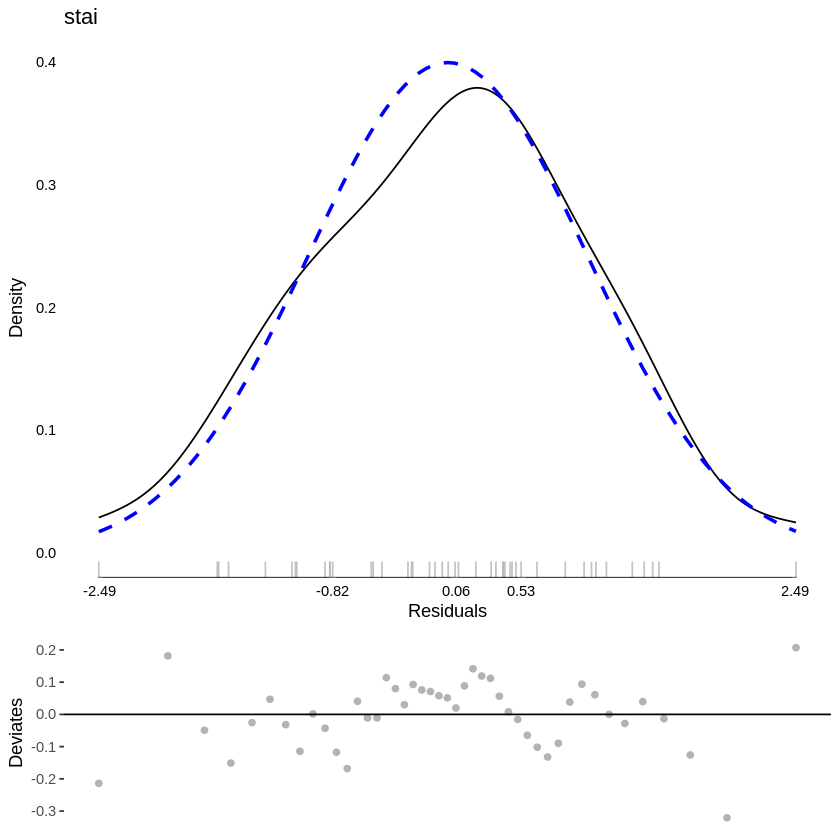

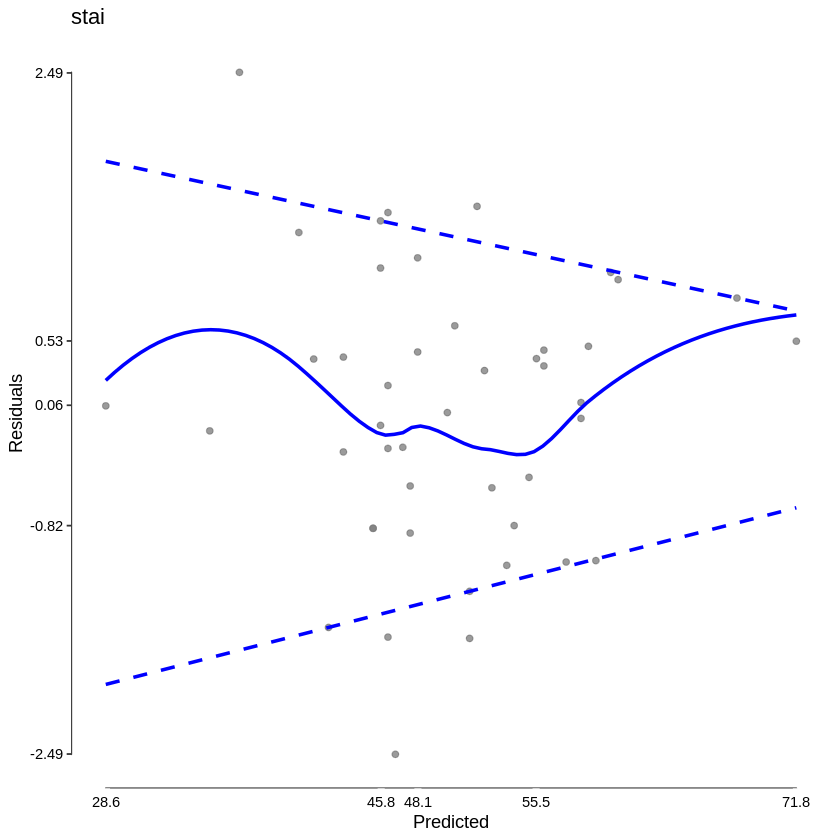

In [24]:
malt <- lm(stai ~ ffmqt)

summary(malt)
visreg(malt, xvar = "ffmqt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### STAI and Observation


Call:
lm(formula = stai ~ xvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.024  -7.357   0.088   8.495  25.124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.9886     8.7813    5.92  4.8e-07 ***
xvar         -0.0742     0.3317   -0.22     0.82    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12 on 43 degrees of freedom
Multiple R-squared:  0.00116,	Adjusted R-squared:  -0.0221 
F-statistic: 0.05 on 1 and 43 DF,  p-value: 0.824


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9876         0.9052 
Kolmogorov-Smirnov        0.0789         0.9418 
Cramer-von Mises          3.4508         0.0000 
Anderson-Darling          0.1888         0.8959 
-----------------------------------------------

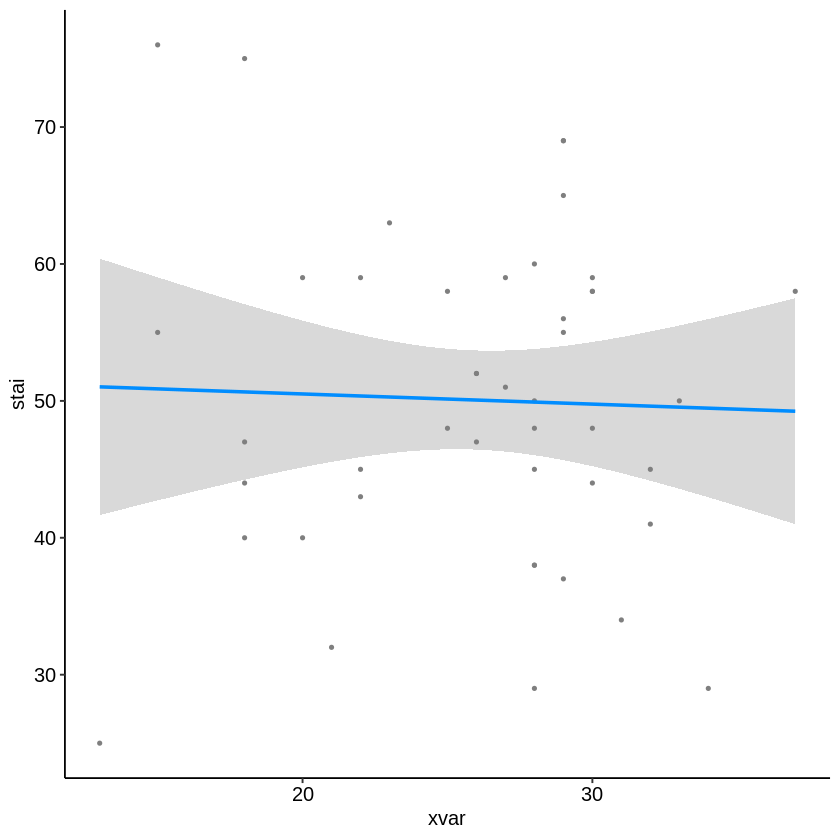

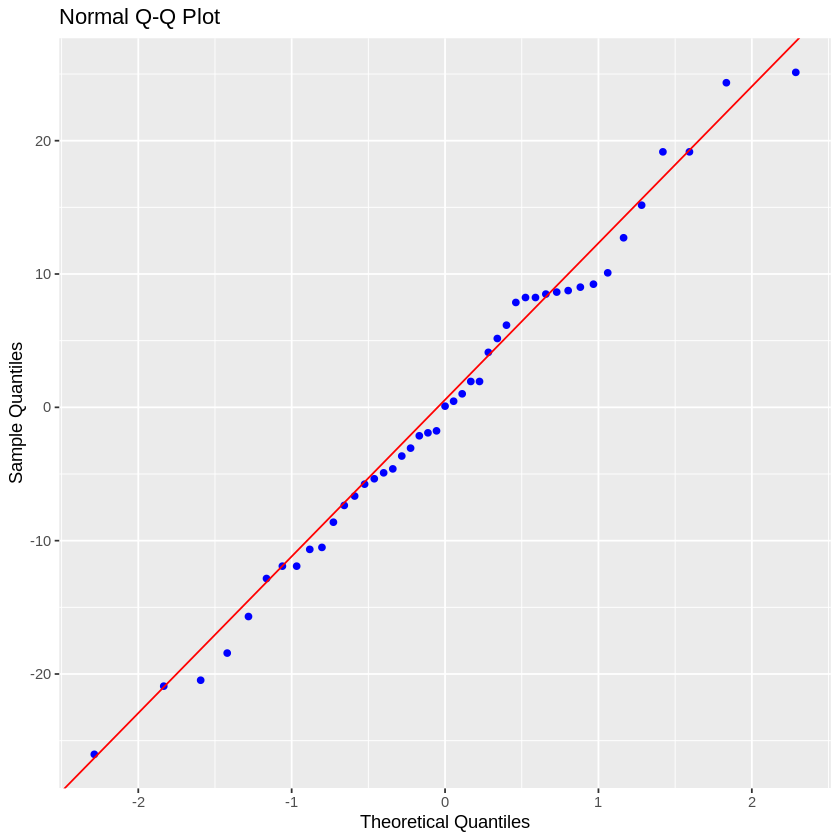


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               3.3776     1    0.0661 
 ----------------------------------------
  simultaneous     3.3776     1    0.0661 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


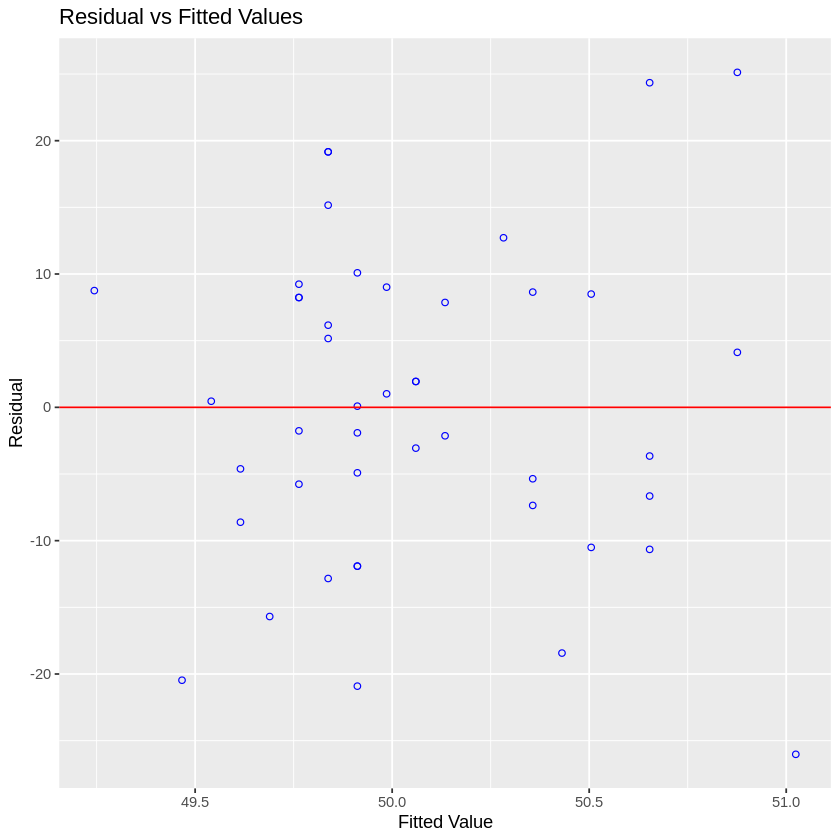

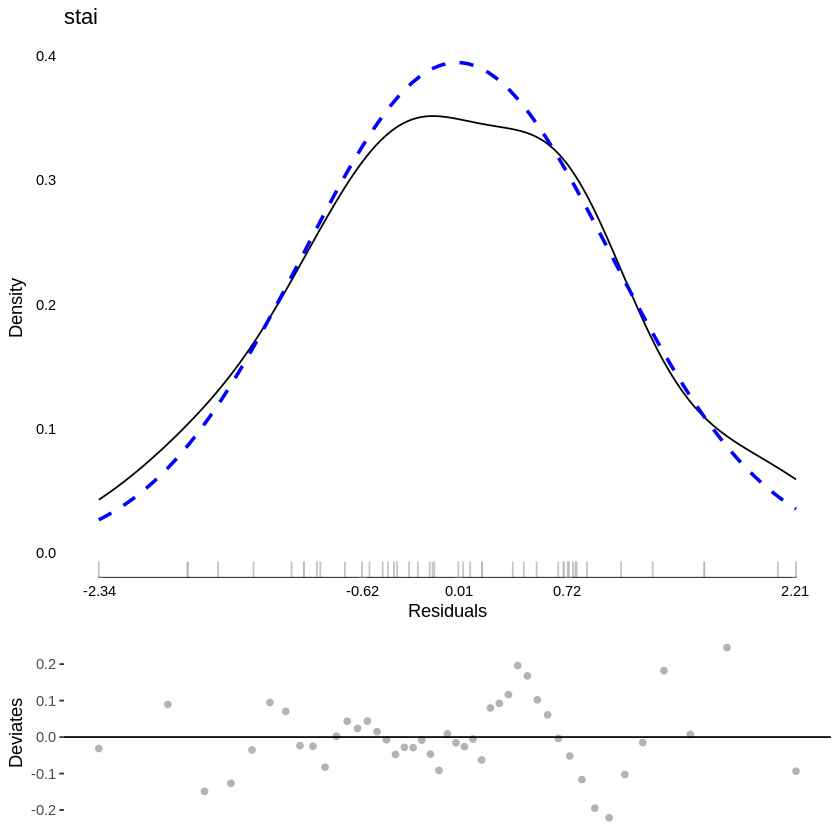

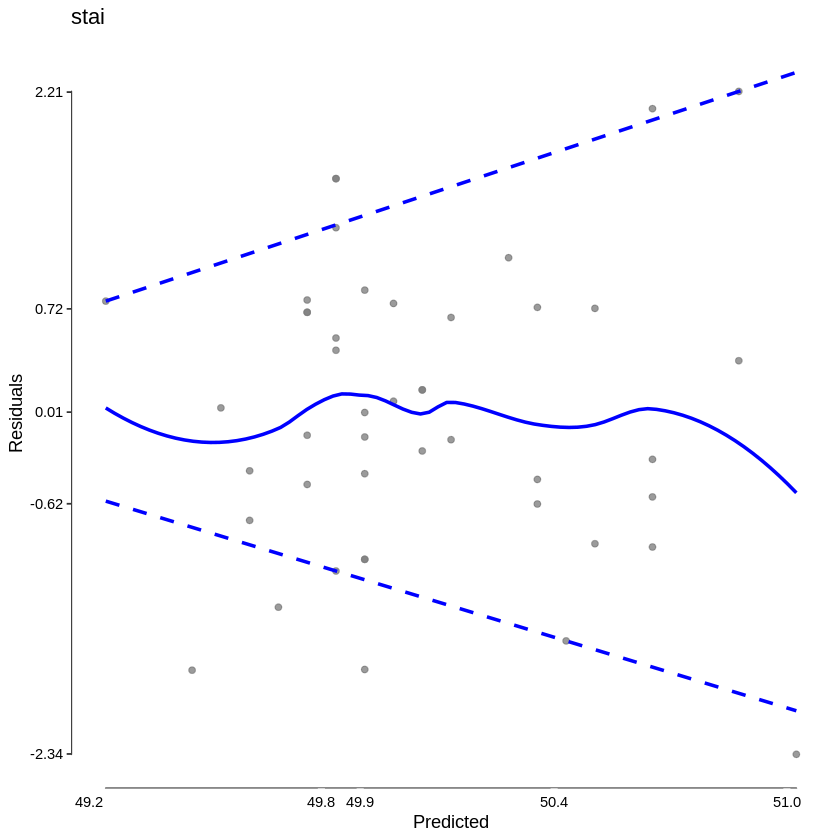

In [25]:
xvar = obt

malt <- lm(stai ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### STAI and Describing


Call:
lm(formula = stai ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-22.64  -8.08  -1.22   9.08  23.21 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   64.241      7.122    9.02  1.8e-11 ***
xvar          -0.573      0.279   -2.05    0.046 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.5 on 43 degrees of freedom
Multiple R-squared:  0.0891,	Adjusted R-squared:  0.0679 
F-statistic: 4.21 on 1 and 43 DF,  p-value: 0.0464


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.982          0.7017 
Kolmogorov-Smirnov        0.0936         0.7911 
Cramer-von Mises          3.7459         0.0000 
Anderson-Darling          0.2817         0.6228 
-----------------------------------------------

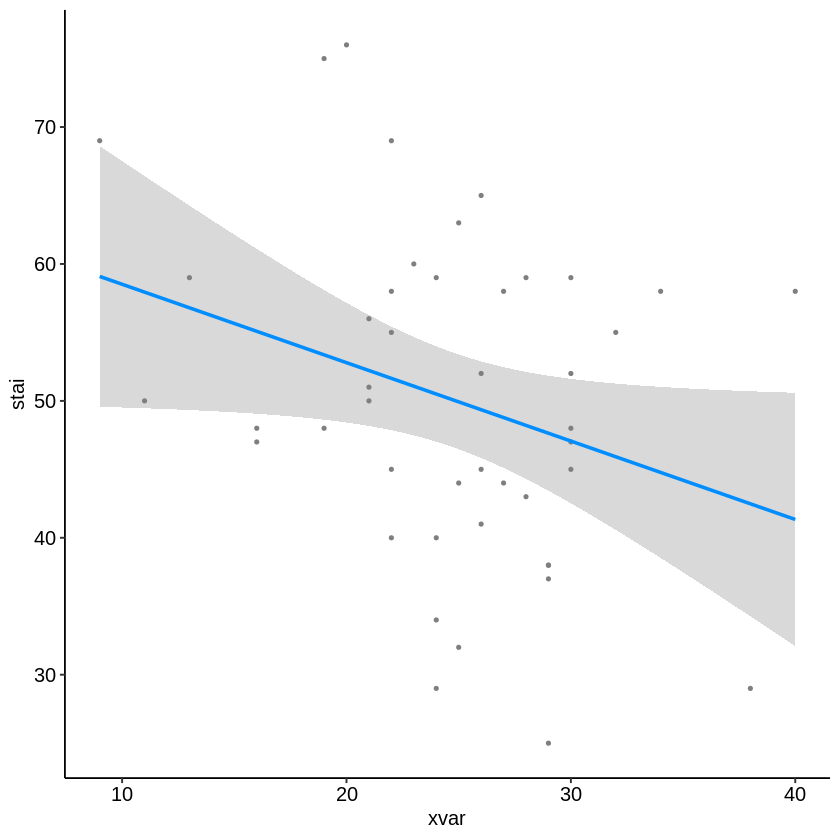

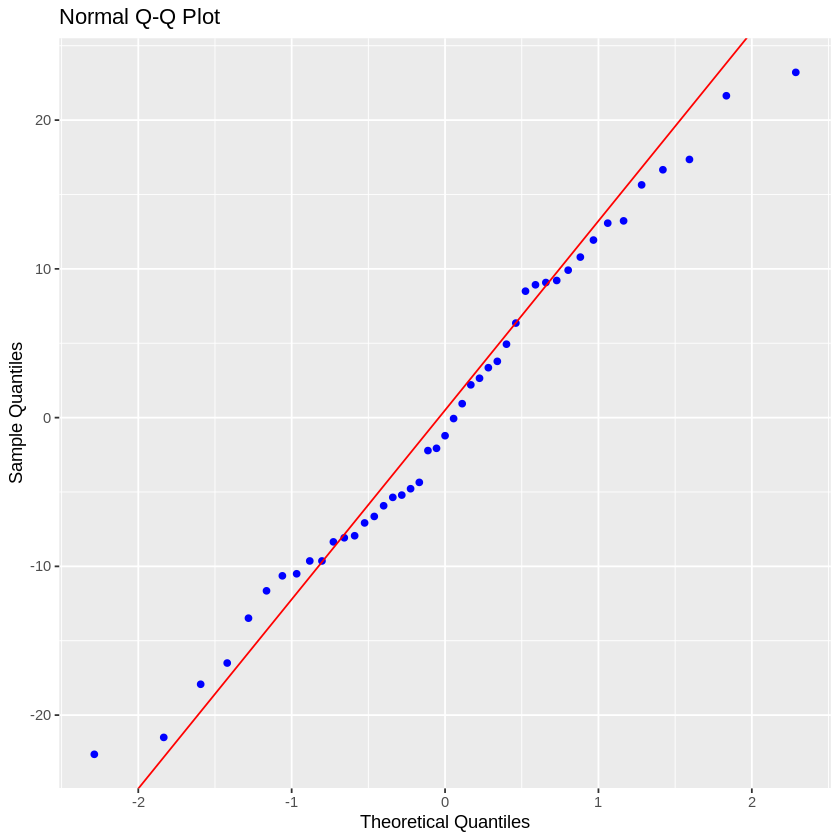


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.1863     1    0.6660 
 ----------------------------------------
  simultaneous     0.1863     1    0.6660 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


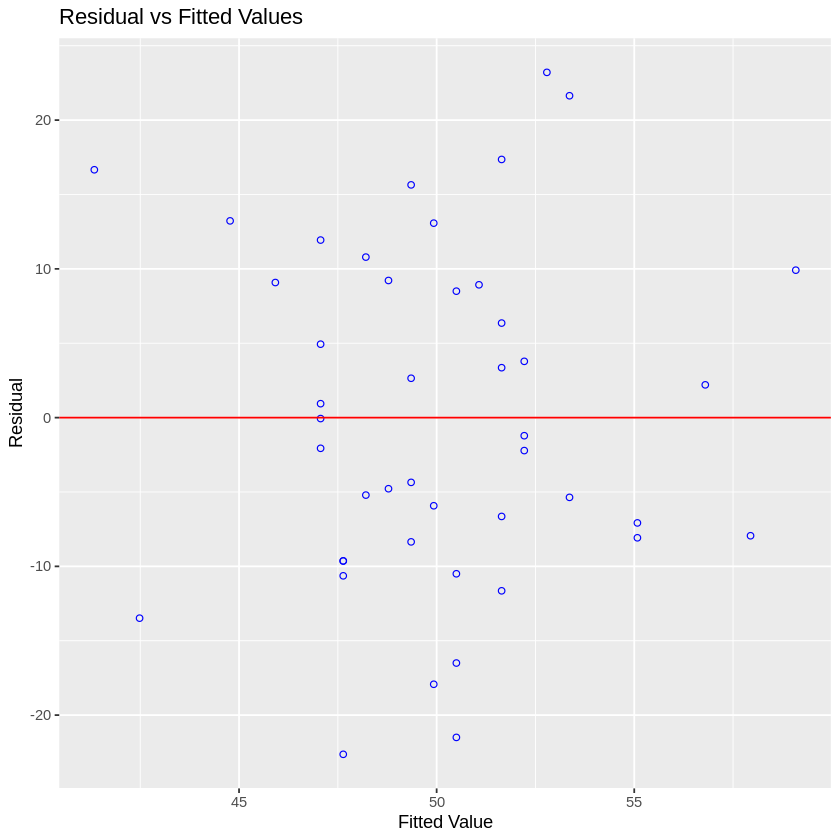

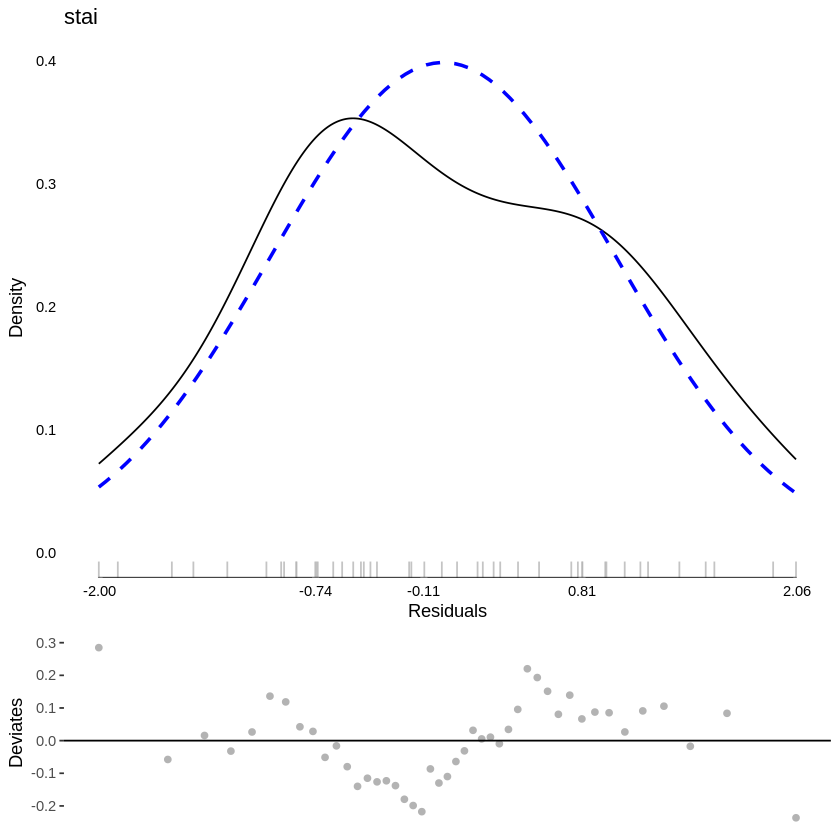

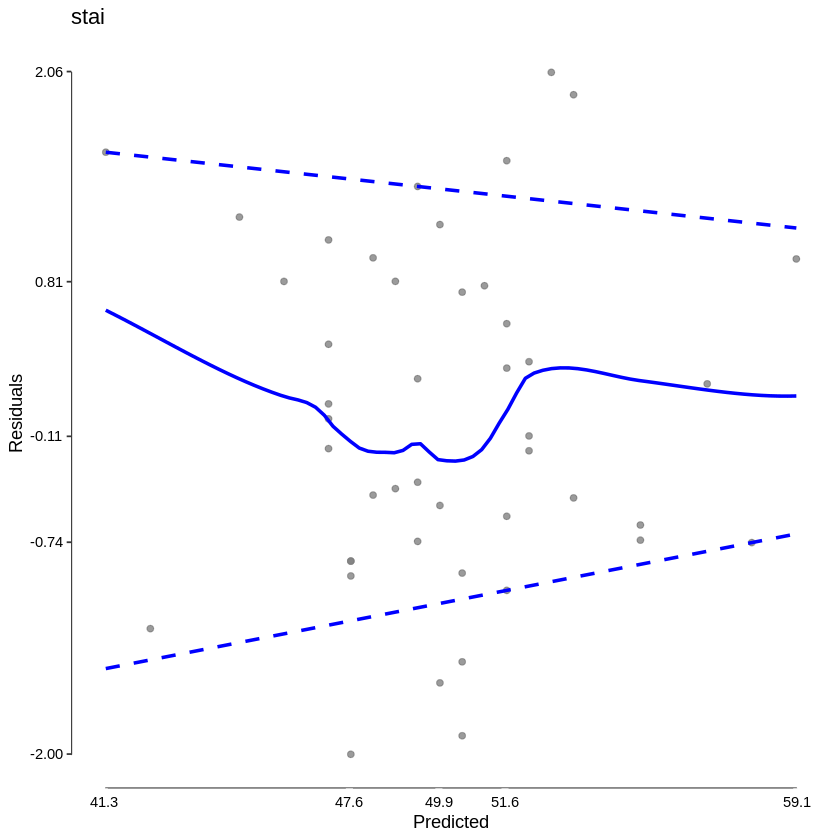

In [26]:
xvar = dbt

malt <- lm(stai ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### STAI and Acting With Awareness


Call:
lm(formula = stai ~ xvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.258  -5.762   0.809   7.024  18.246 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   79.842      5.585    14.3  < 2e-16 ***
xvar          -1.215      0.221    -5.5  1.9e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.23 on 43 degrees of freedom
Multiple R-squared:  0.413,	Adjusted R-squared:  0.399 
F-statistic: 30.3 on 1 and 43 DF,  p-value: 1.94e-06


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9858         0.8475 
Kolmogorov-Smirnov        0.0764         0.9555 
Cramer-von Mises          3.502          0.0000 
Anderson-Darling          0.1923         0.8905 
-----------------------------------------------

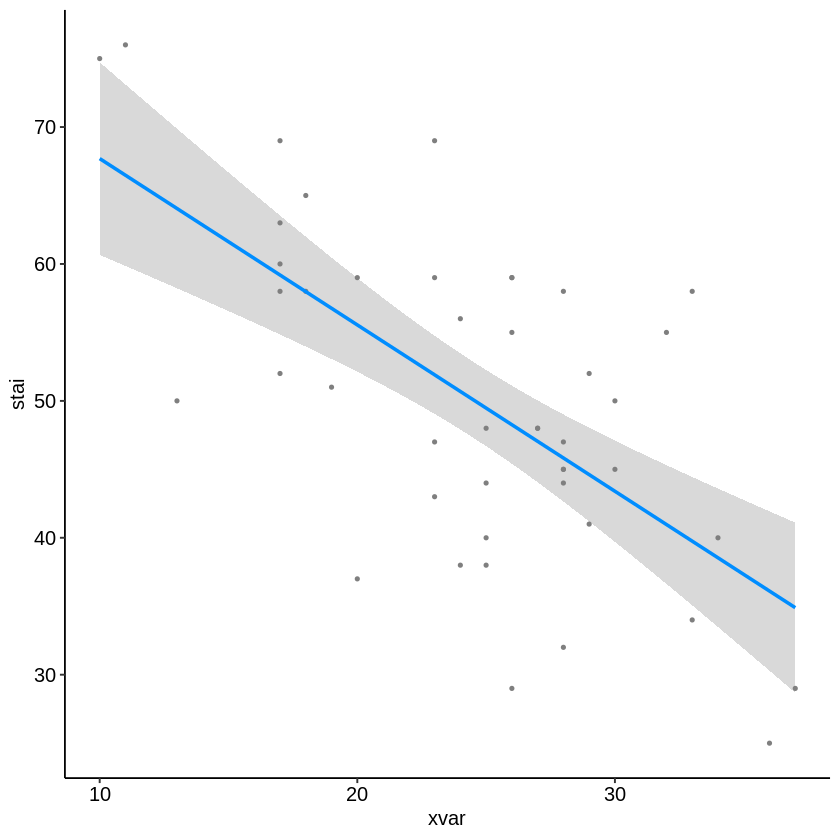

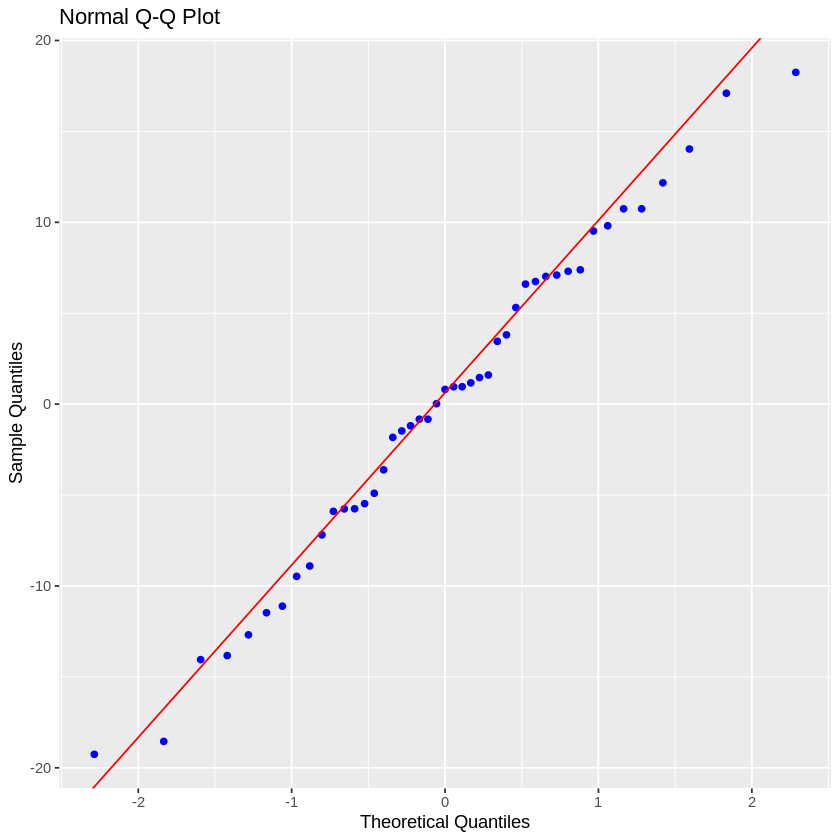


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.0366     1    0.8484 
 ----------------------------------------
  simultaneous     0.0366     1    0.8484 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


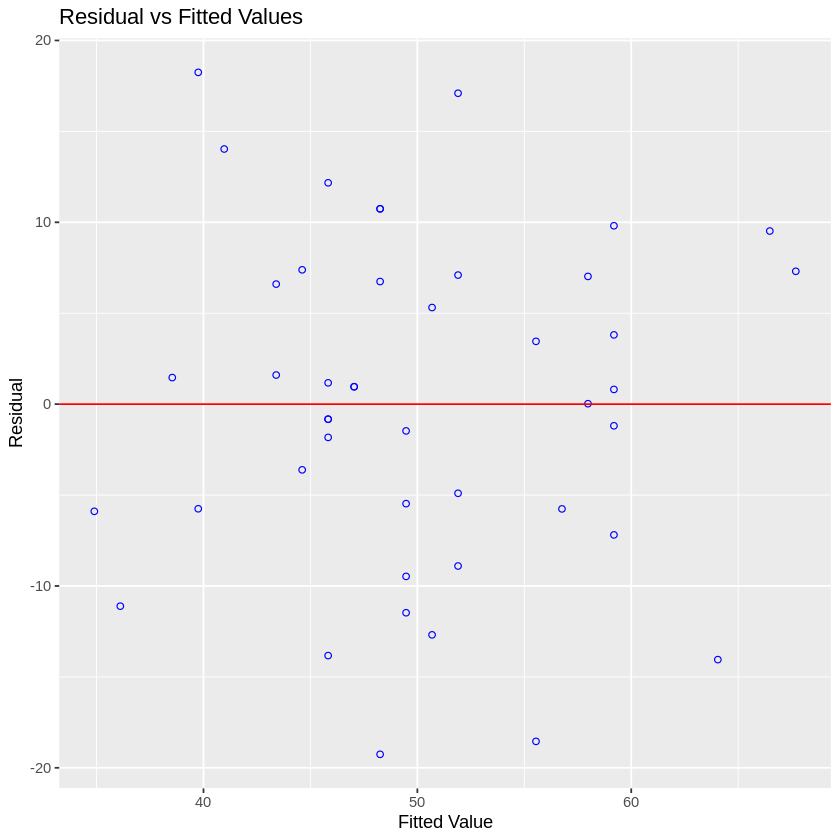

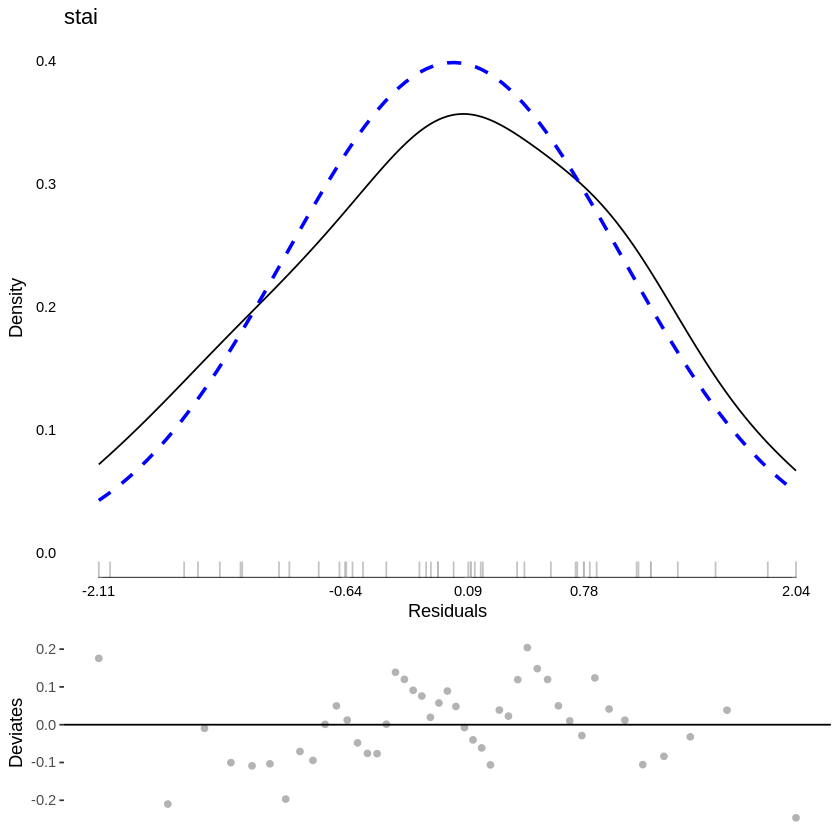

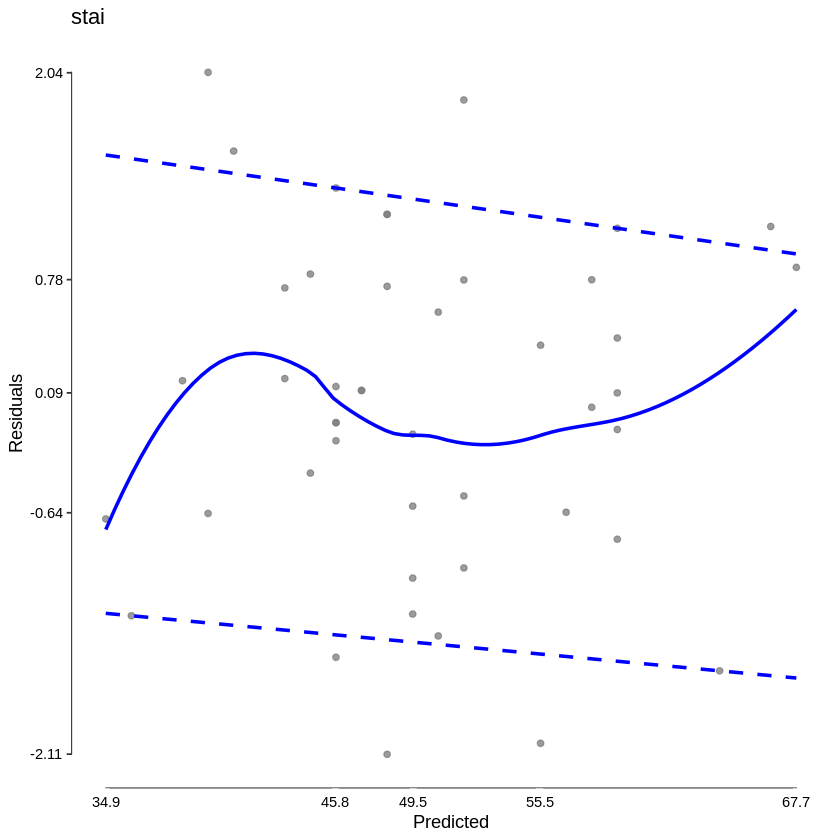

In [27]:
xvar = aat

malt <- lm(stai ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### STAI and Non-judging


Call:
lm(formula = stai ~ xvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.986  -6.482   0.022   6.199  18.678 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   75.012      4.726   15.87  < 2e-16 ***
xvar          -1.168      0.212   -5.52  1.8e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.22 on 43 degrees of freedom
Multiple R-squared:  0.414,	Adjusted R-squared:  0.401 
F-statistic: 30.4 on 1 and 43 DF,  p-value: 1.83e-06


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9818         0.6941 
Kolmogorov-Smirnov         0.06          0.9970 
Cramer-von Mises          3.3962         0.0000 
Anderson-Darling          0.1826         0.9062 
-----------------------------------------------

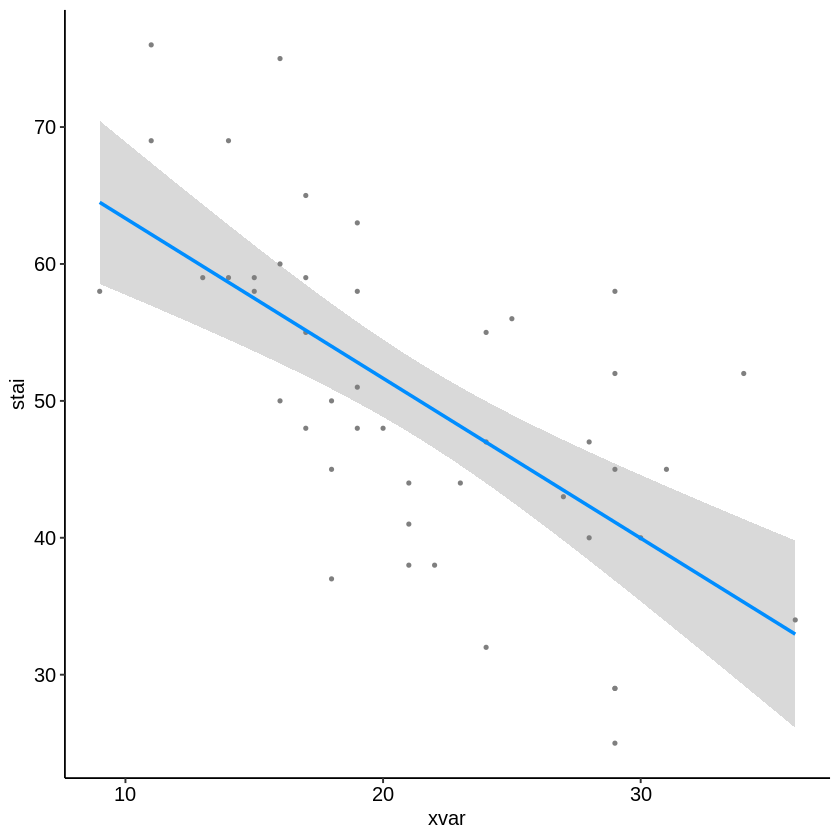

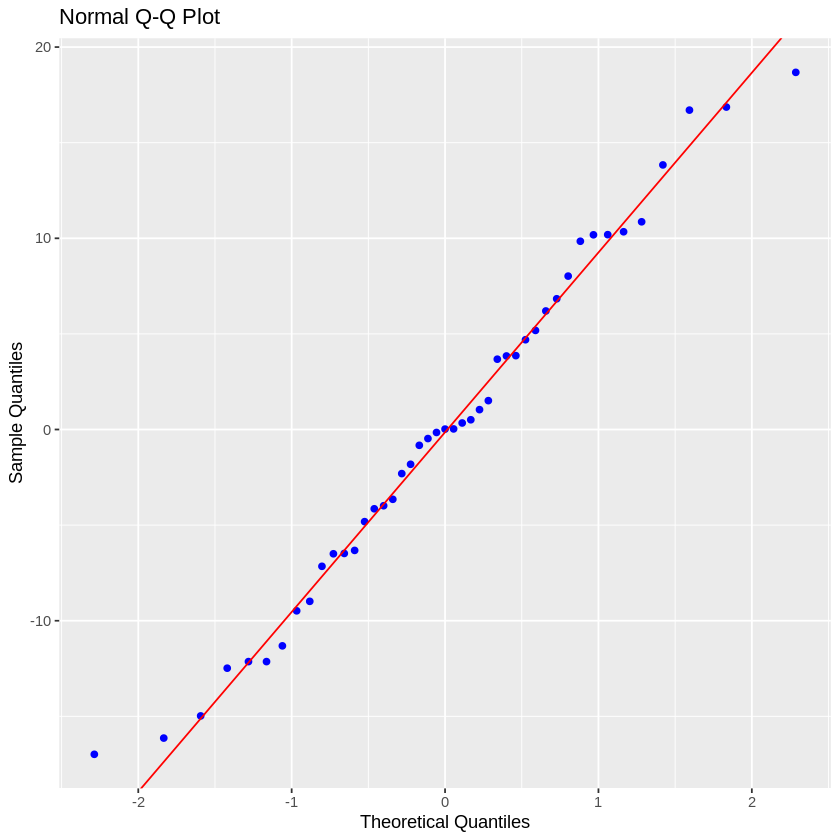


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.7517     1    0.3859 
 ----------------------------------------
  simultaneous     0.7517     1    0.3859 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


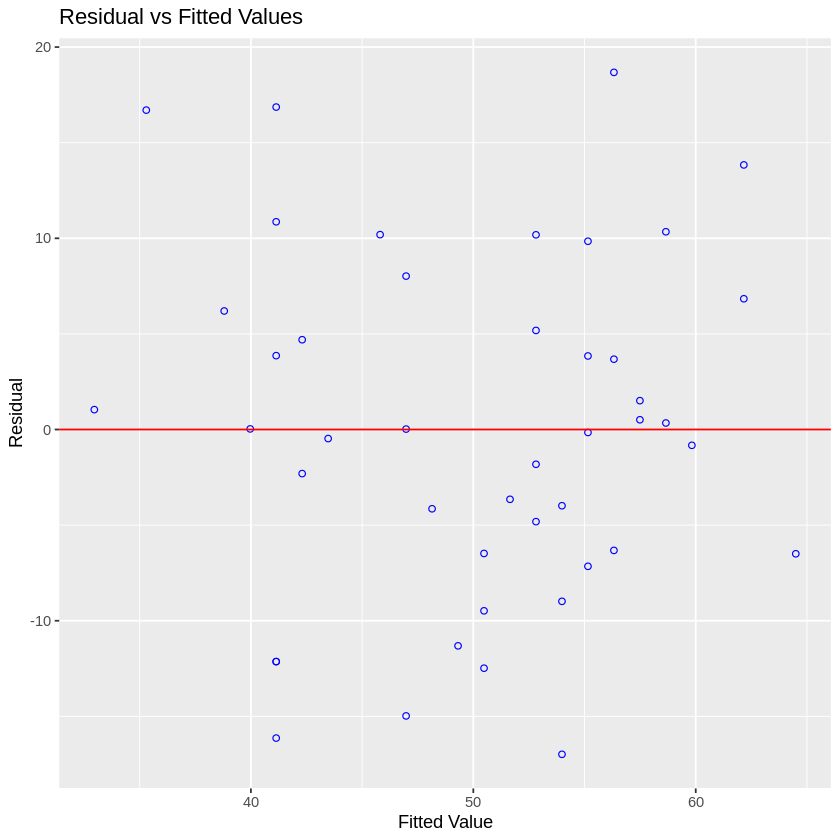

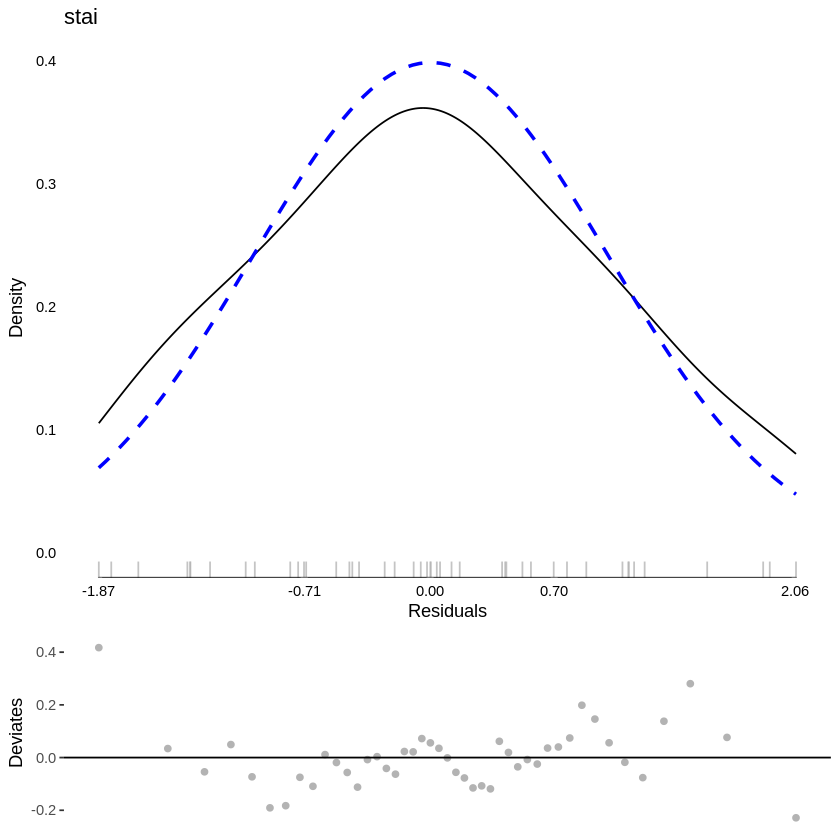

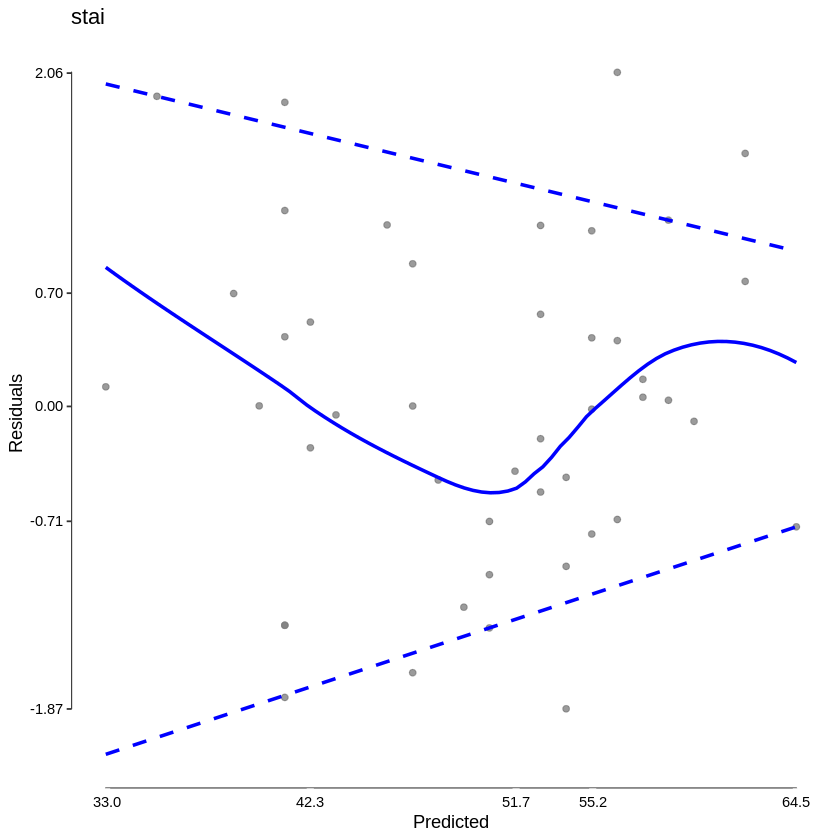

In [28]:
xvar = njt

malt <- lm(stai ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### STAI and Non-reactivity


Call:
lm(formula = stai ~ xvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.837  -7.016   0.233   7.054  20.481 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   75.047      9.000    8.34  1.6e-10 ***
xvar          -1.178      0.417   -2.82   0.0072 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.1 on 43 degrees of freedom
Multiple R-squared:  0.156,	Adjusted R-squared:  0.137 
F-statistic: 7.97 on 1 and 43 DF,  p-value: 0.00717


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9779         0.5361 
Kolmogorov-Smirnov        0.0649         0.9914 
Cramer-von Mises          2.8097         0.0000 
Anderson-Darling          0.2765         0.6399 
-----------------------------------------------

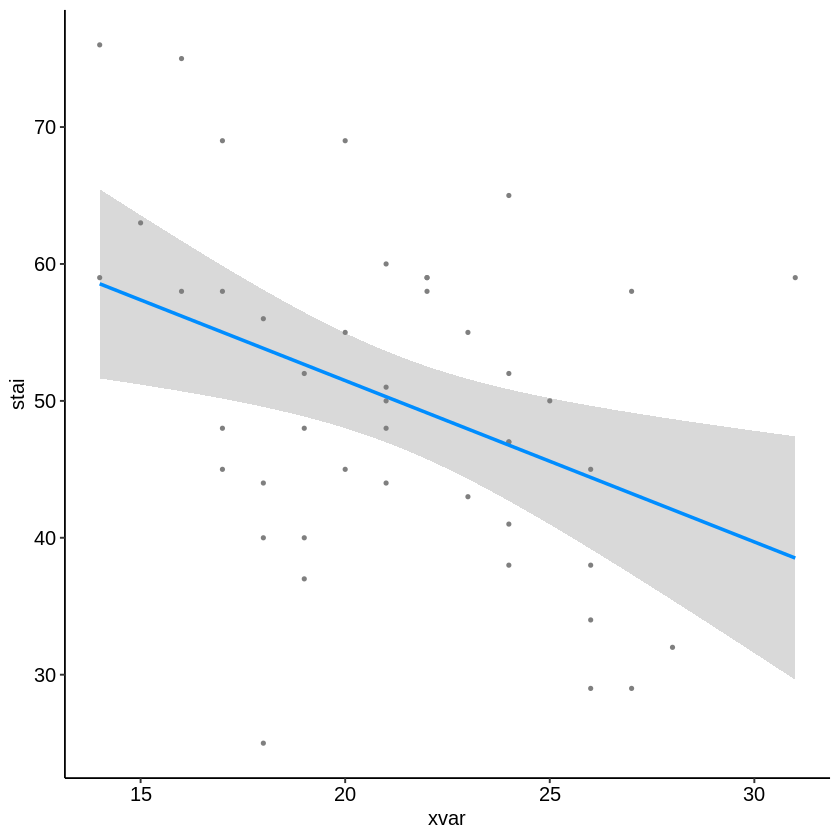

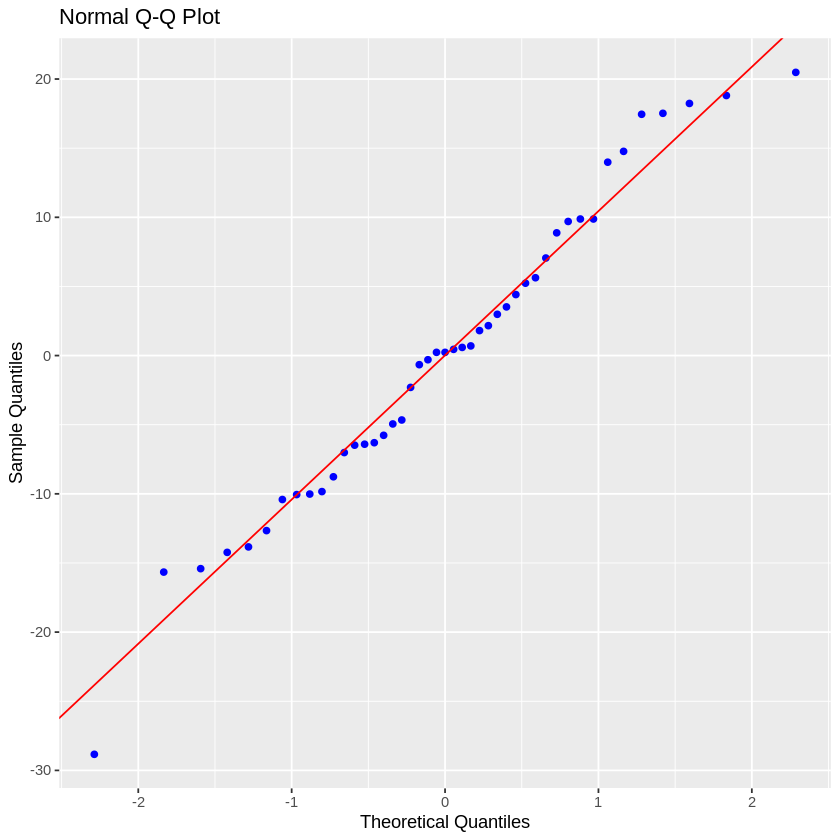


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

      Test Summary (Bonferroni p values)     
 ------------------------------------------
  Variable           chi2      df      p    
 ------------------------------------------
  m2               0.000586     1    0.9807 
 ------------------------------------------
  simultaneous     0.000586     1    0.9807 
 ------------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


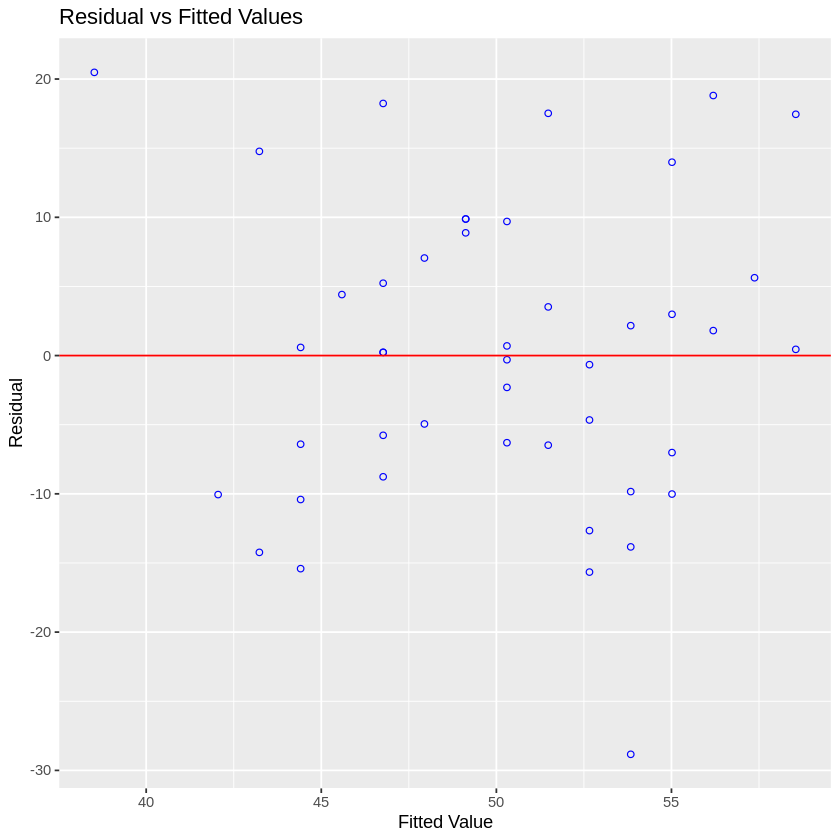

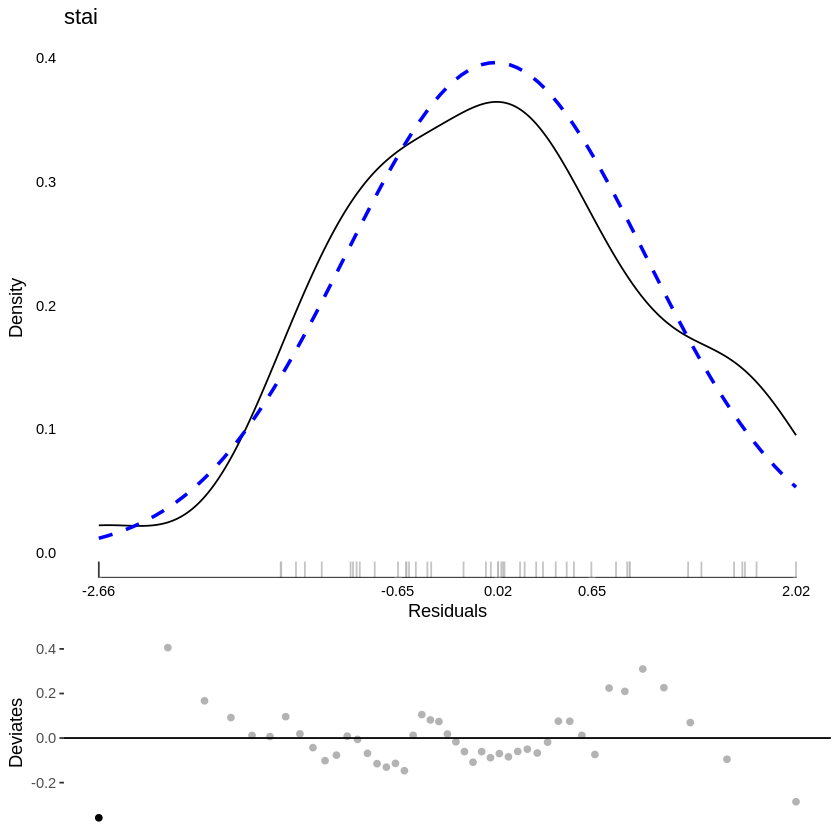

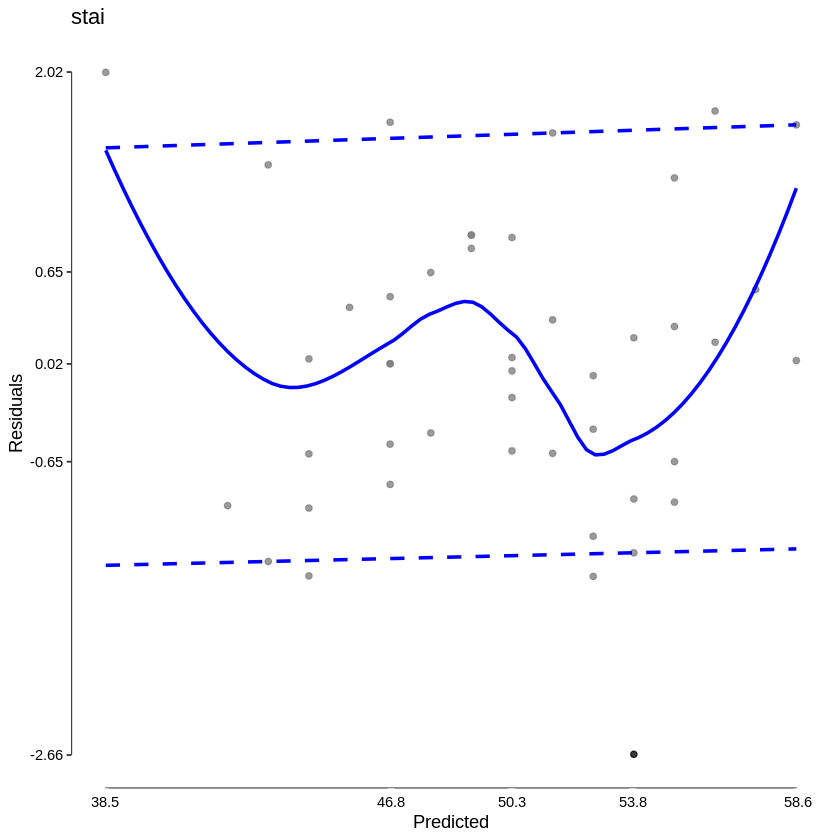

In [29]:
xvar = nrt

malt <- lm(stai ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### Exploratory - Describing lm


Call:
lm(formula = gc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-9.962 -0.843  0.629  2.192  3.827 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  93.8145     1.9411   48.33   <2e-16 ***
xvar          0.0676     0.0761    0.89     0.38    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.13 on 43 degrees of freedom
Multiple R-squared:  0.018,	Adjusted R-squared:  -0.00481 
F-statistic: 0.79 on 1 and 43 DF,  p-value: 0.379


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.8801          2e-04 
Kolmogorov-Smirnov        0.1483         0.2755 
Cramer-von Mises          2.5448         0.0000 
Anderson-Darling          1.619           3e-04 
-----------------------------------------------

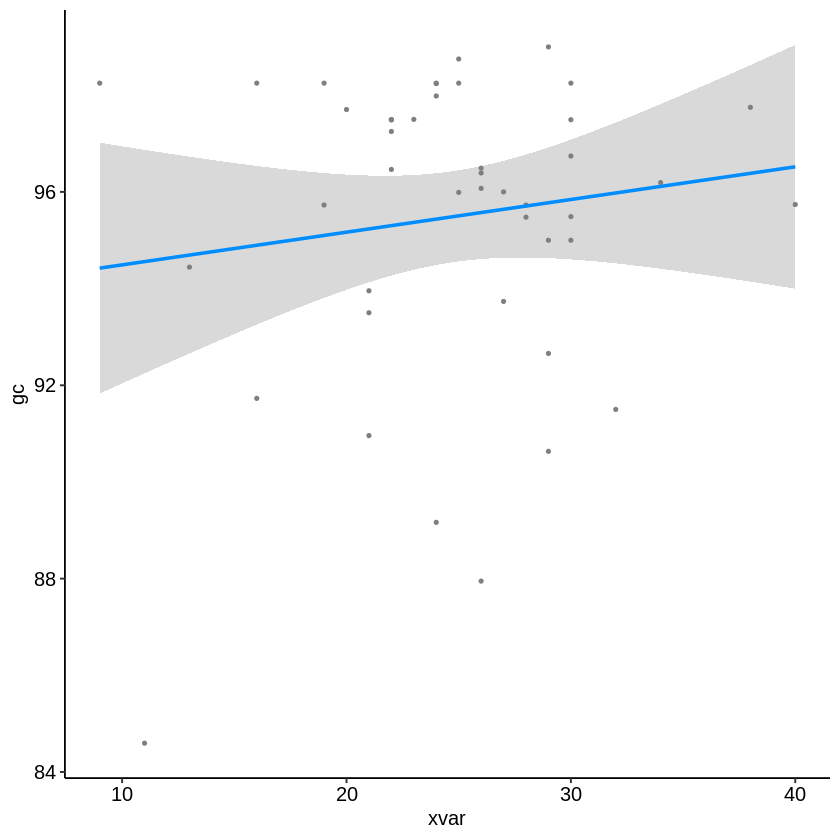

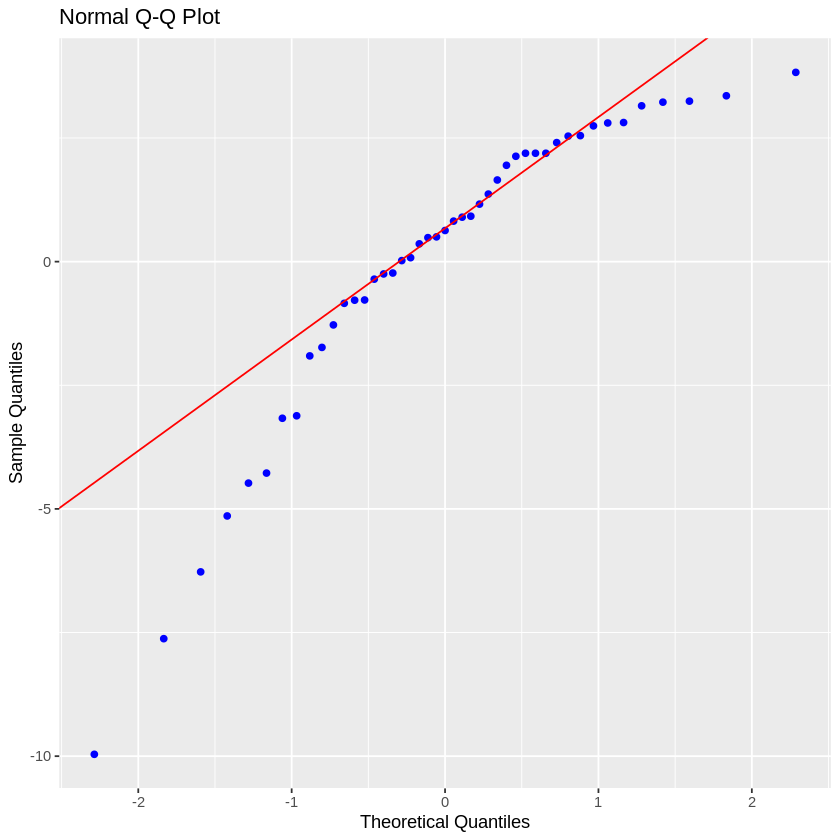


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : gc 
 Variables: m2 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2     df       p    
 -----------------------------------------
  m2               8.0035     1    0.00467 
 -----------------------------------------
  simultaneous     8.0035     1    0.00467 
 -----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


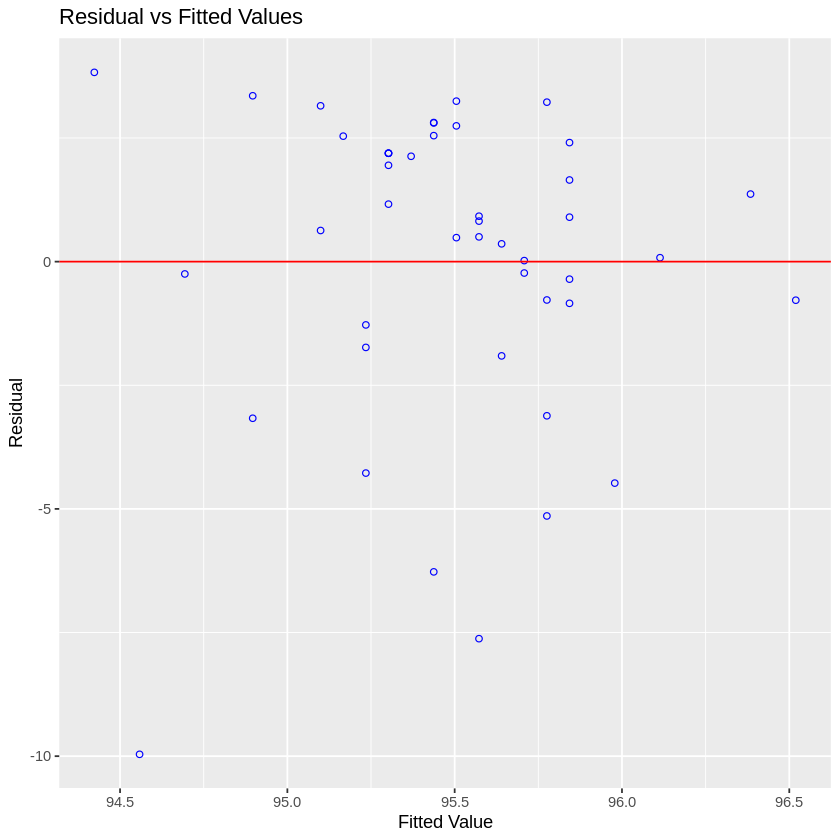

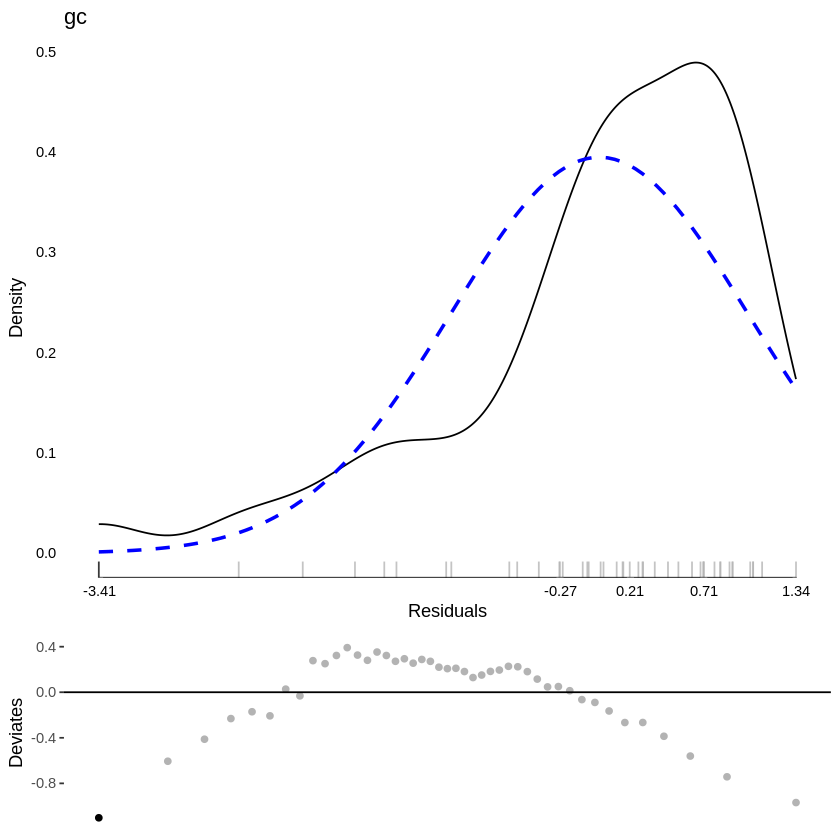

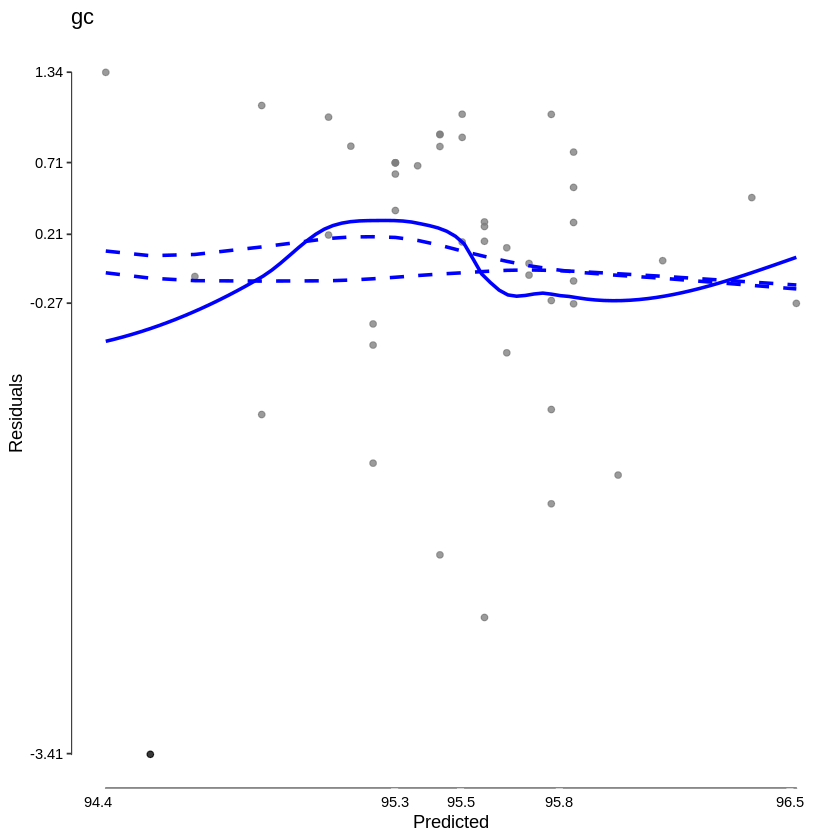

In [30]:
xvar = dbt
malt <- lm(gc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)


Call:
lm(formula = ngc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-36.79 -10.43   2.47   9.23  27.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   59.103      9.740    6.07  2.9e-07 ***
xvar           0.211      0.382    0.55     0.58    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.7 on 43 degrees of freedom
Multiple R-squared:  0.00704,	Adjusted R-squared:  -0.0161 
F-statistic: 0.305 on 1 and 43 DF,  p-value: 0.584


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.977          0.5045 
Kolmogorov-Smirnov        0.0965         0.7599 
Cramer-von Mises          3.784          0.0000 
Anderson-Darling          0.3151         0.5314 
-----------------------------------------------

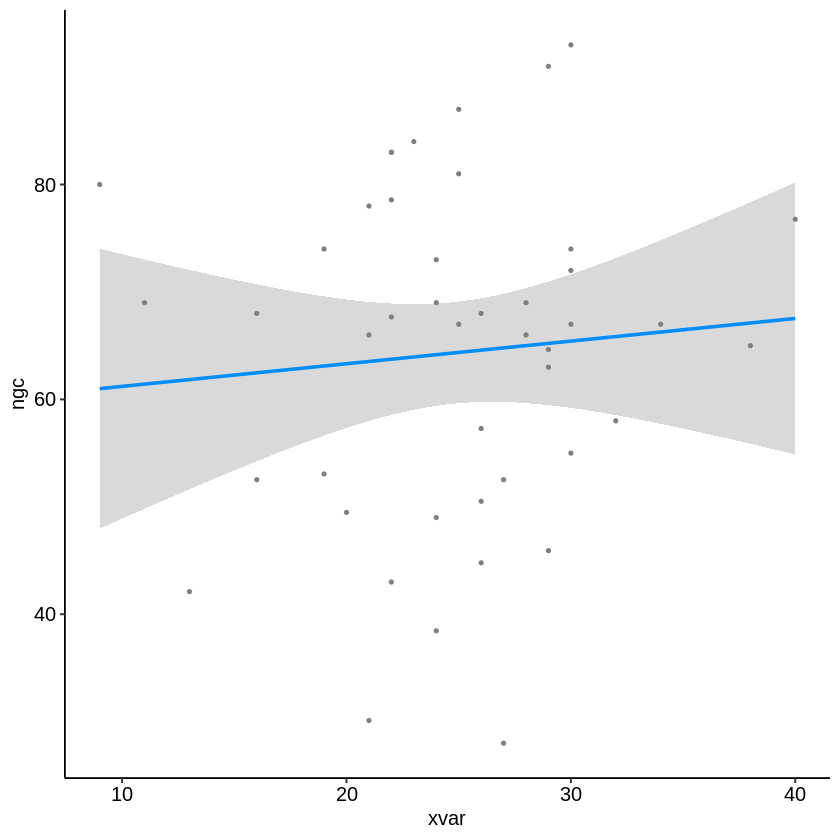

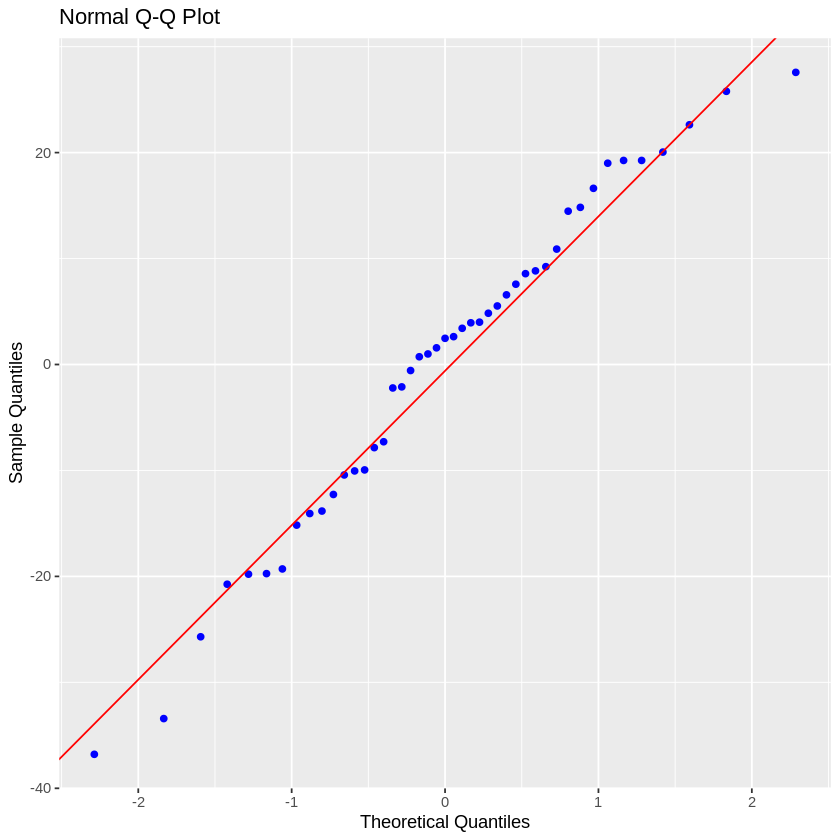


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : ngc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.4129     1    0.5205 
 ----------------------------------------
  simultaneous     0.4129     1    0.5205 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


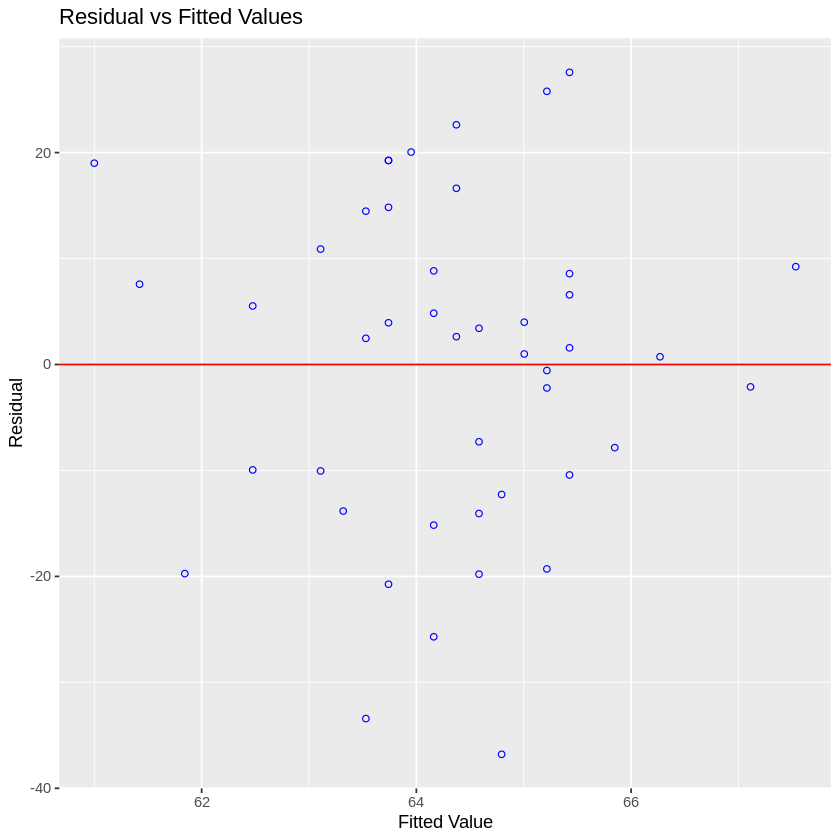

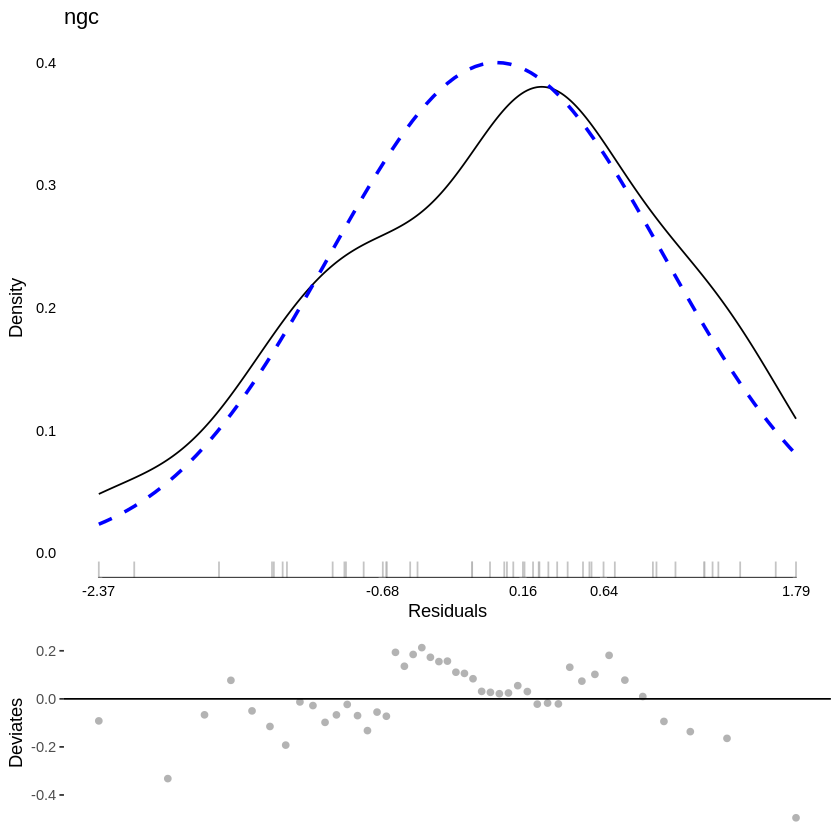

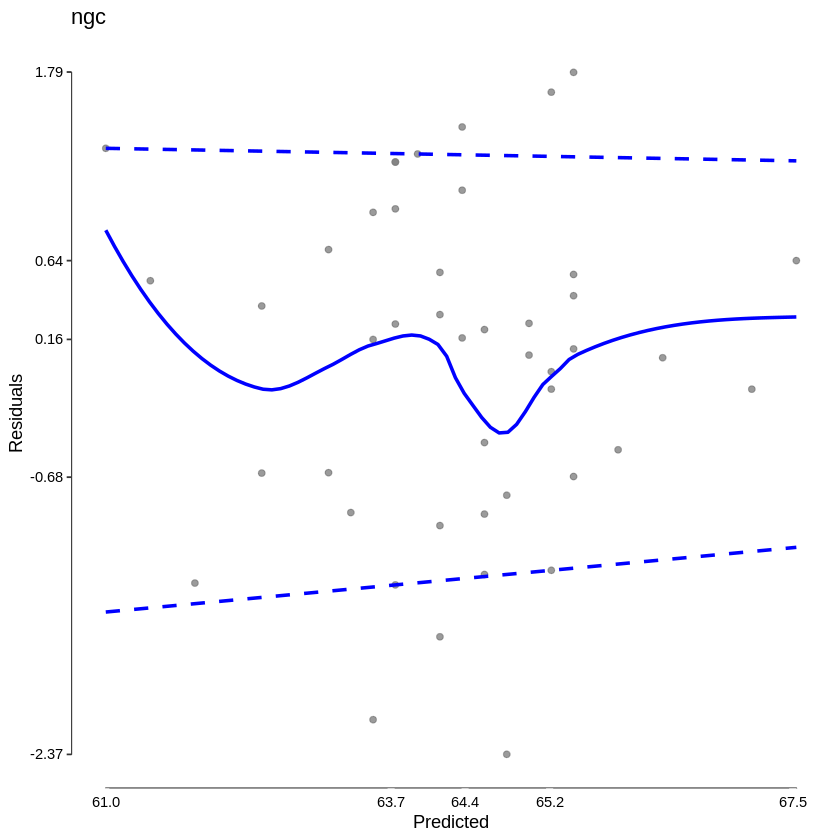

In [31]:
xvar = dbt
malt <- lm(ngc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### Exploratory - Non-Judging lm


Call:
lm(formula = gc ~ xvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.837  -0.968   0.626   2.183   3.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  95.2688     1.6210   58.77   <2e-16 ***
xvar          0.0103     0.0726    0.14     0.89    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.16 on 43 degrees of freedom
Multiple R-squared:  0.000467,	Adjusted R-squared:  -0.0228 
F-statistic: 0.0201 on 1 and 43 DF,  p-value: 0.888


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.844          0.0000 
Kolmogorov-Smirnov        0.1933         0.0601 
Cramer-von Mises          2.3216         0.0000 
Anderson-Darling          2.1755         0.0000 
-----------------------------------------------

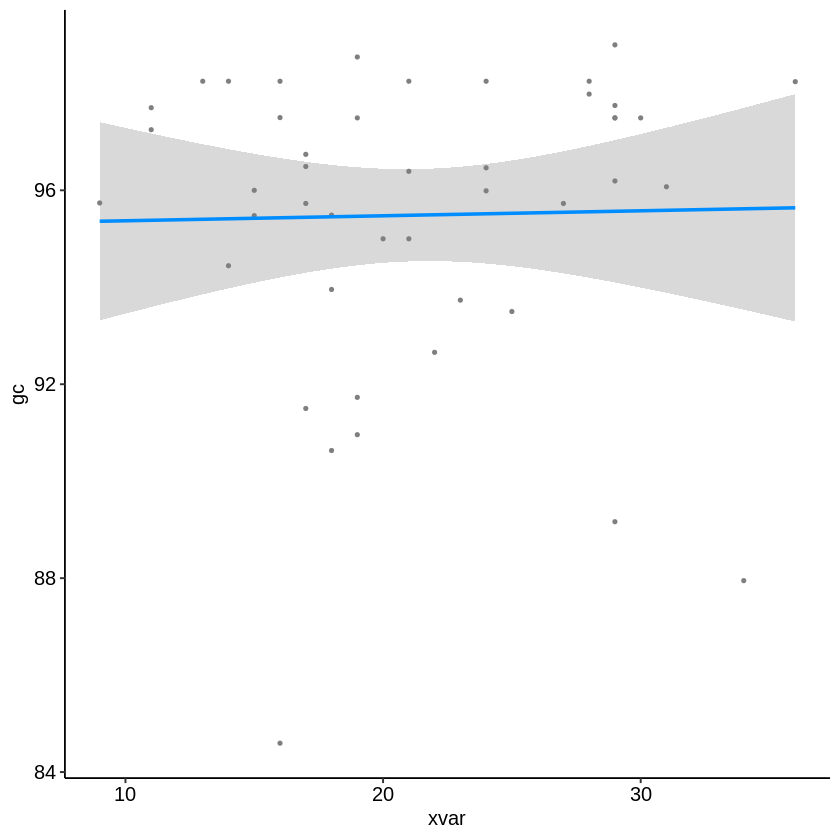

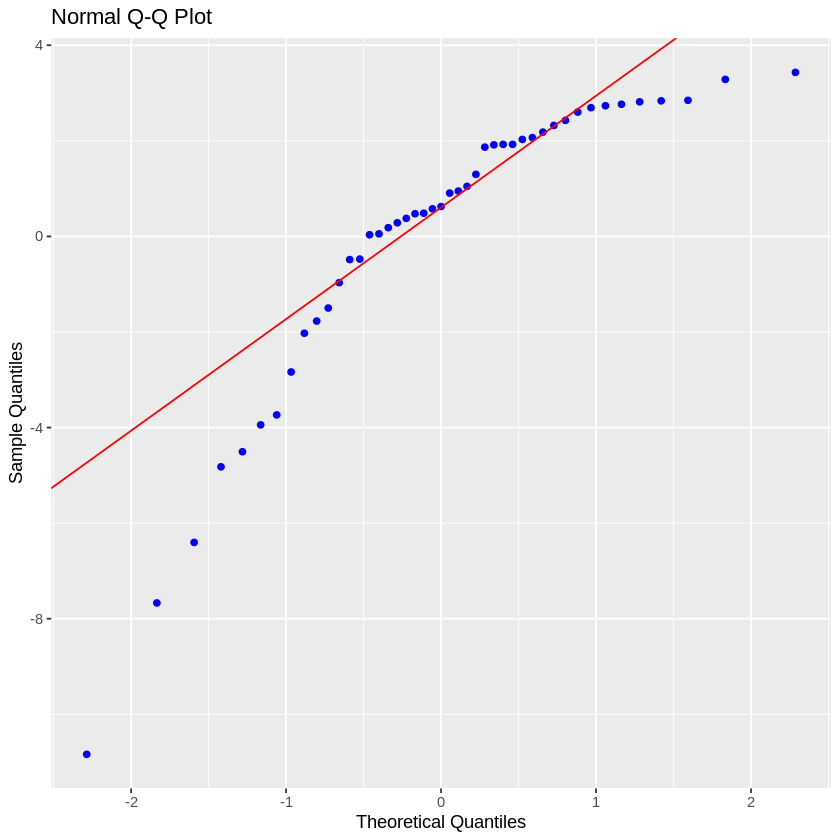


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : gc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.2654     1    0.6064 
 ----------------------------------------
  simultaneous     0.2654     1    0.6064 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


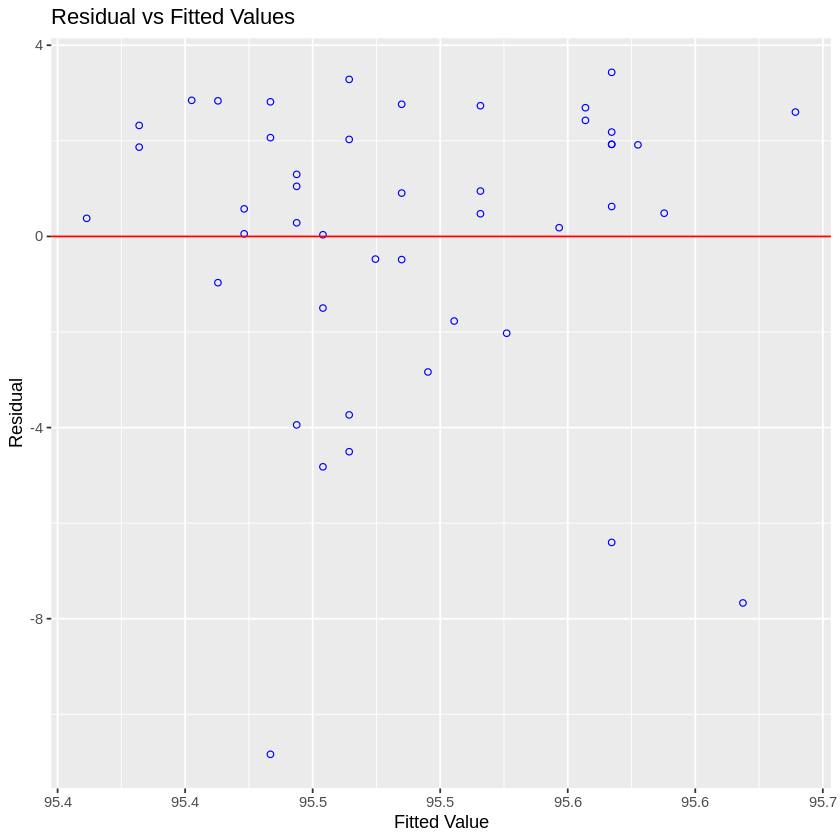

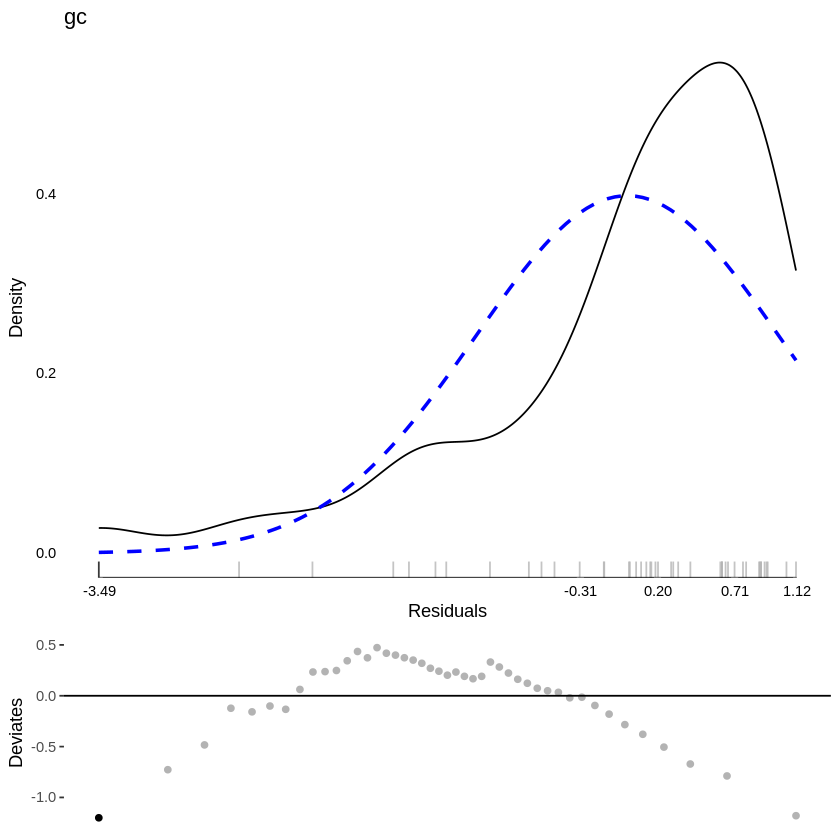

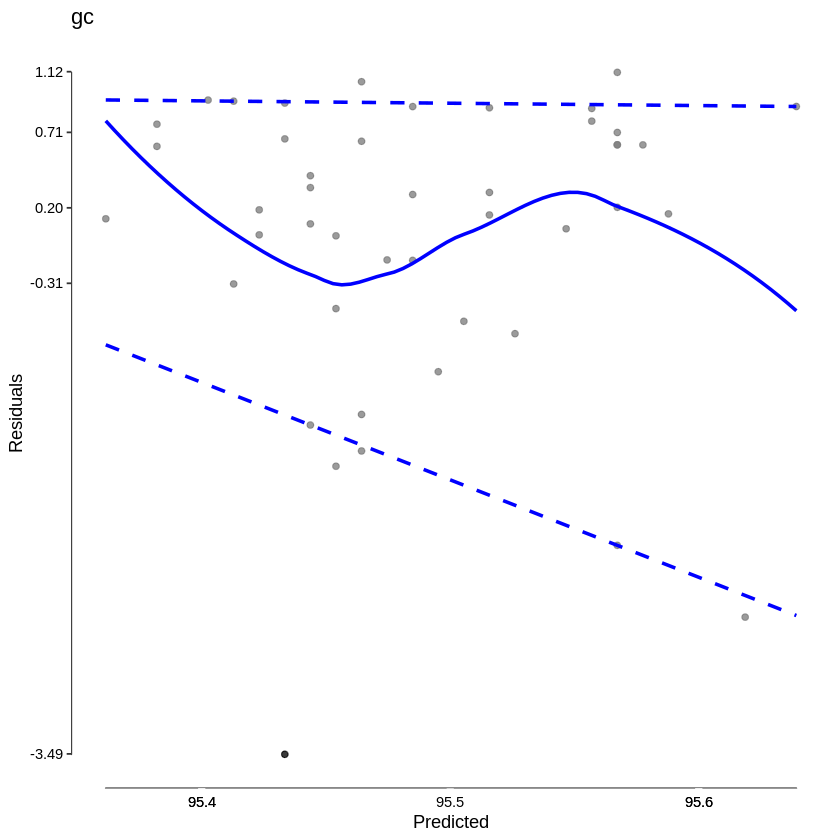

In [32]:
xvar = njt
malt <- lm(gc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)


Call:
lm(formula = ngc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-35.63  -9.20   2.11  10.88  29.88 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   73.251      7.964    9.20    1e-11 ***
xvar          -0.418      0.357   -1.17     0.25    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.5 on 43 degrees of freedom
Multiple R-squared:  0.031,	Adjusted R-squared:  0.00842 
F-statistic: 1.37 on 1 and 43 DF,  p-value: 0.248


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.978          0.5424 
Kolmogorov-Smirnov        0.1085         0.6251 
Cramer-von Mises          3.8715         0.0000 
Anderson-Darling          0.348          0.4625 
-----------------------------------------------

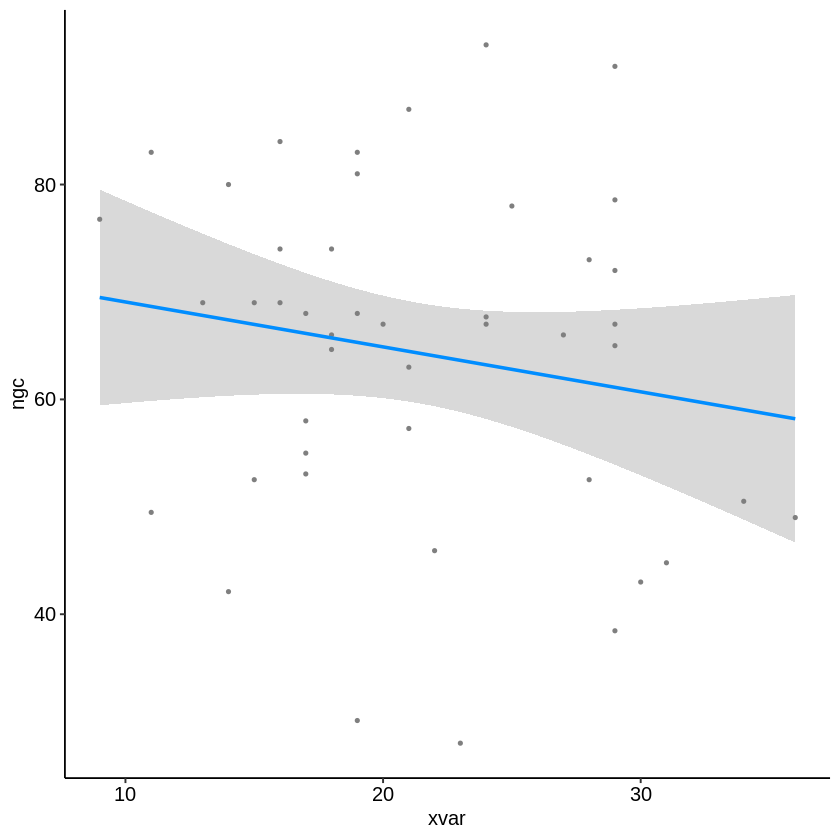

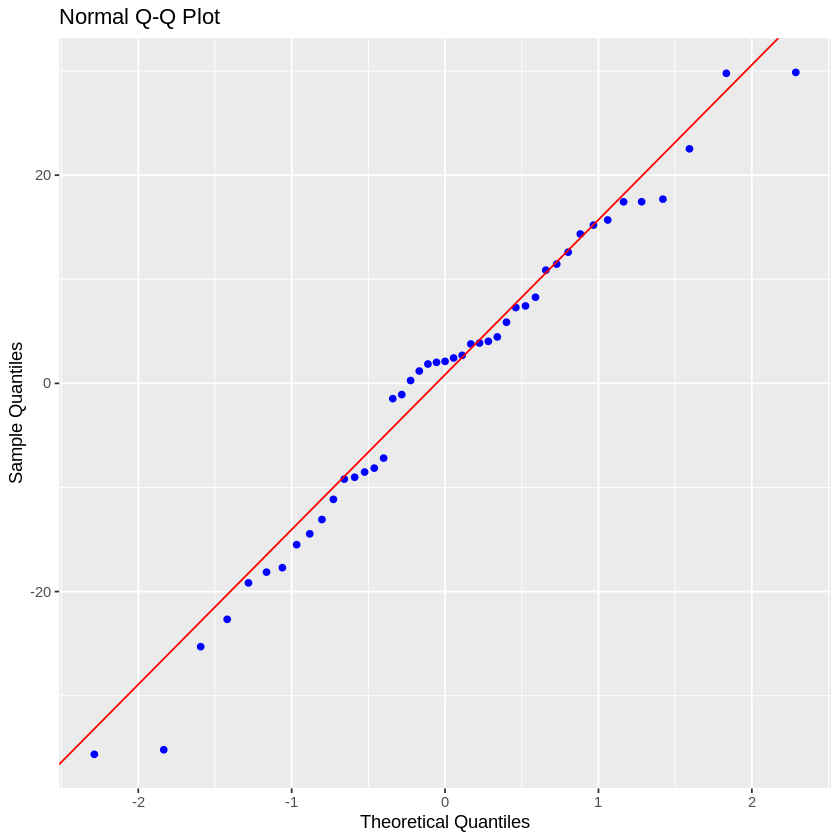


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : ngc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.2130     1    0.6445 
 ----------------------------------------
  simultaneous     0.2130     1    0.6445 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


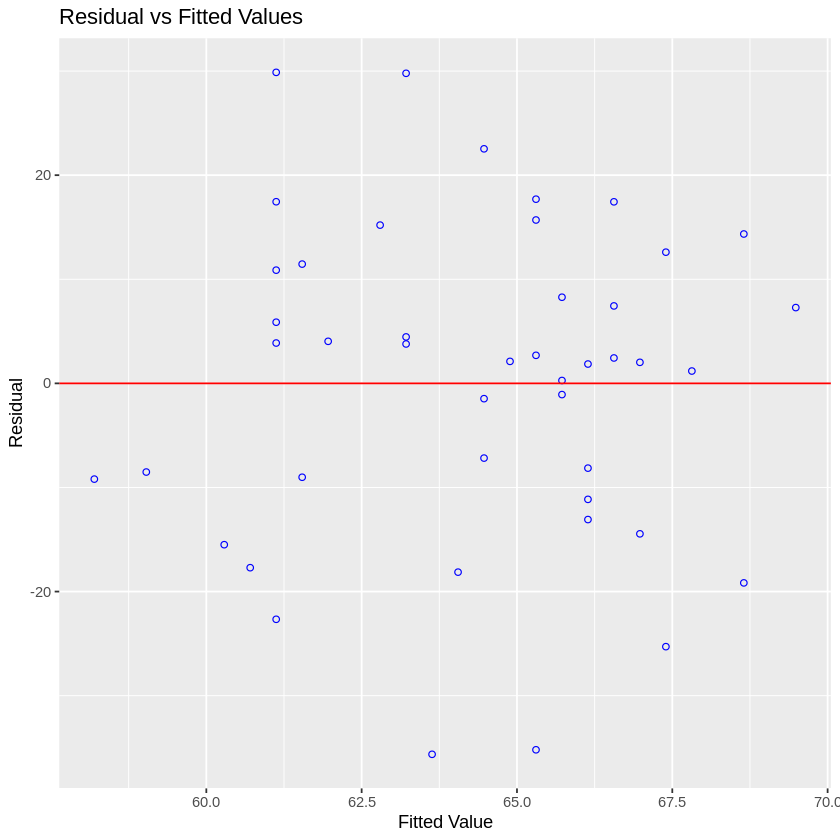

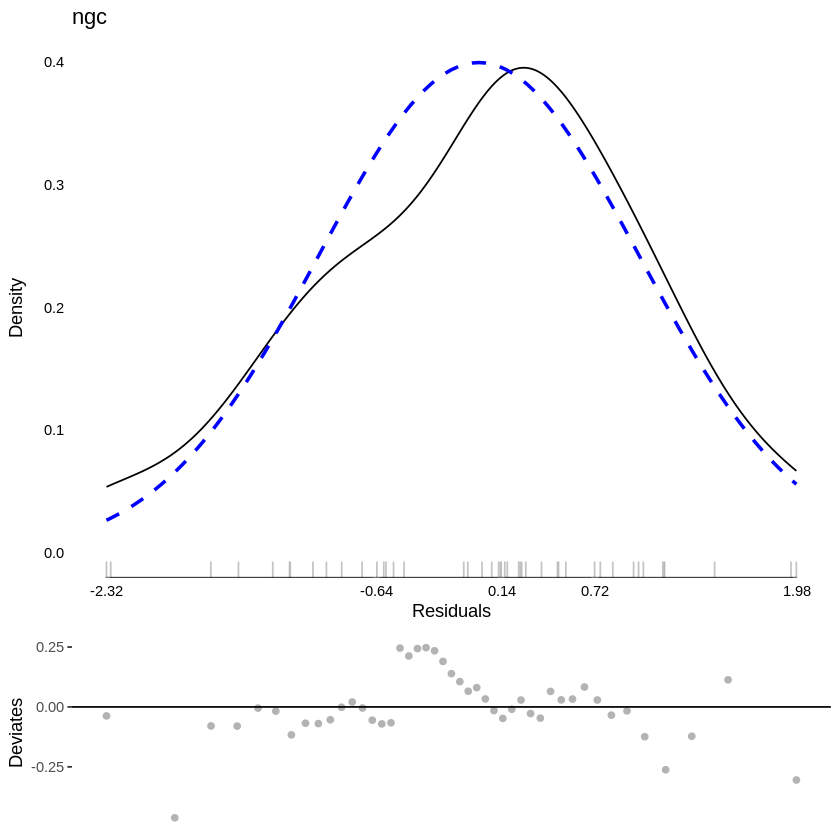

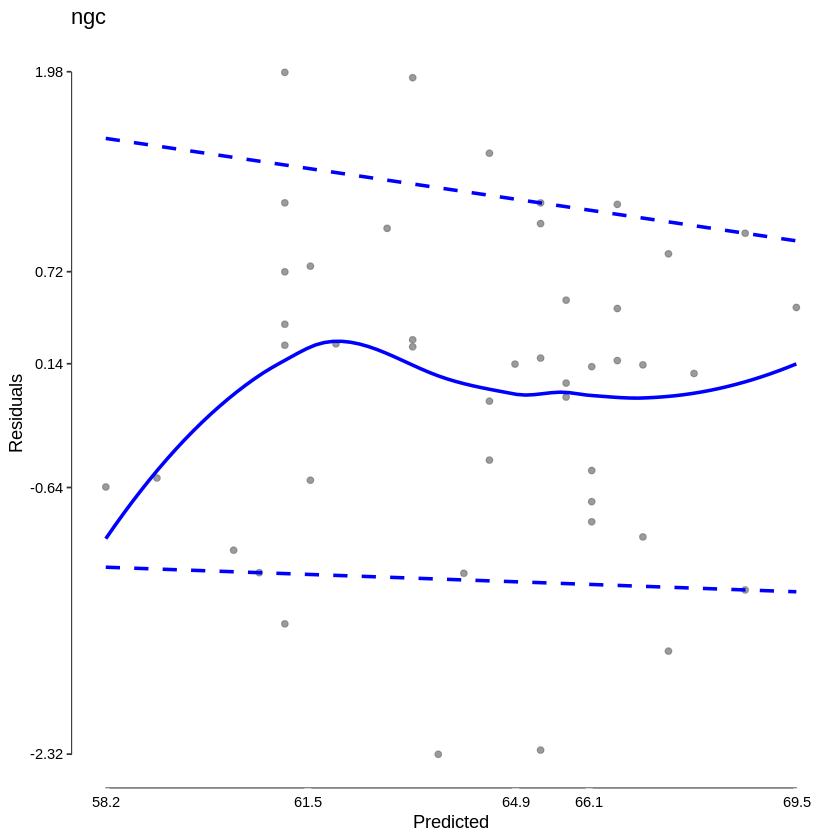

In [33]:
xvar = njt
malt <- lm(ngc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### Exploratory - Non-React lm


Call:
lm(formula = gc ~ xvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.495  -0.960   0.858   2.217   3.255 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   97.707      2.549   38.33   <2e-16 ***
xvar          -0.105      0.118   -0.89     0.38    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.13 on 43 degrees of freedom
Multiple R-squared:  0.0179,	Adjusted R-squared:  -0.00495 
F-statistic: 0.783 on 1 and 43 DF,  p-value: 0.381


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.8482         0.0000 
Kolmogorov-Smirnov        0.1906         0.0759 
Cramer-von Mises          2.6682         0.0000 
Anderson-Darling          2.1361         0.0000 
-----------------------------------------------

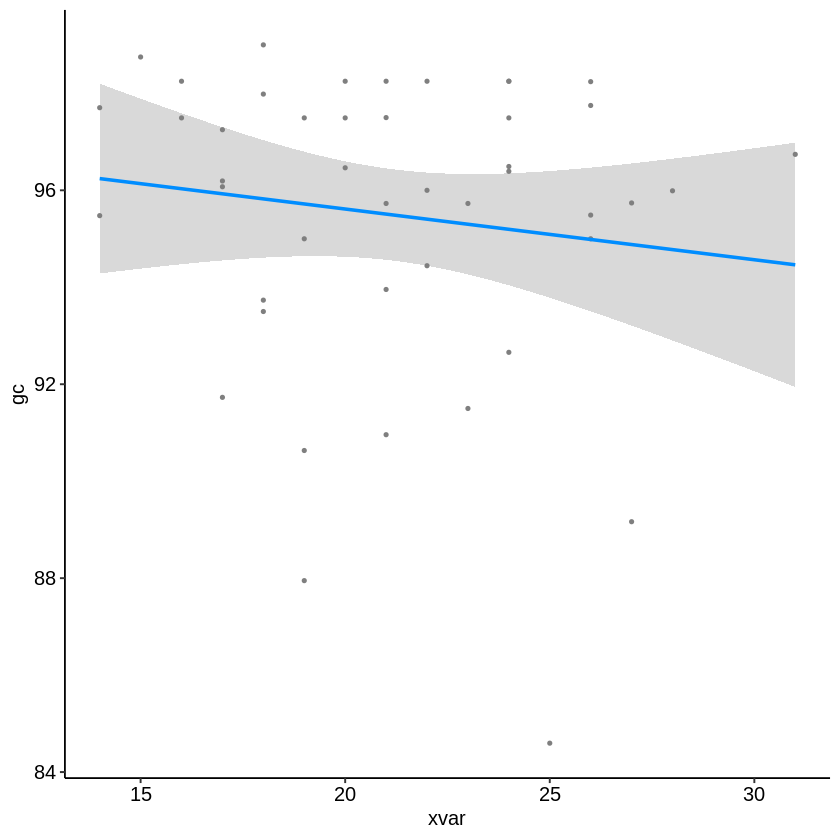

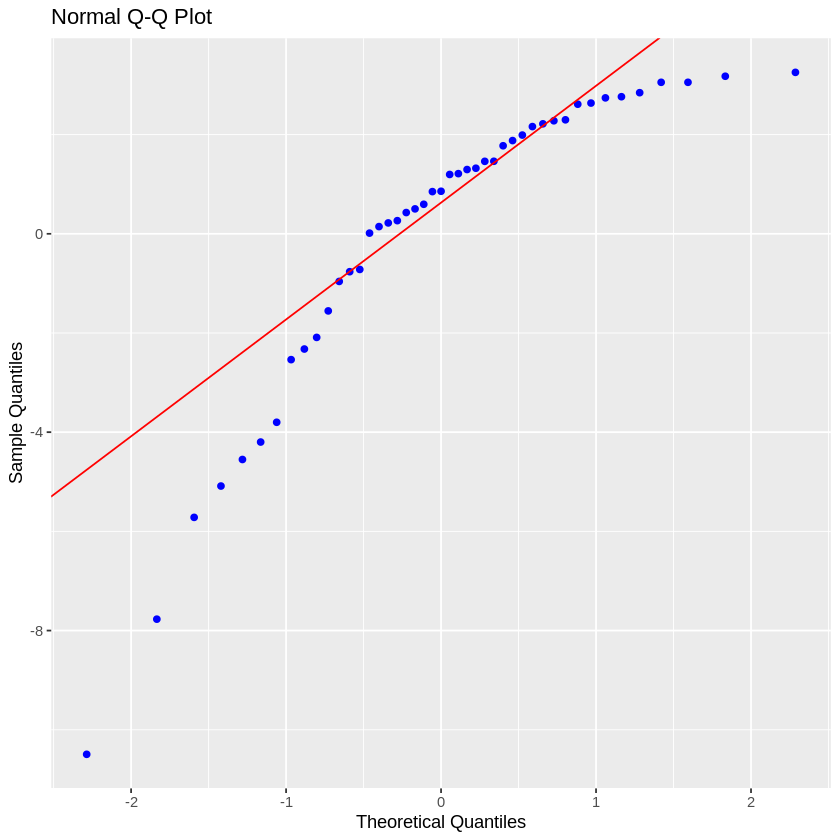


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : gc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               1.3730     1    0.2413 
 ----------------------------------------
  simultaneous     1.3730     1    0.2413 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


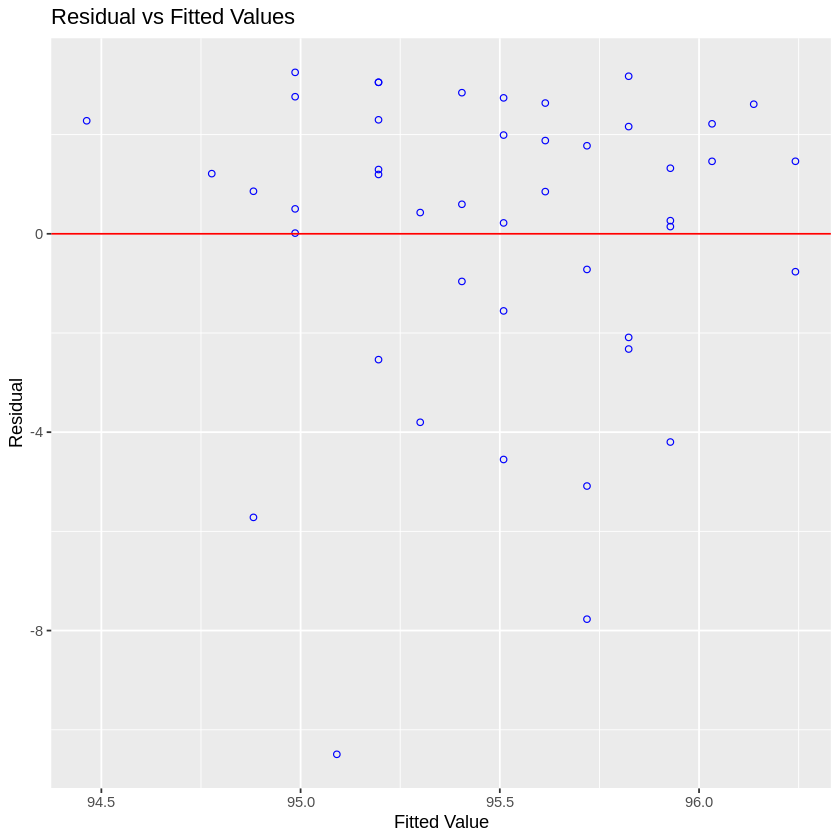

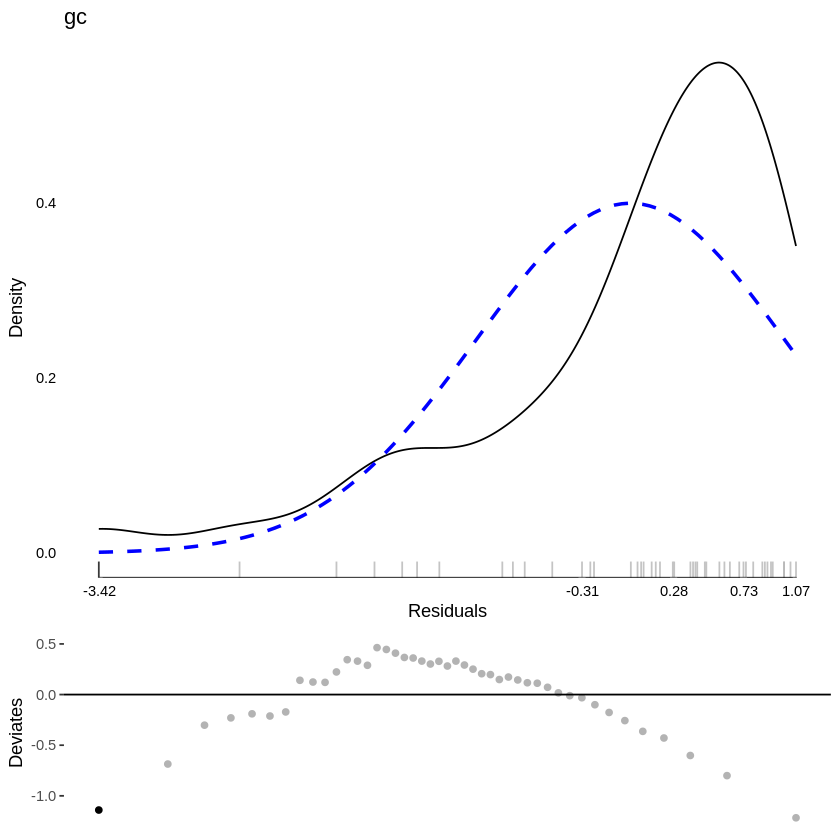

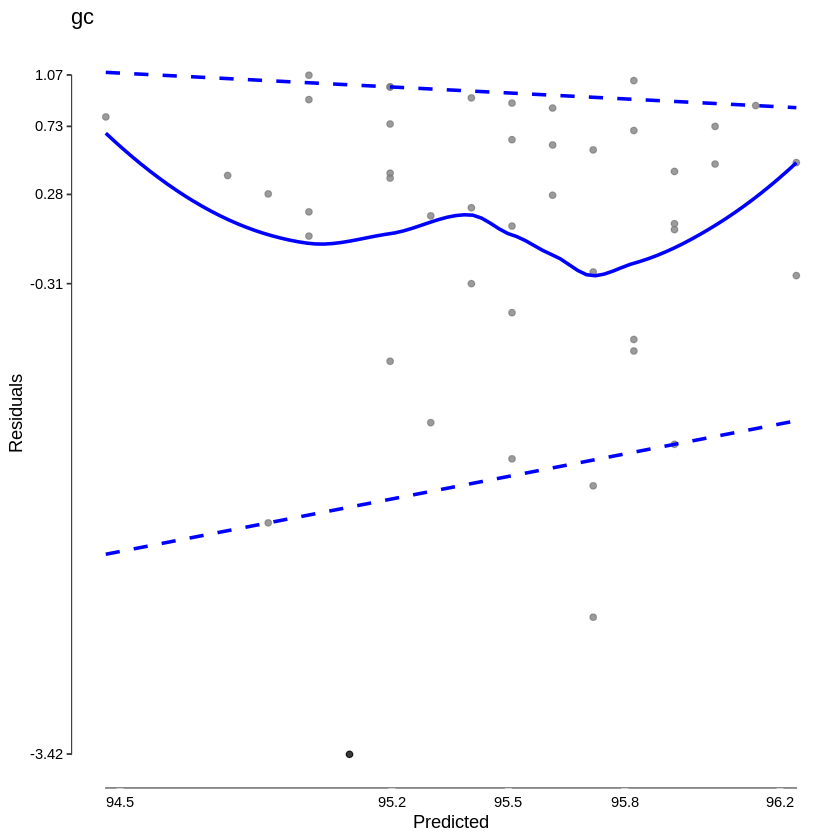

In [34]:
xvar = nrt
malt <- lm(gc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)


Call:
lm(formula = ngc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-38.13 -11.34   1.57  11.87  30.26 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   76.314     12.700    6.01  3.5e-07 ***
xvar          -0.566      0.589   -0.96     0.34    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.6 on 43 degrees of freedom
Multiple R-squared:  0.021,	Adjusted R-squared:  -0.00176 
F-statistic: 0.923 on 1 and 43 DF,  p-value: 0.342


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.973          0.3704 
Kolmogorov-Smirnov         0.13          0.3978 
Cramer-von Mises          3.7473         0.0000 
Anderson-Darling          0.4849         0.2165 
-----------------------------------------------

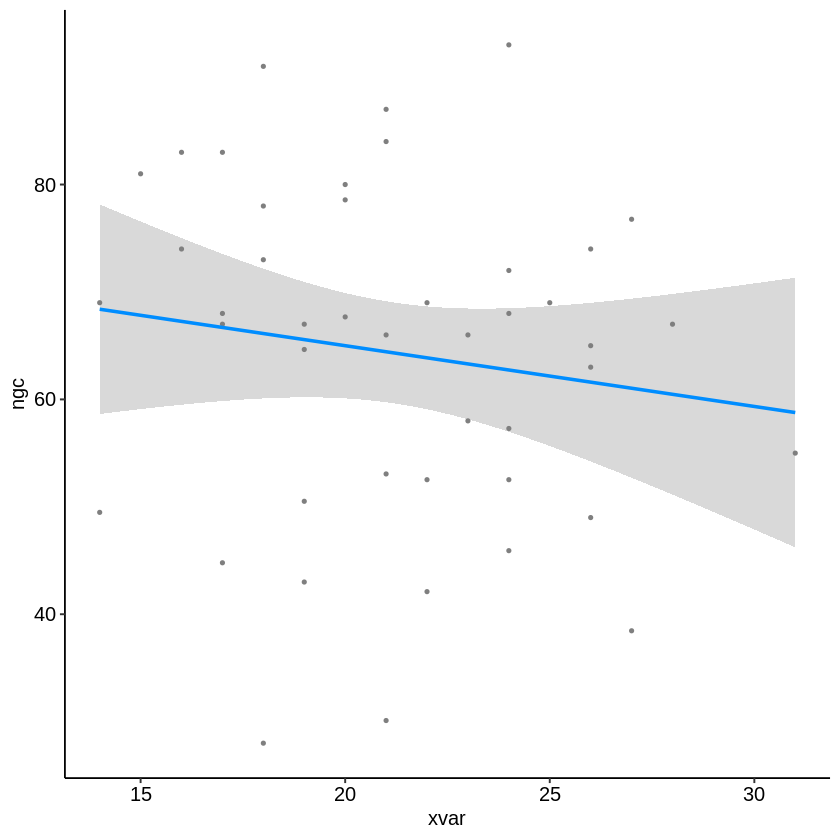

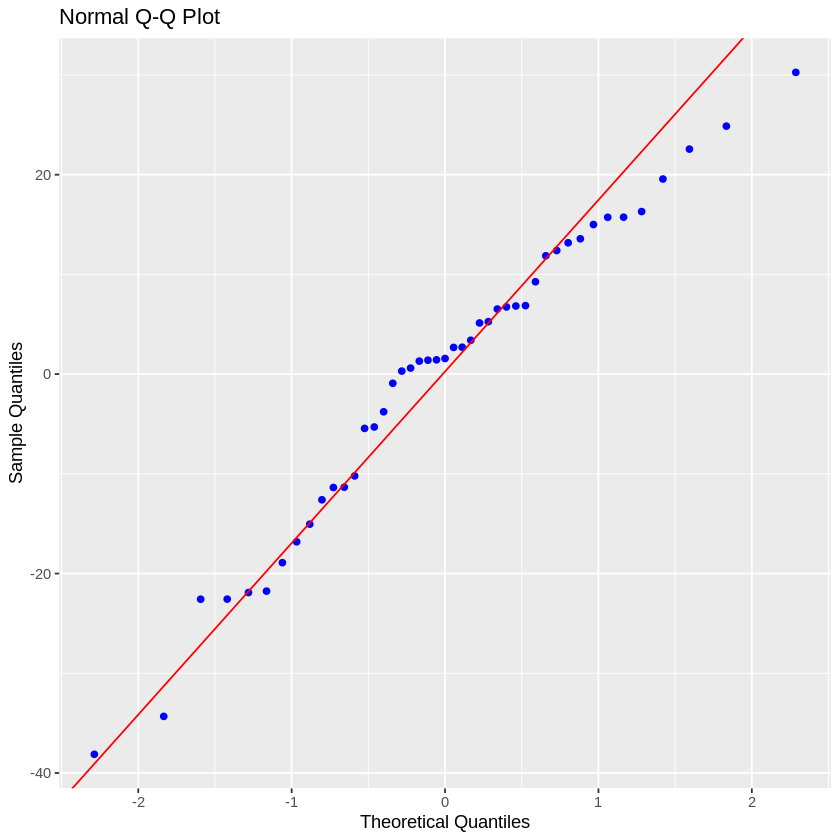


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : ngc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.6299     1    0.4274 
 ----------------------------------------
  simultaneous     0.6299     1    0.4274 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


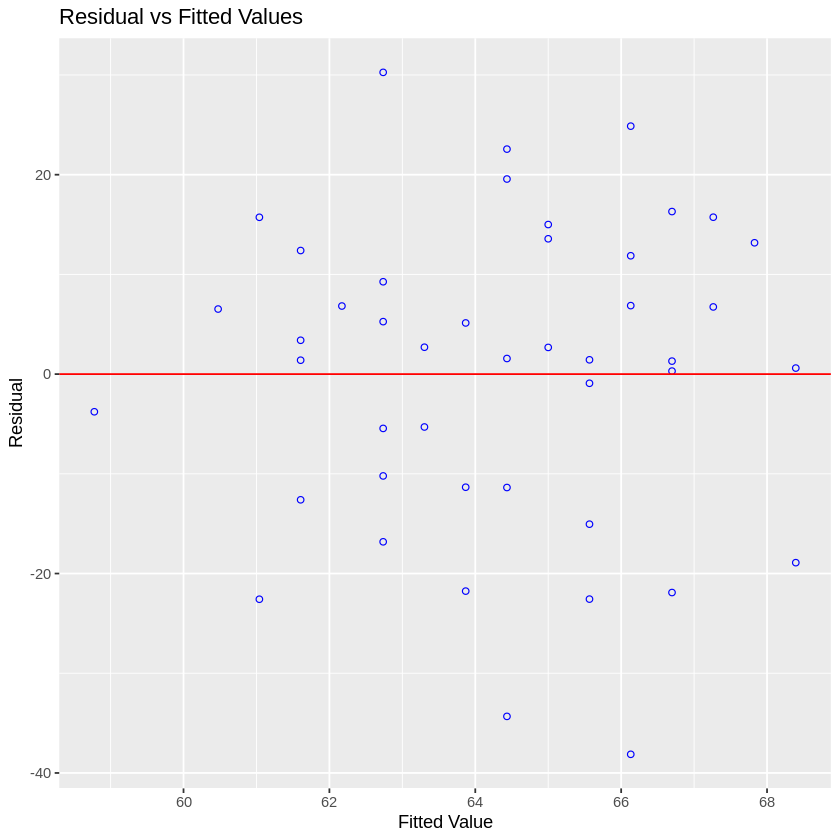

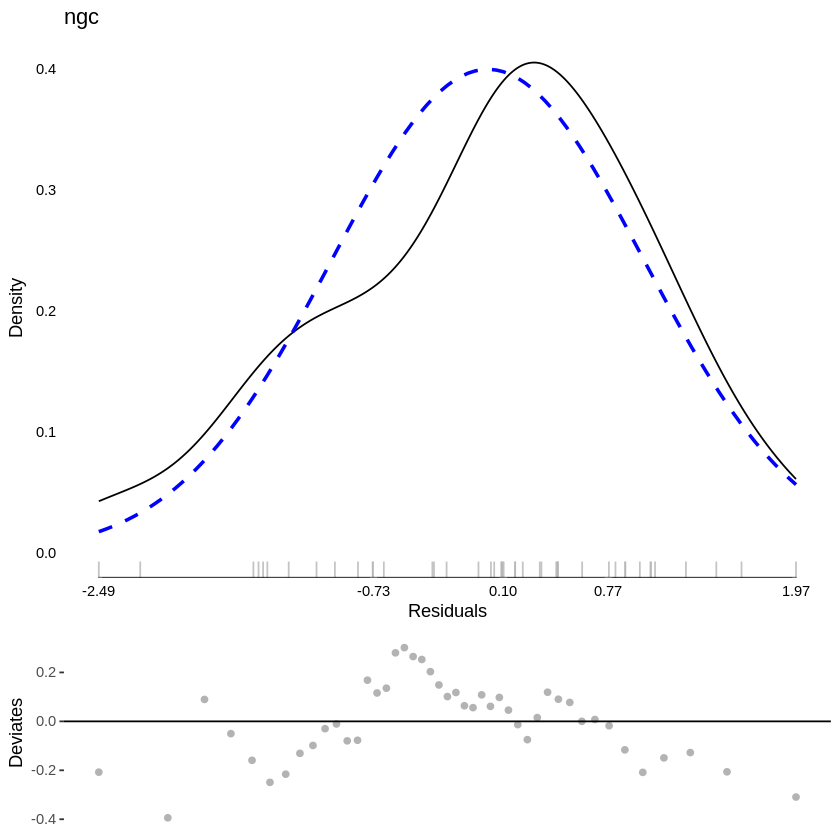

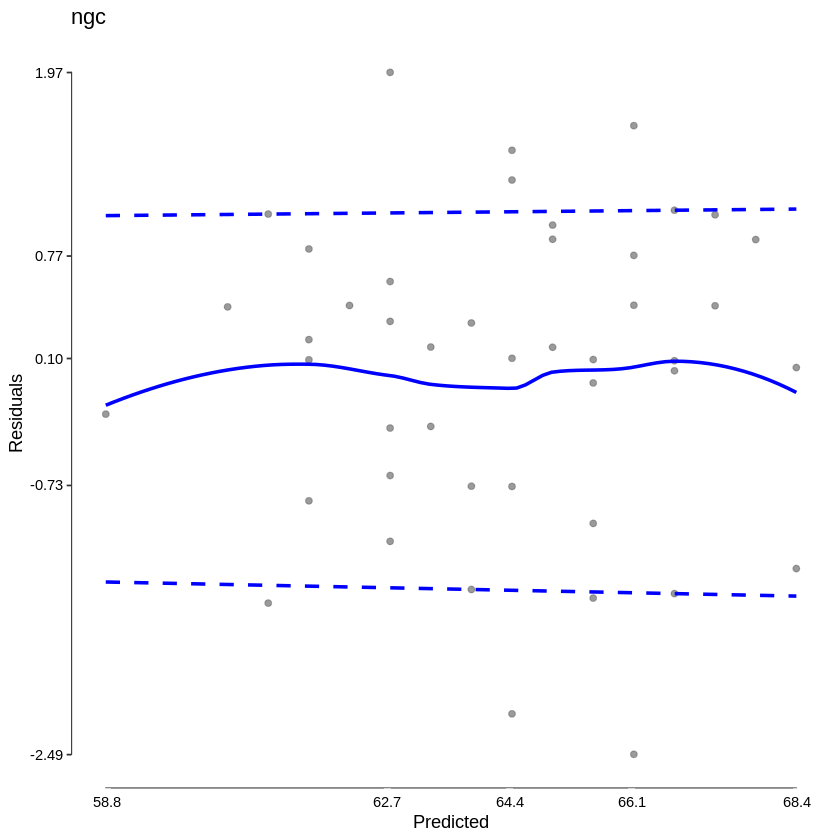

In [35]:
xvar = nrt
malt <- lm(ngc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

---

## Main Findings - Controlling for STAI and Facets

### Go Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = gc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-6.475 -1.526  0.326  2.160  3.697 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 83.98658    6.20096   13.54    4e-16 ***
xvar         0.26834    0.08621    3.11   0.0035 ** 
obt         -0.23433    0.08209   -2.85   0.0069 ** 
dbt          0.09171    0.07066    1.30   0.2021    
nrt         -0.00623    0.12161   -0.05   0.9594    
njt          0.04243    0.08324    0.51   0.6132    
stai         0.15883    0.05477    2.90   0.0062 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.63 on 38 degrees of freedom
Multiple R-squared:  0.391,	Adjusted R-squared:  0.294 
F-statistic: 4.06 on 6 and 38 DF,  p-value: 0.00306


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9514         0.0572 
Kolmogorov-Smirnov        0.1185         0.5142 
Cramer-von Mises          3.1167         0.0000 
Anderson-Darling          0.632          0.0934 
-----------------------------------------------

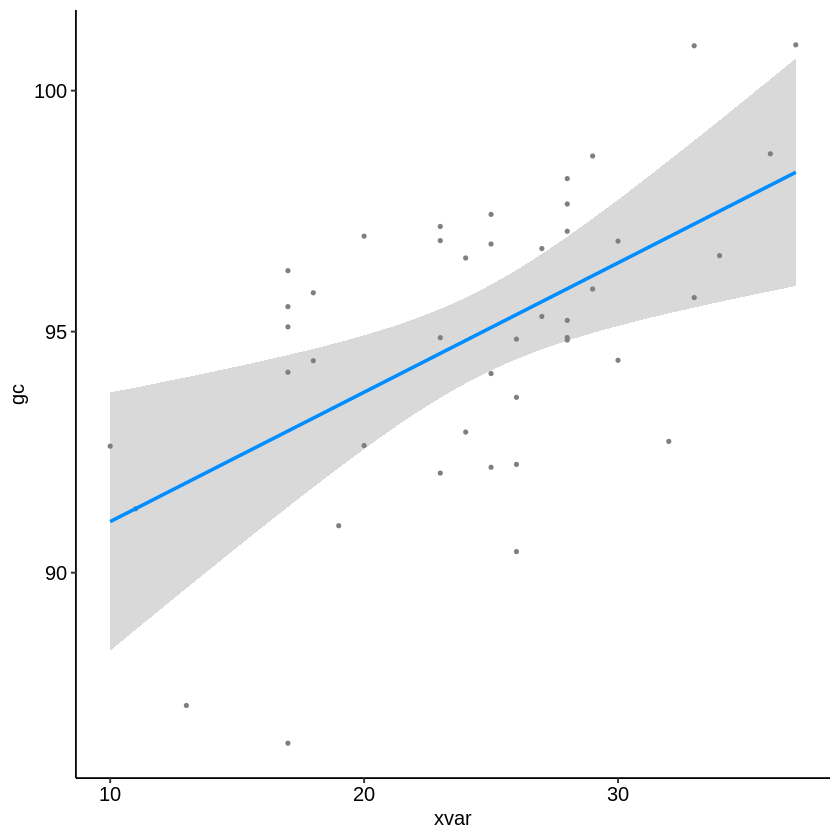

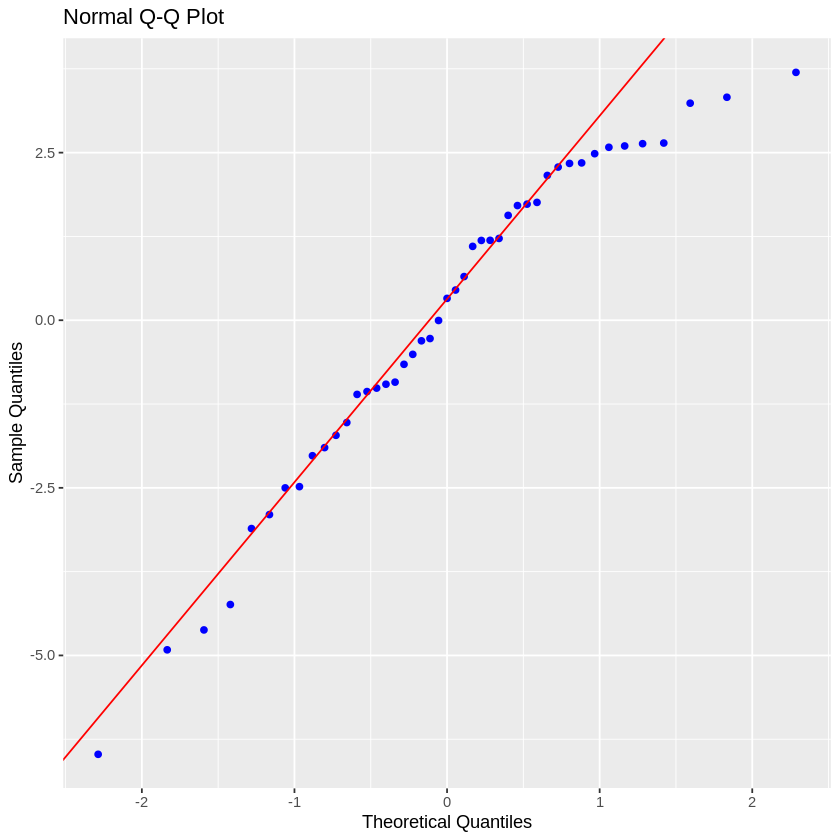


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : gc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  xvar             1.4523     1    1.0000 
  obt              0.2908     1    1.0000 
  dbt              0.7027     1    1.0000 
  nrt              0.0222     1    1.0000 
  njt              1.3297     1    1.0000 
  stai             0.0795     1    1.0000 
 ----------------------------------------
  simultaneous     7.0959     6    0.3121 
 ----------------------------------------

Variables Tolerance VIF 
1 xvar      0.531     1.88
2 obt       0.777     1.29
3 dbt       0.815     1.23
4 nrt       0.663     1.51
5 njt       0.525     1.90
6 stai      0.368     2.71

Eigenvalue Condition Index intercept xvar     obt      dbt     nrt     
1 6.71641     1.00           8.78e-05  0.000687 0.000697 0.00101 4.83e-04
2 0.13249     7.12           5.15e-04  0.031156 0.011216 0.00365 3.76e-05
3 0.06010    10.57           2.18e-03  0.040463 0.061317 0.09327 2.56e-02
4 0.03921    13.09           1.86e-04  0.020814 0.100820 0.83401 8.05e-02
5 0.02983    15.01           1.37e-03  0.538652 0.339441 0.04351 2.08e-03
6 0.01881    18.90           2.21e-04  0.193539 0.447413 0.01690 7.32e-01
7 0.00316    46.10           9.95e-01  0.174688 0.039096 0.00765 1.59e-01
  njt      stai    
1 0.000915 0.000395
2 0.106274 0.070238
3 0.316347 0.052194
4 0.000721 0.007882
5 0.122780 0.043337
6 0.003436 0.000611
7 0.449527 0.825342

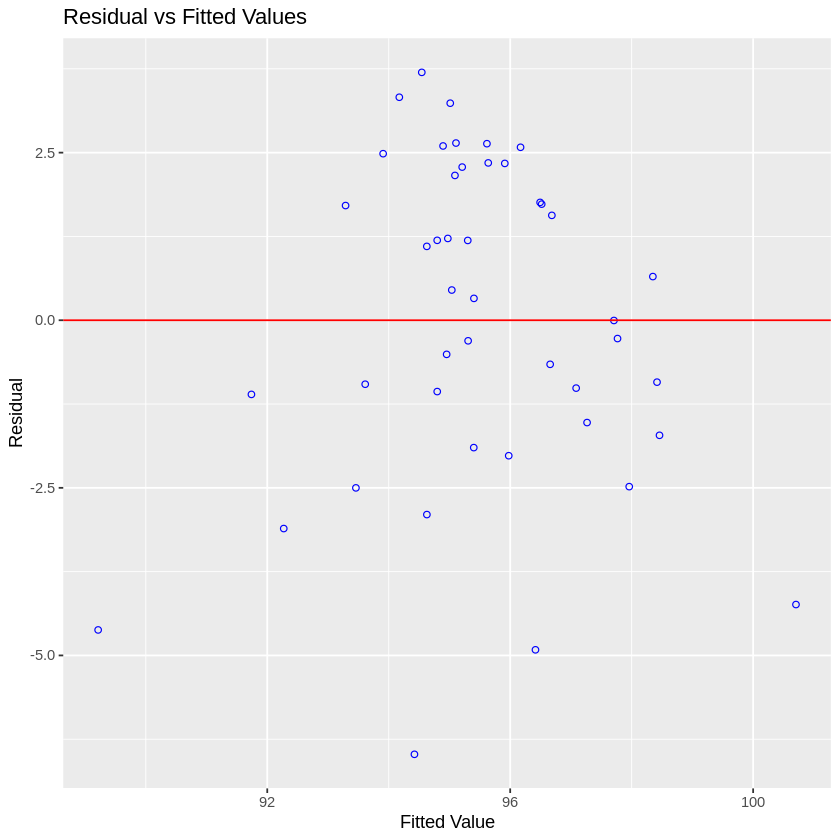

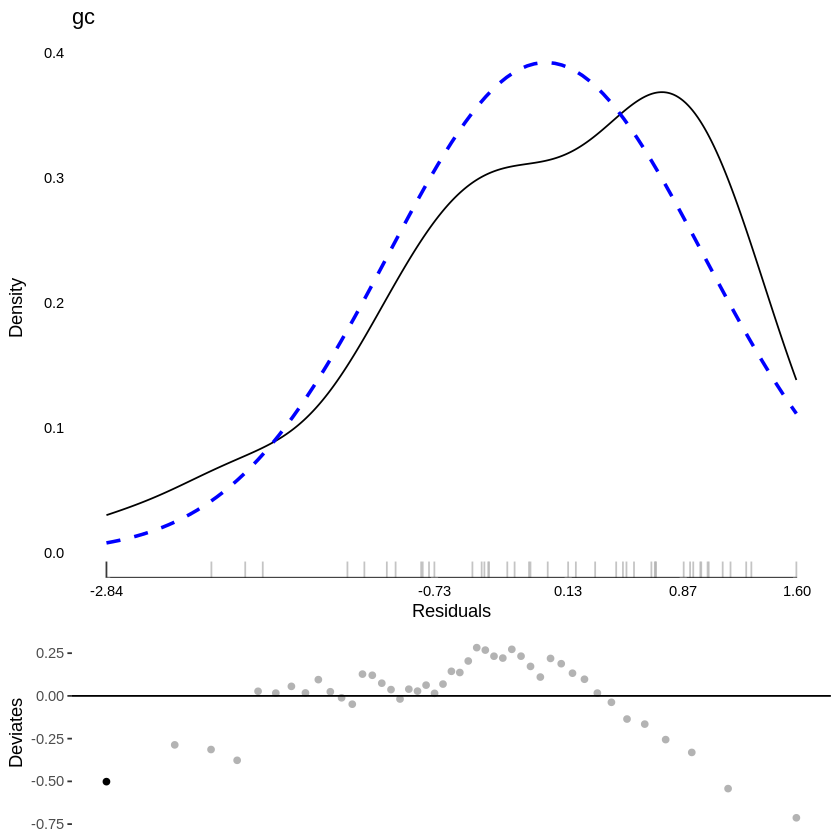

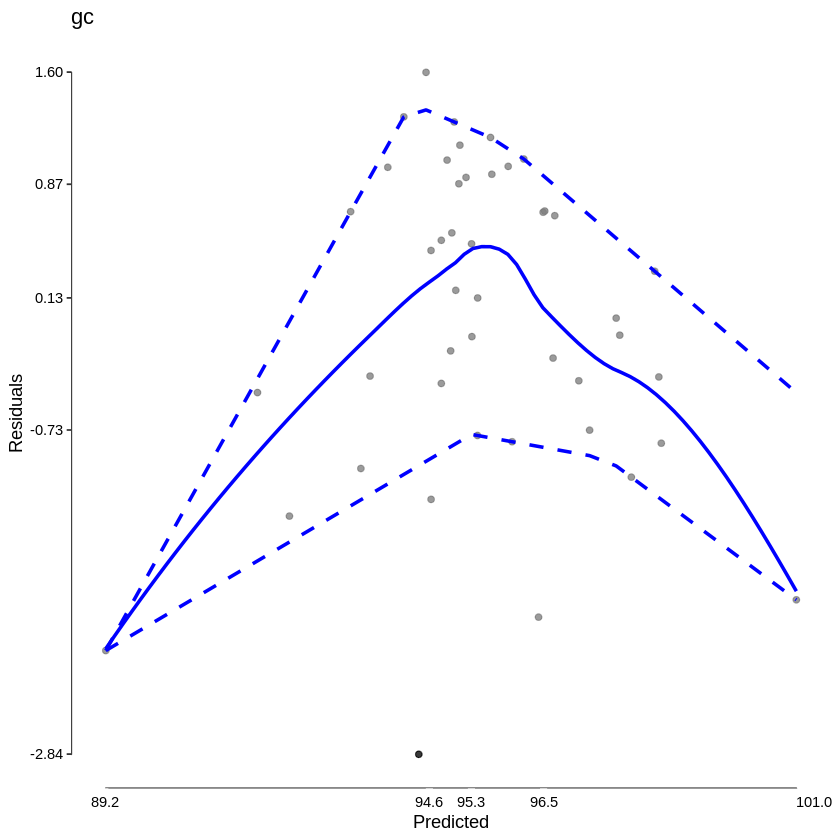

In [36]:
xvar = aat

malt <- lm(gc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

ols_vif_tol(malt)
ols_eigen_cindex(malt)

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### noGo Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = ngc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-36.11  -9.73   1.56  10.16  28.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   70.785     37.844    1.87    0.069 .
xvar           0.102      0.526    0.19    0.847  
obt           -0.358      0.501   -0.71    0.480  
dbt            0.461      0.431    1.07    0.291  
nrt           -0.419      0.742   -0.56    0.576  
njt           -0.416      0.508   -0.82    0.418  
stai           0.132      0.334    0.40    0.694  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16 on 38 degrees of freedom
Multiple R-squared:  0.0884,	Adjusted R-squared:  -0.0555 
F-statistic: 0.614 on 6 and 38 DF,  p-value: 0.718


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk               0.98          0.6185 
Kolmogorov-Smirnov        0.1047         0.6686 
Cramer-von Mises          3.7108         0.0000 
Anderson-Darling          0.2976         0.5745 
-----------------------------------------------

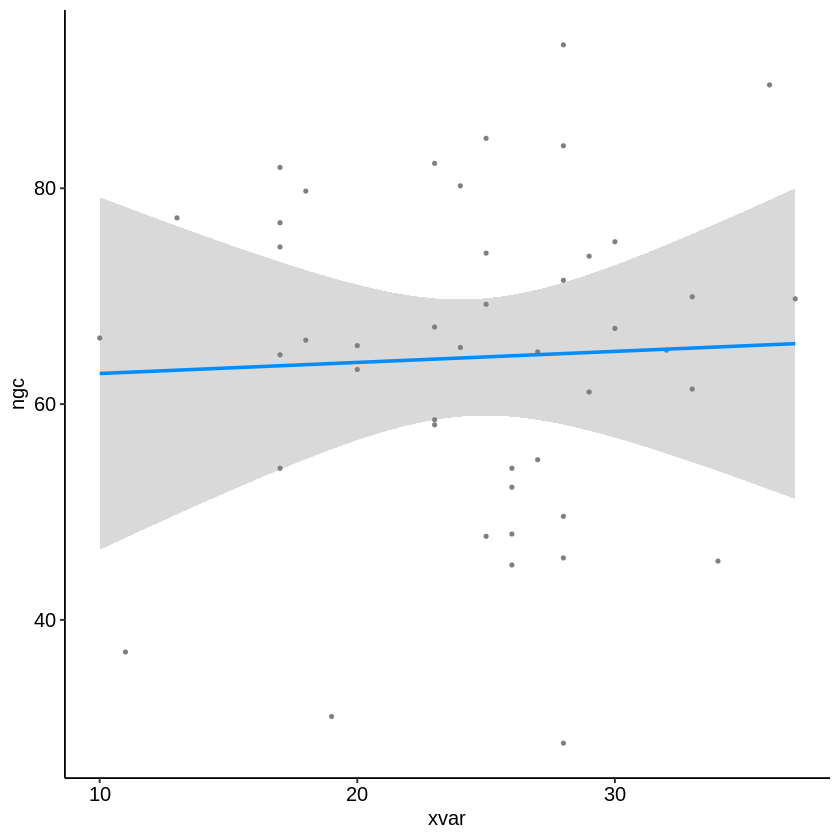

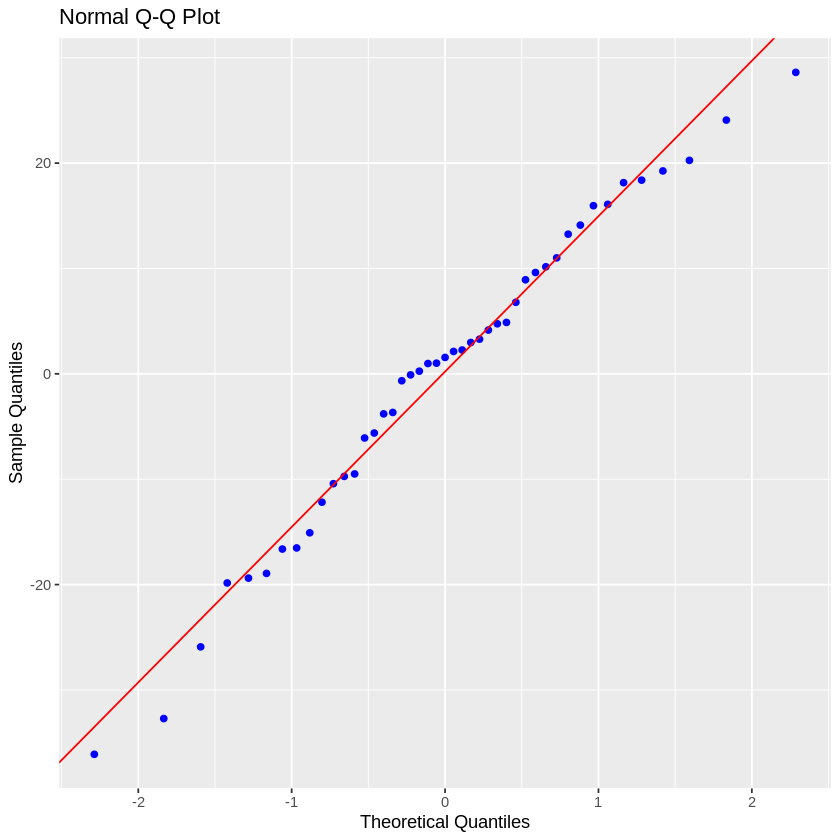


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : ngc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  xvar             0.00170     1    1.0000 
  obt              0.51088     1    1.0000 
  dbt              0.69364     1    1.0000 
  nrt              1.49782     1    1.0000 
  njt              0.00085     1    1.0000 
  stai             0.01535     1    1.0000 
 -----------------------------------------
  simultaneous     2.69456     6    0.8461 
 -----------------------------------------

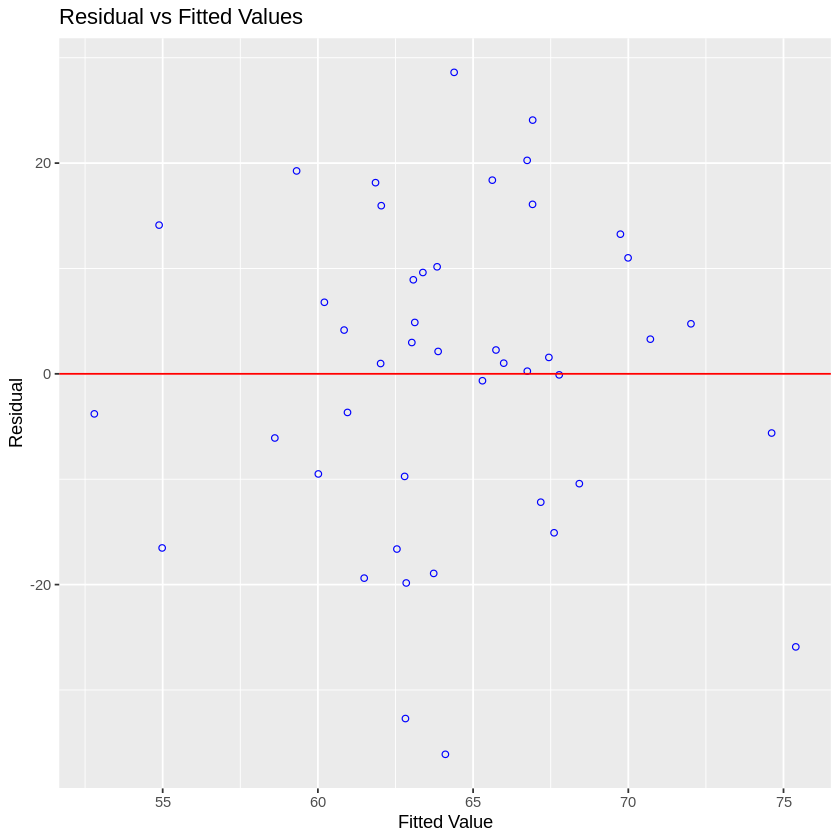

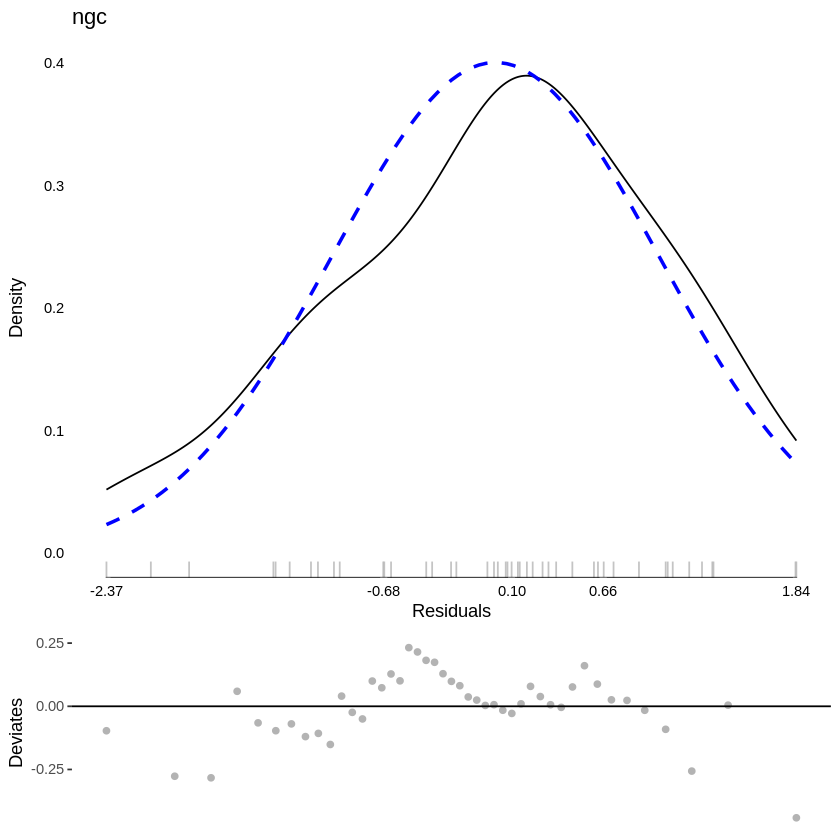

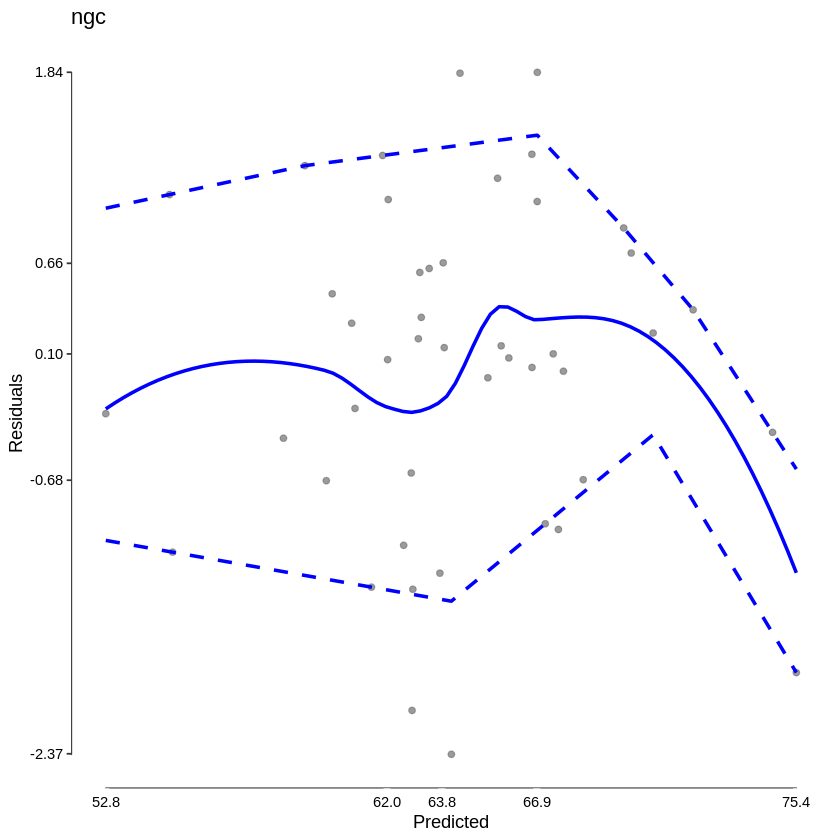

In [37]:
xvar = aat
malt <- lm(ngc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

## Main Findings - Observation

### Go Accuracy 


Call:
lm(formula = gc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-9.425 -1.101  0.673  2.024  3.937 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.8543     2.1499   46.91   <2e-16 ***
xvar         -0.2071     0.0812   -2.55    0.014 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 43 degrees of freedom
Multiple R-squared:  0.131,	Adjusted R-squared:  0.111 
F-statistic:  6.5 on 1 and 43 DF,  p-value: 0.0144


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.8909          5e-04 
Kolmogorov-Smirnov        0.144          0.3085 
Cramer-von Mises          2.7978         0.0000 
Anderson-Darling          1.4704          7e-04 
-----------------------------------------------

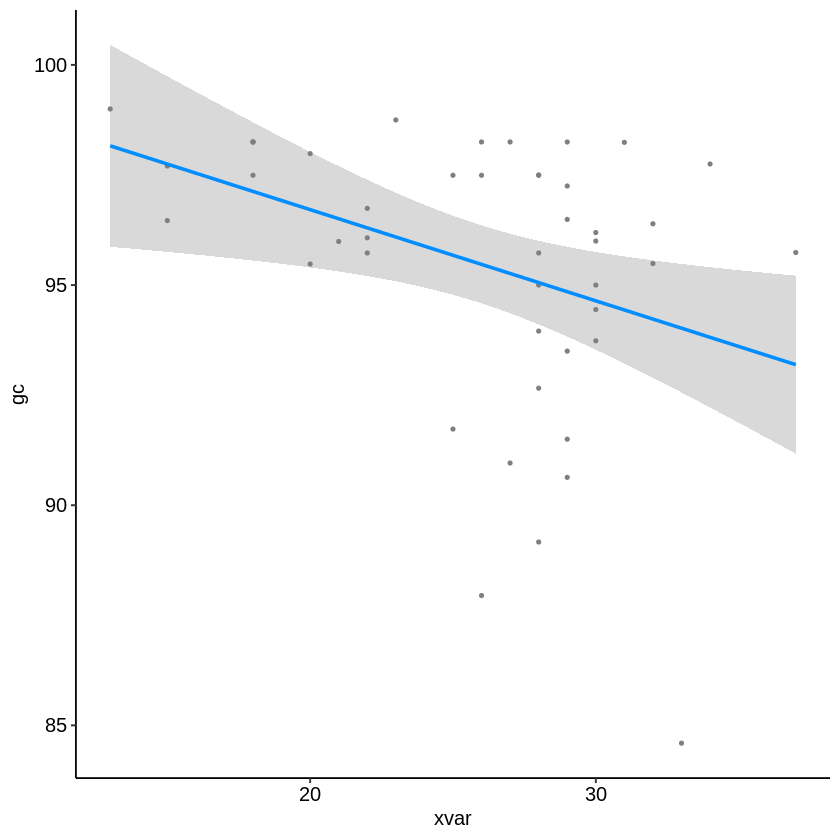

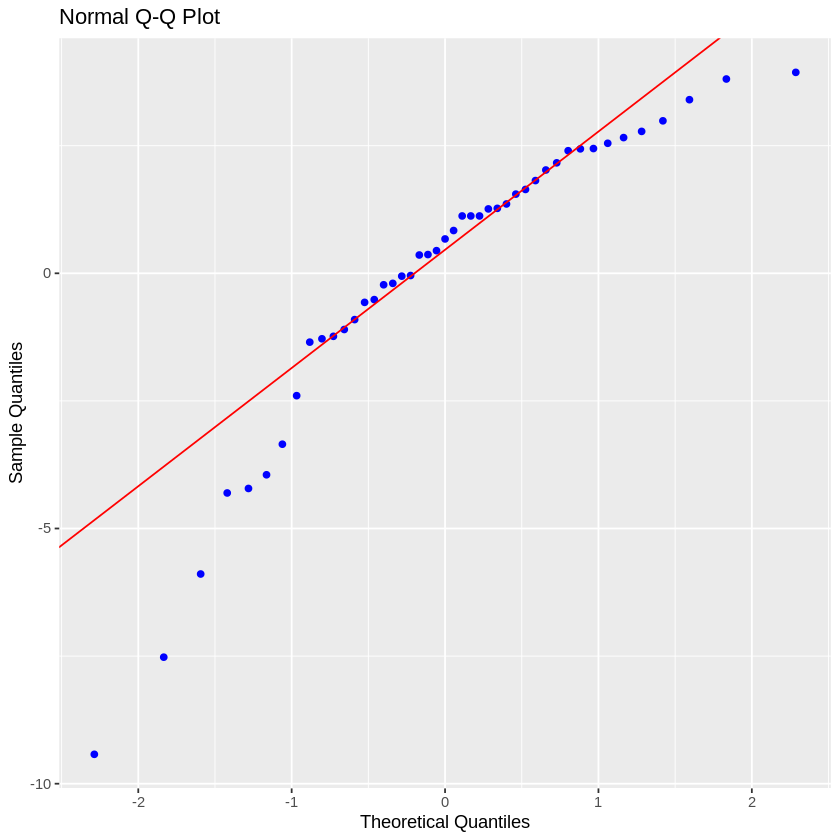


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : gc 
 Variables: m2 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2     df       p    
 -----------------------------------------
  m2               7.2529     1    0.00708 
 -----------------------------------------
  simultaneous     7.2529     1    0.00708 
 -----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


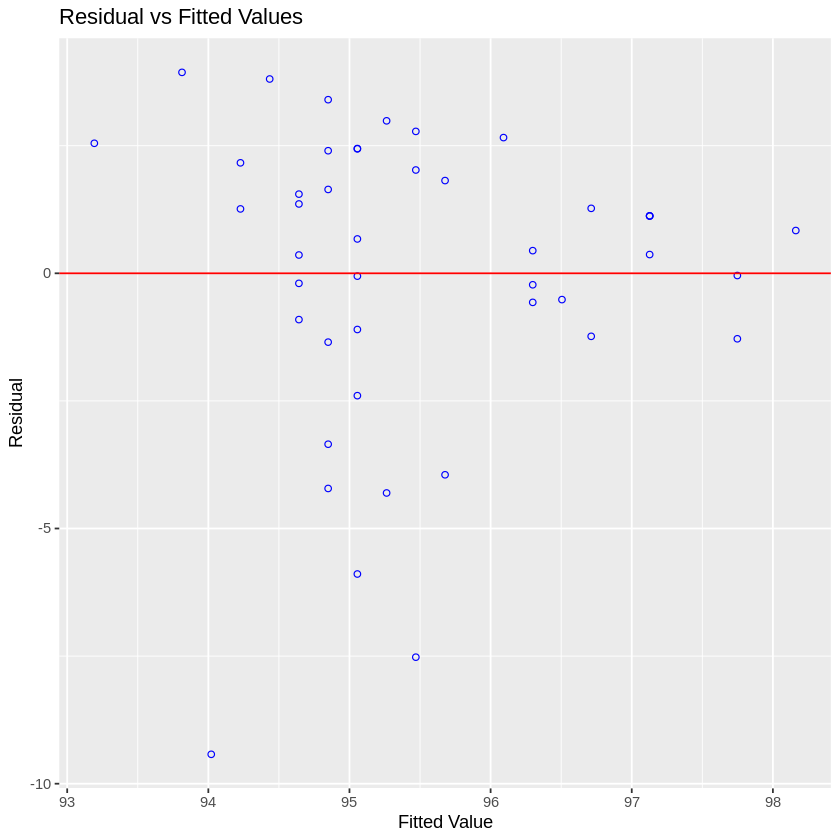

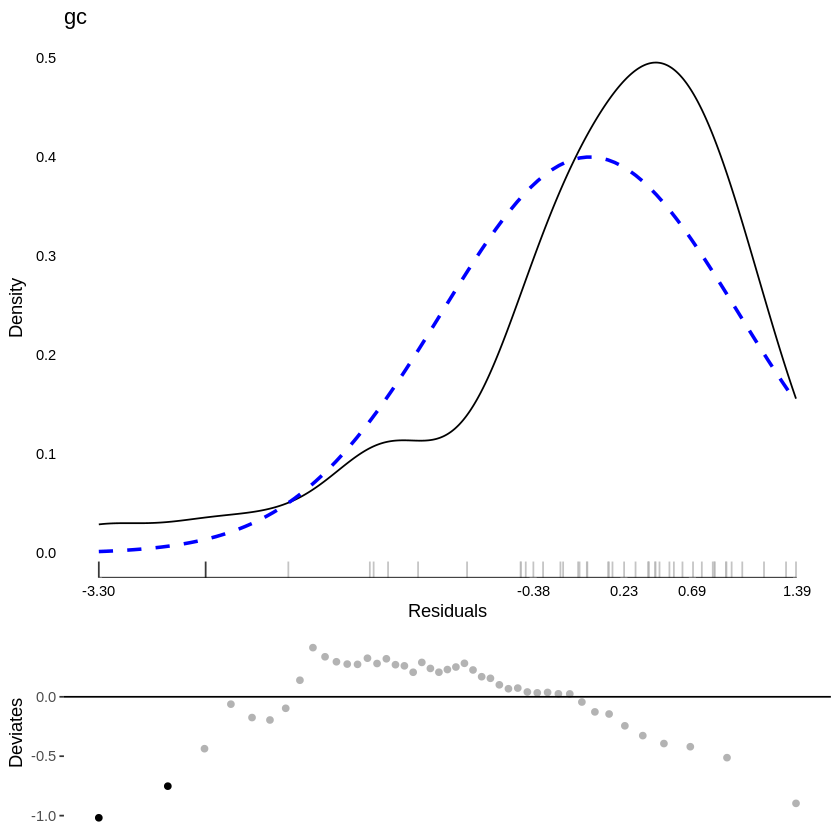

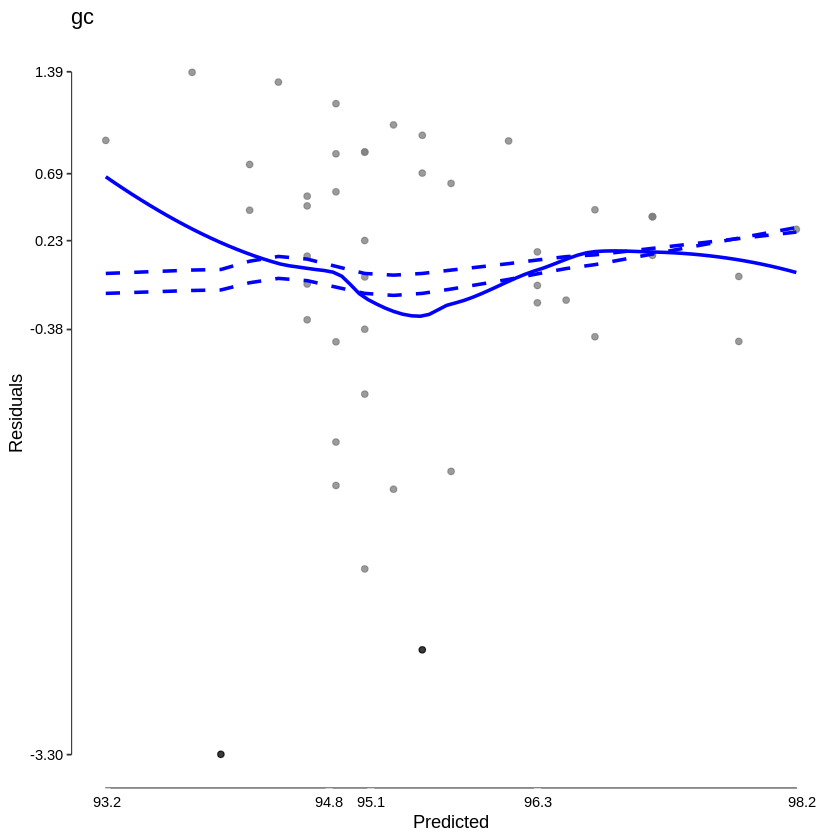

In [38]:
xvar = obt
malt <- lm(gc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### noGo Accuracy 


Call:
lm(formula = ngc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-35.23 -10.70   2.84  11.31  28.70 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   71.244     11.459    6.22  1.8e-07 ***
xvar          -0.267      0.433   -0.62     0.54    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.7 on 43 degrees of freedom
Multiple R-squared:  0.00878,	Adjusted R-squared:  -0.0143 
F-statistic: 0.381 on 1 and 43 DF,  p-value: 0.54


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9684         0.2539 
Kolmogorov-Smirnov        0.1335         0.3987 
Cramer-von Mises          3.7542         0.0000 
Anderson-Darling          0.5203         0.1764 
-----------------------------------------------

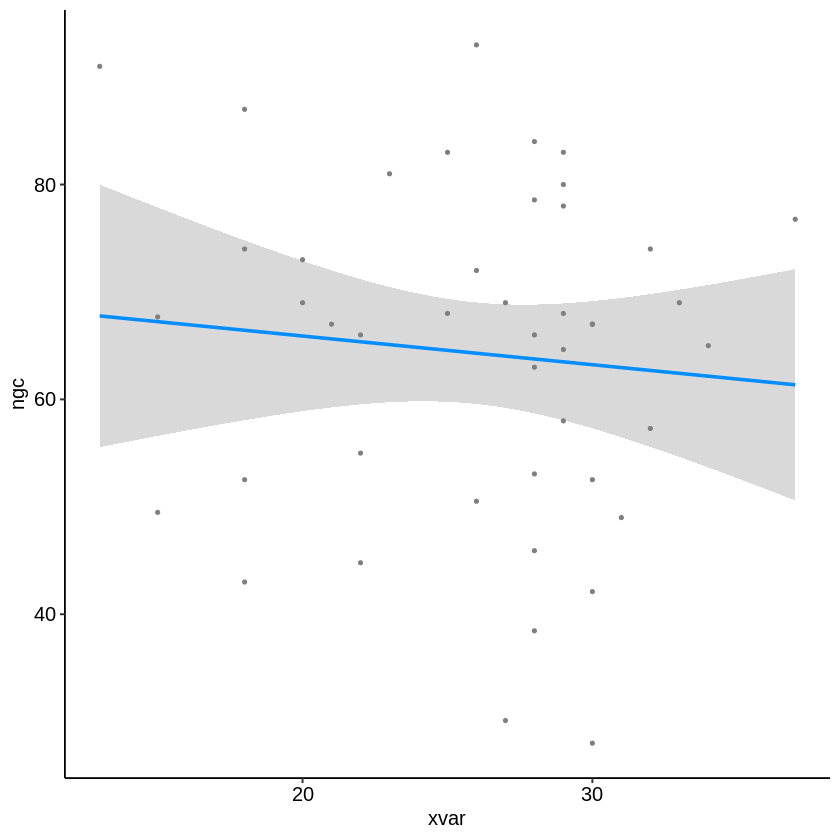

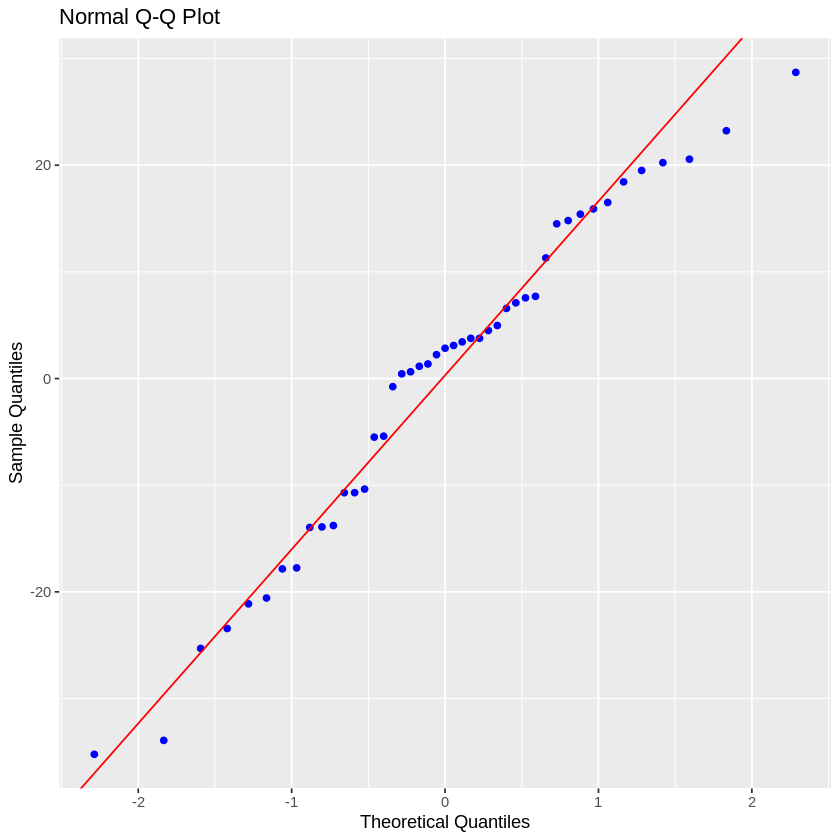


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : ngc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.0776     1    0.7806 
 ----------------------------------------
  simultaneous     0.0776     1    0.7806 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


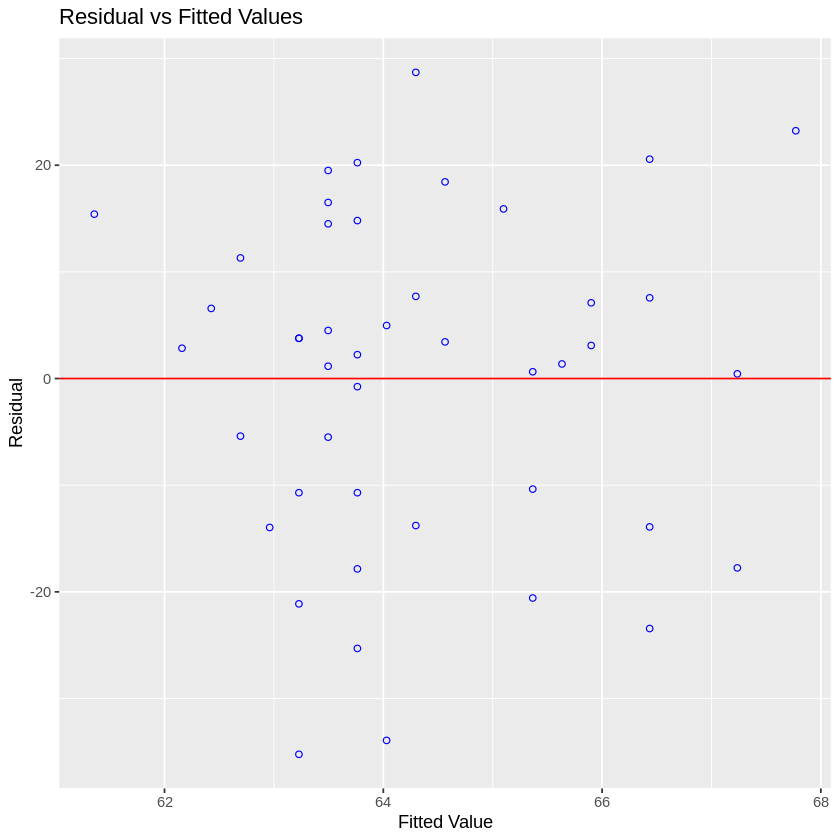

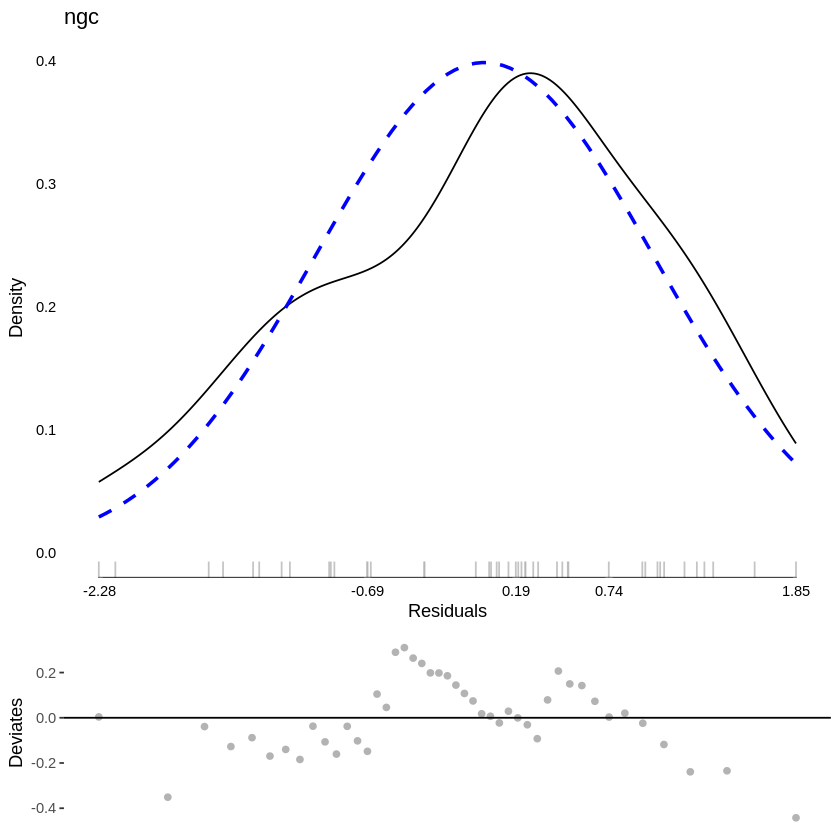

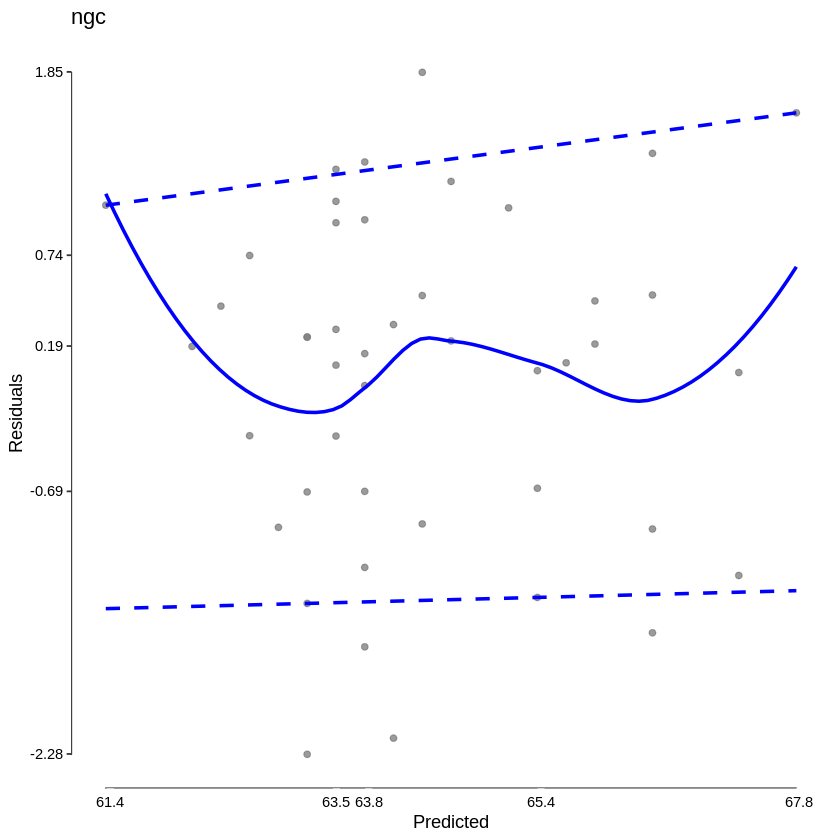

In [39]:
xvar = obt
malt <- lm(ngc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

## Main Findings - Acting with Awareness

### Go Accuracy 


Call:
lm(formula = gc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-9.666 -1.203  0.401  2.390  4.307 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.8777     1.8693   49.69   <2e-16 ***
xvar          0.1065     0.0739    1.44     0.16    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.09 on 43 degrees of freedom
Multiple R-squared:  0.0461,	Adjusted R-squared:  0.0239 
F-statistic: 2.08 on 1 and 43 DF,  p-value: 0.157


Warning message in ks.test.default(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9147         0.0028 
Kolmogorov-Smirnov        0.1412         0.3312 
Cramer-von Mises          2.6579         0.0000 
Anderson-Darling          1.1313         0.0052 
-----------------------------------------------

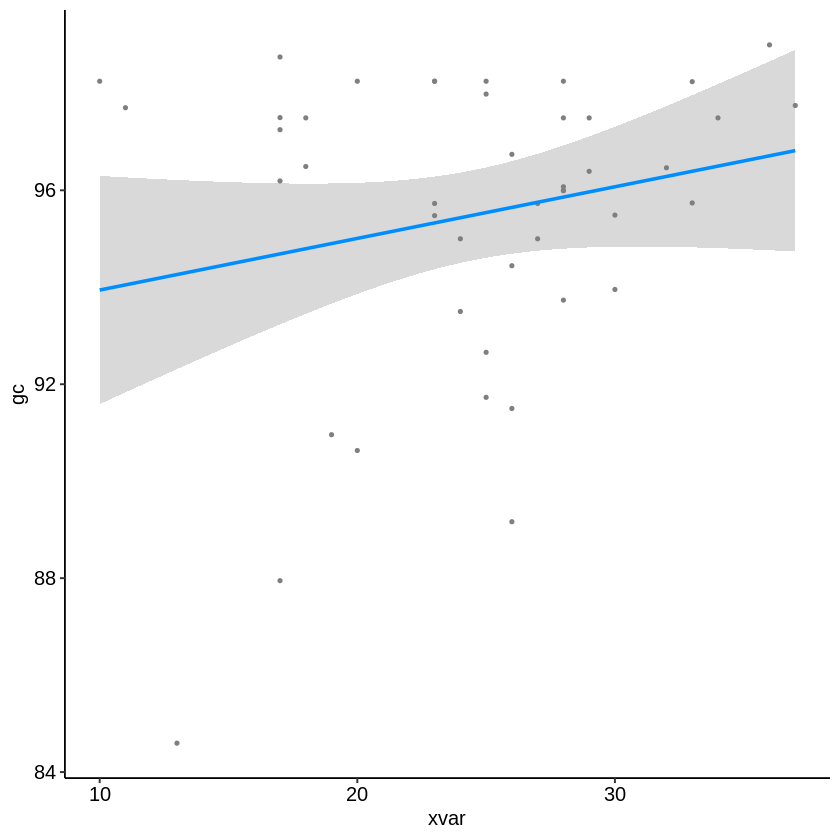

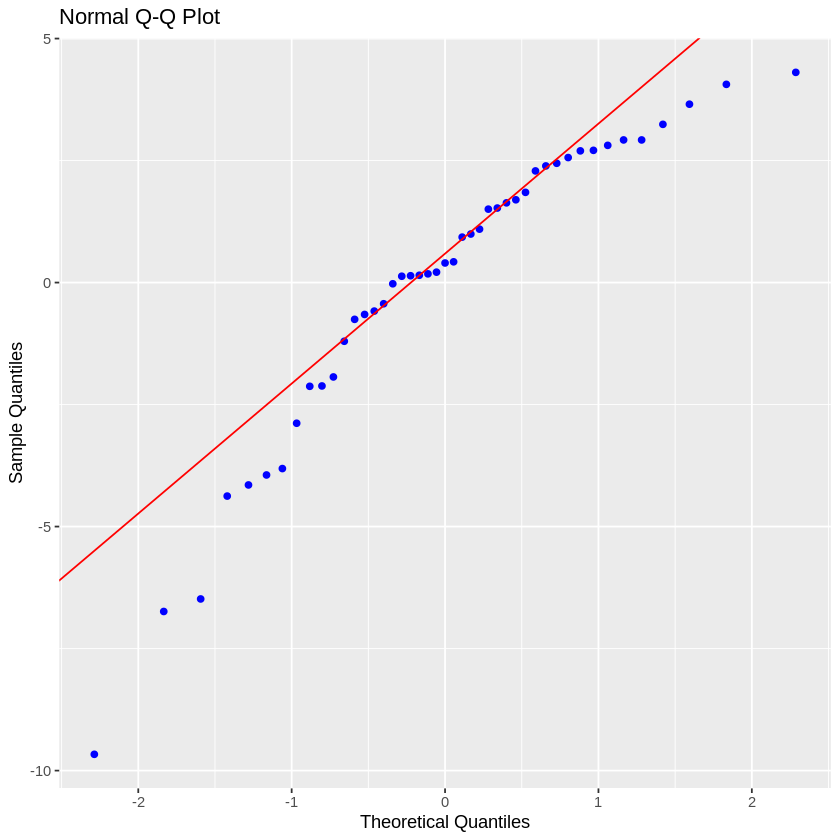


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : gc 
 Variables: m2 

      Test Summary (Bonferroni p values)      
 -------------------------------------------
  Variable          chi2      df       p     
 -------------------------------------------
  m2               15.4932     1    8.28e-05 
 -------------------------------------------
  simultaneous     15.4932     1    8.28e-05 
 -------------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


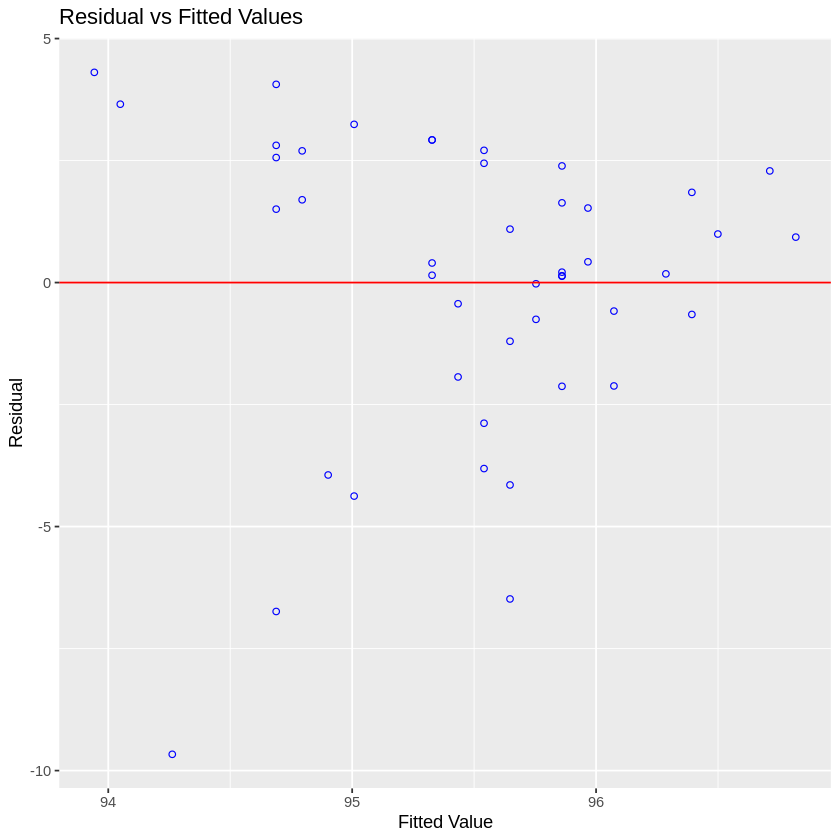

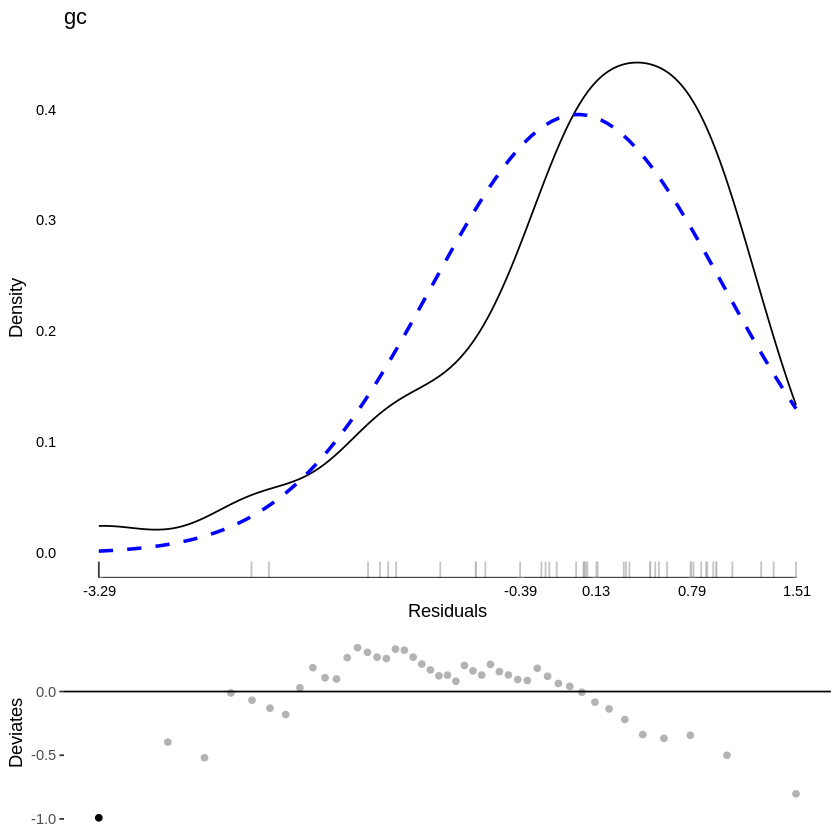

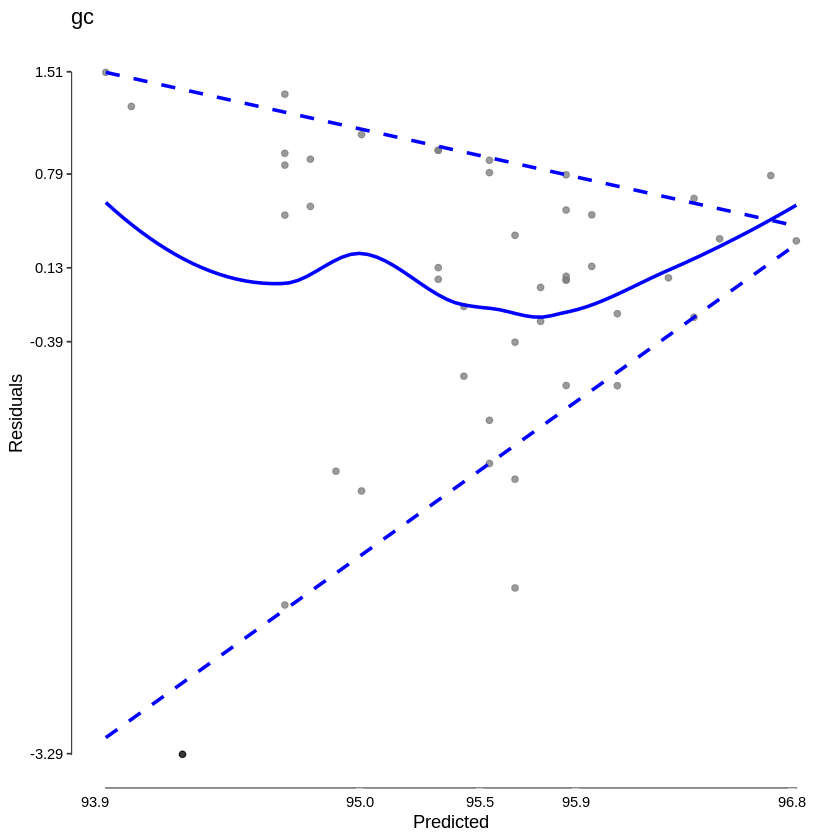

In [40]:
xvar = aat
malt <- lm(gc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### noGo Accuracy 


Call:
lm(formula = ngc ~ xvar)

Residuals:
   Min     1Q Median     3Q    Max 
-35.66 -11.13   2.72  10.72  29.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   68.970      9.521    7.24  5.7e-09 ***
xvar          -0.190      0.376   -0.50     0.62    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.7 on 43 degrees of freedom
Multiple R-squared:  0.00587,	Adjusted R-squared:  -0.0173 
F-statistic: 0.254 on 1 and 43 DF,  p-value: 0.617


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9729         0.3679 
Kolmogorov-Smirnov        0.1321         0.3786 
Cramer-von Mises           4.2           0.0000 
Anderson-Darling          0.4598         0.2498 
-----------------------------------------------

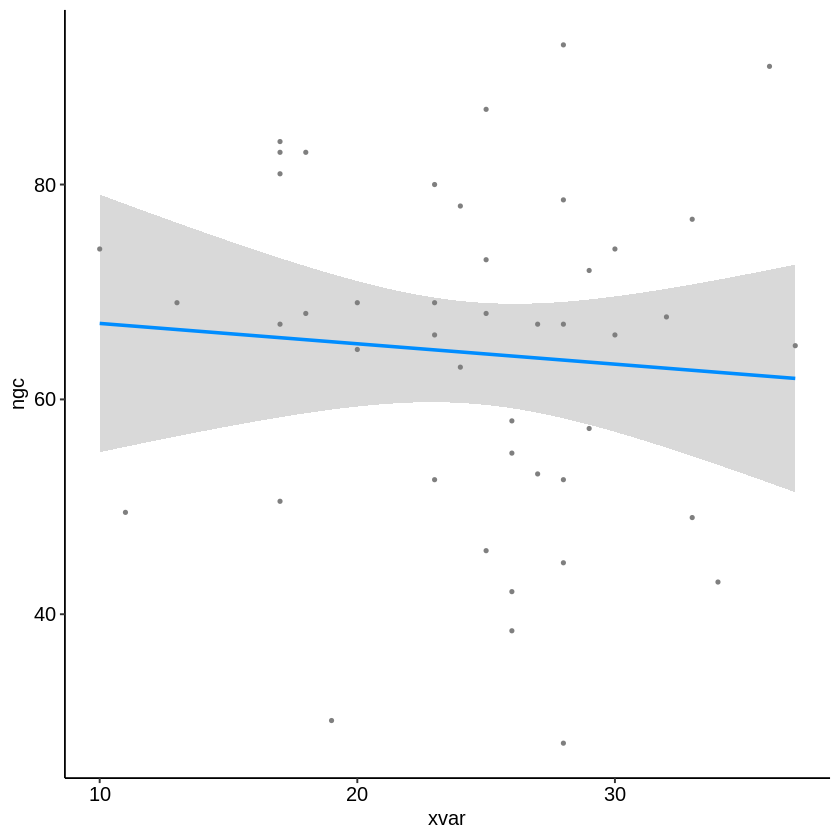

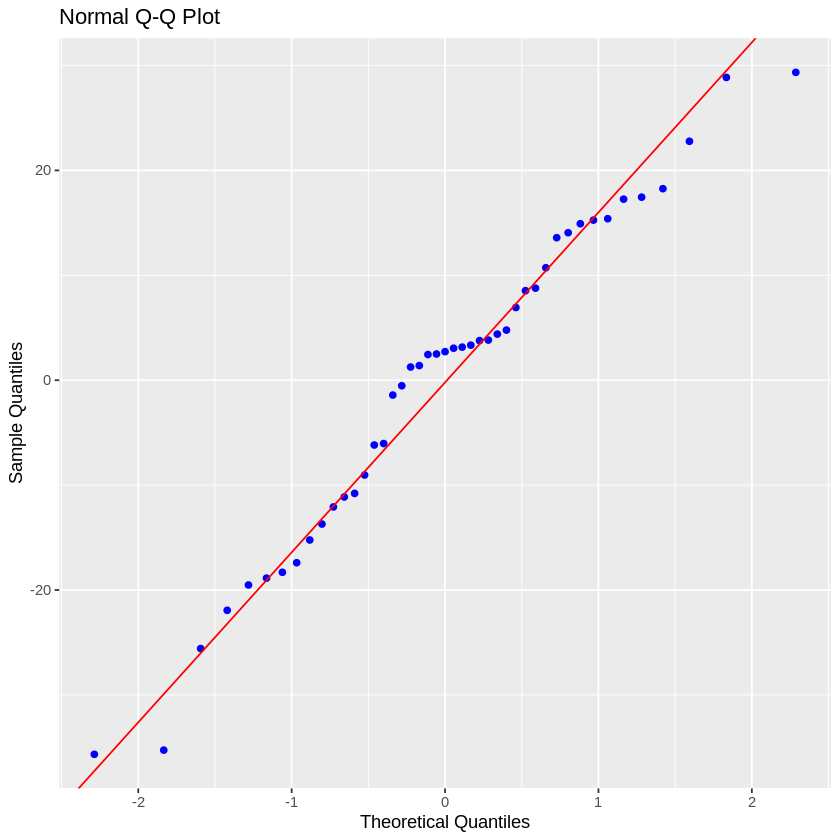


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : ngc 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               0.3062     1    0.5800 
 ----------------------------------------
  simultaneous     0.3062     1    0.5800 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


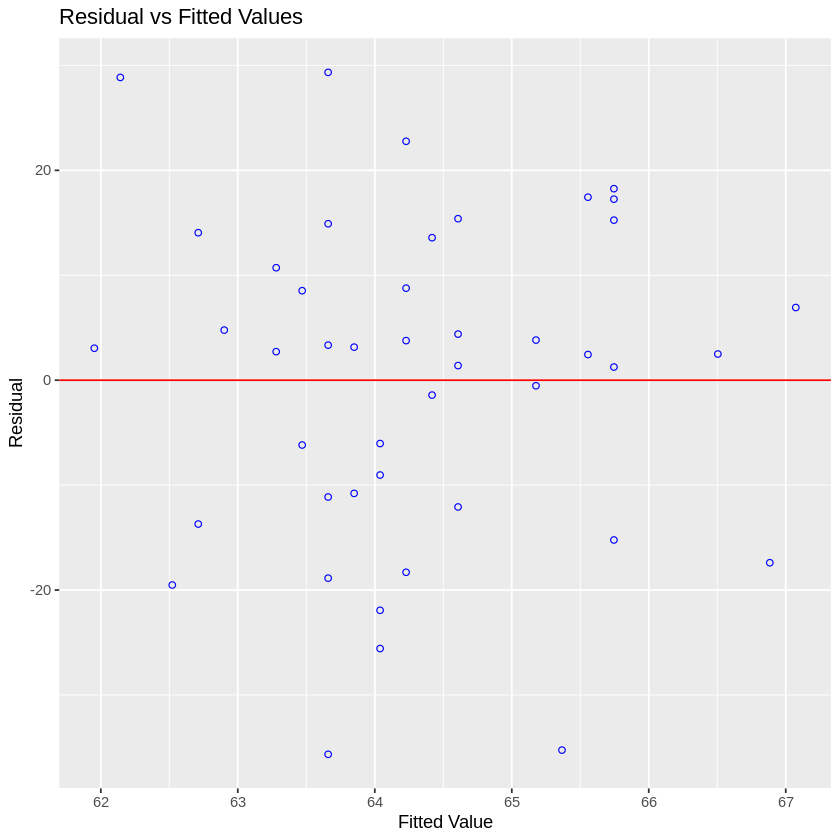

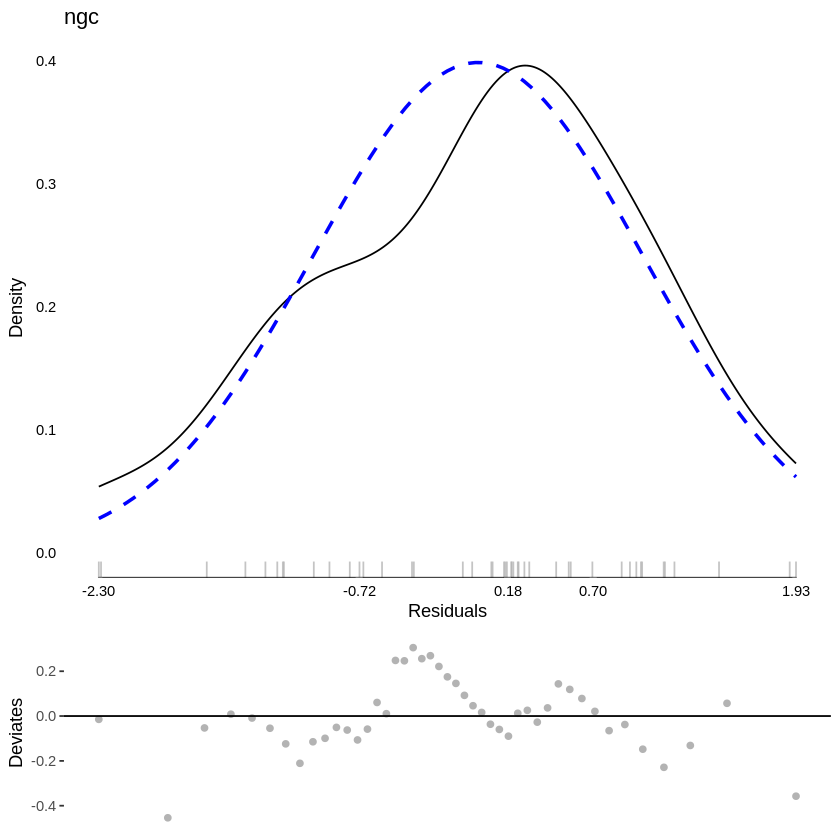

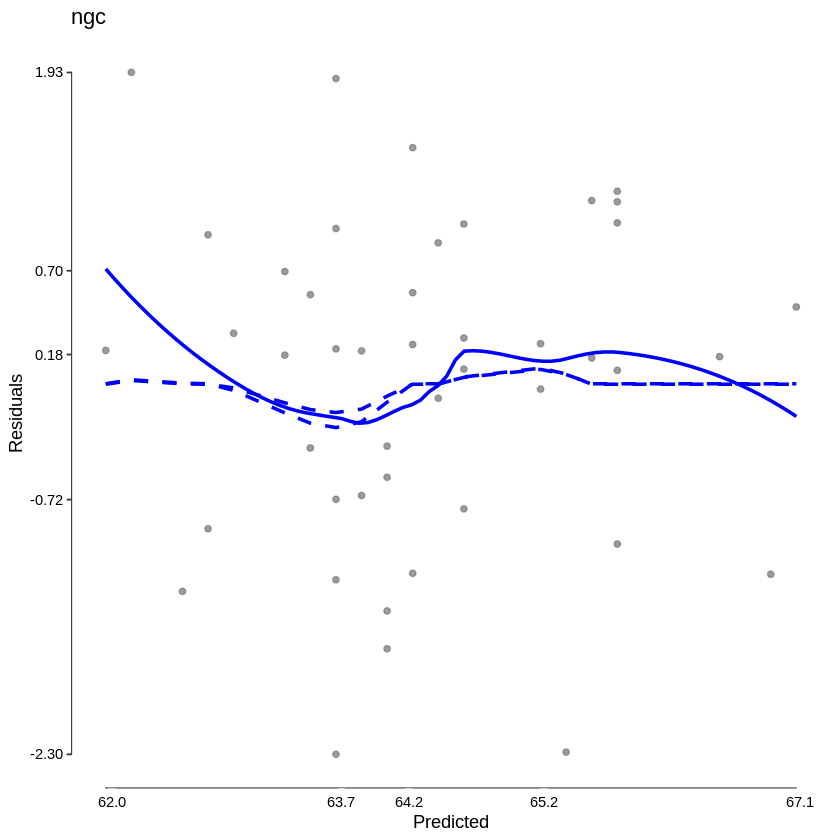

In [41]:
xvar = aat
malt <- lm(ngc ~ xvar)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

# Frac Log Regression

In [42]:
fgc <- gc/100
fngc <- ngc/100

## Controlling for other facets


Call:
glm(formula = fgc ~ obt + aat + dbt + nrt + njt + stai, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.03402    1.33442    0.77   0.4432   
obt         -0.06136    0.02005   -3.06   0.0040 **
aat          0.05653    0.01787    3.16   0.0031 **
dbt          0.01581    0.01456    1.09   0.2842   
nrt          0.00802    0.02801    0.29   0.7761   
njt          0.00508    0.01743    0.29   0.7724   
stai         0.03272    0.01140    2.87   0.0067 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.0135)

    Null deviance: 0.86789  on 44  degrees of freedom
Residual deviance: 0.49050  on 38  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


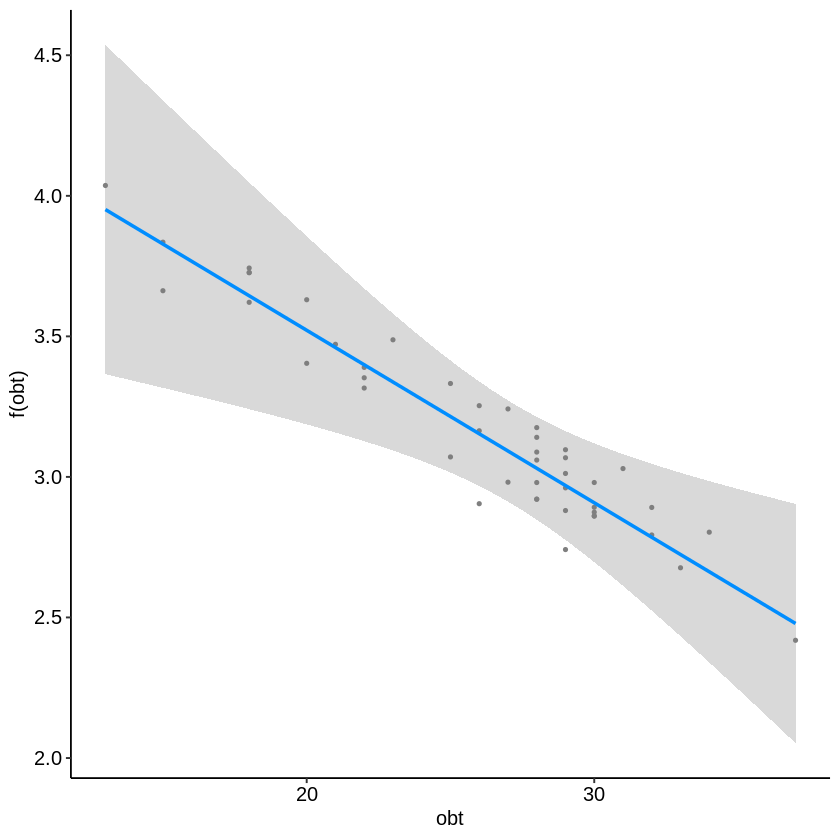

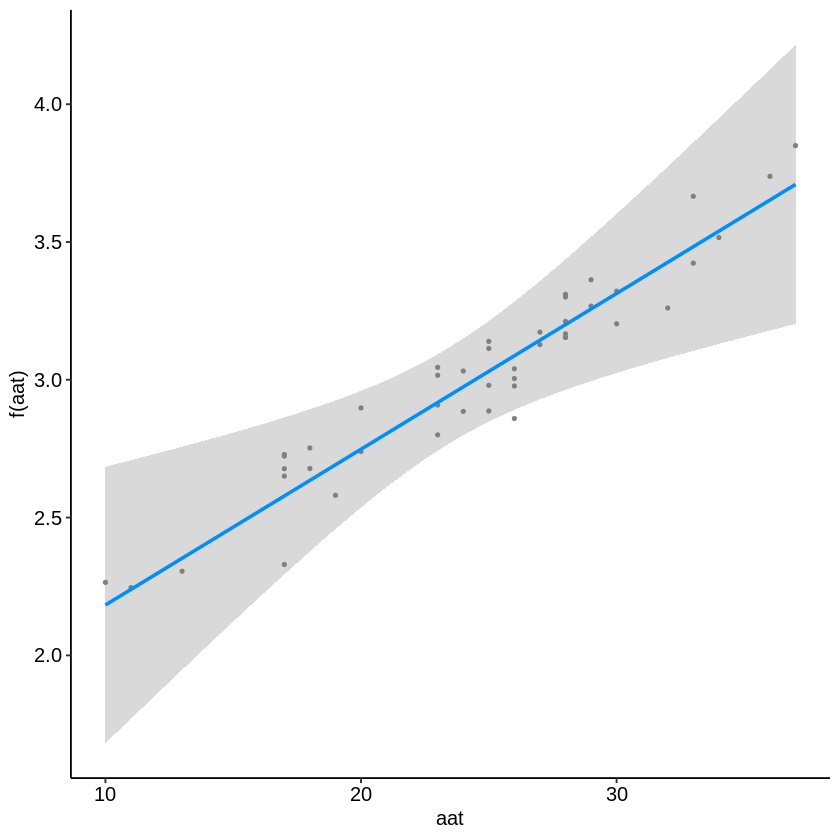

In [43]:
frac_malt <- glm(fgc ~ obt + aat + dbt + nrt + njt + stai, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()
visreg(frac_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()

## Main Findings - Obt


Call:
glm(formula = fgc ~ obt, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4365     0.5458    8.13  3.1e-10 ***
obt          -0.0521     0.0197   -2.64    0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.0187)

    Null deviance: 0.86789  on 44  degrees of freedom
Residual deviance: 0.72979  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


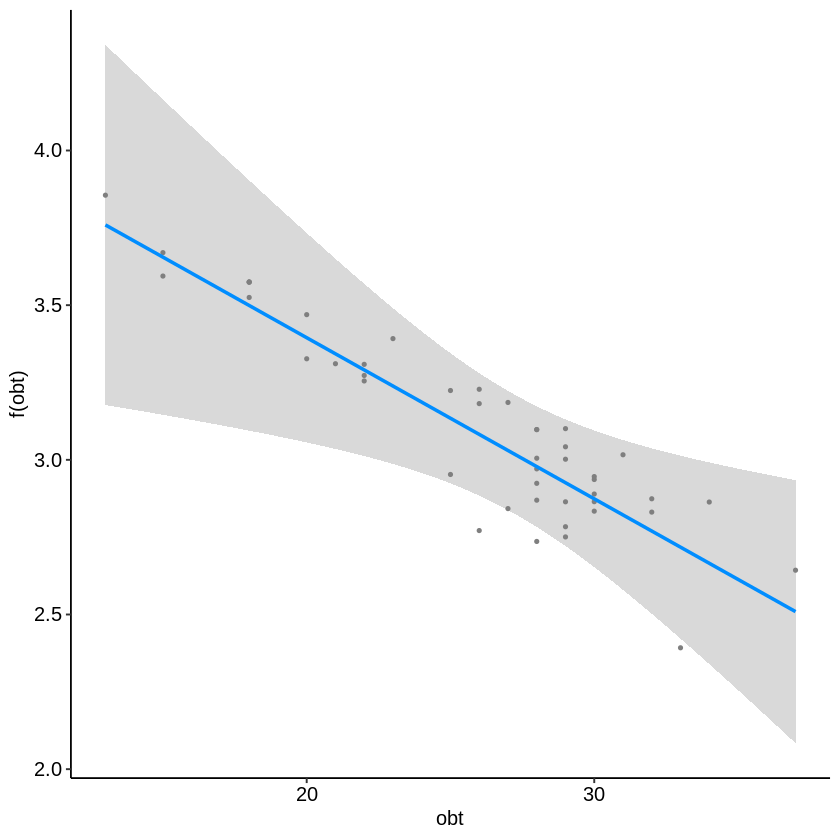

In [44]:
frac_malt <- glm(fgc ~ obt, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

In [45]:
plogis(4.4365 - -0.0521) - plogis(4.4365)

# One unit increase in observation leads to a 0.05% decrease in proportion of Go correct

[1] 0.000587


Call:
glm(formula = fngc ~ obt, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.8934     0.5049    1.77    0.084 .
obt          -0.0117     0.0190   -0.62    0.541  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.108)

    Null deviance: 4.8594  on 44  degrees of freedom
Residual deviance: 4.8182  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 3


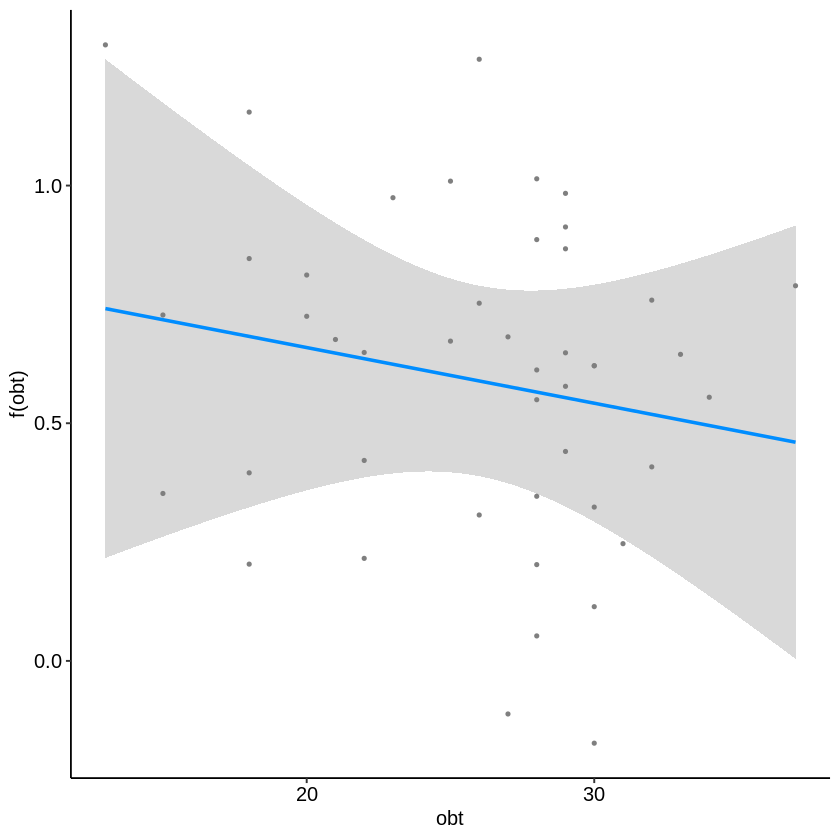

In [46]:
frac_malt <- glm(fngc ~ obt, family = quasibinomial())

summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

## Main Findings - Aat


Call:
glm(formula = fgc ~ aat, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4681     0.3953    6.24  1.6e-07 ***
aat           0.0243     0.0162    1.50     0.14    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.0203)

    Null deviance: 0.86789  on 44  degrees of freedom
Residual deviance: 0.82246  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


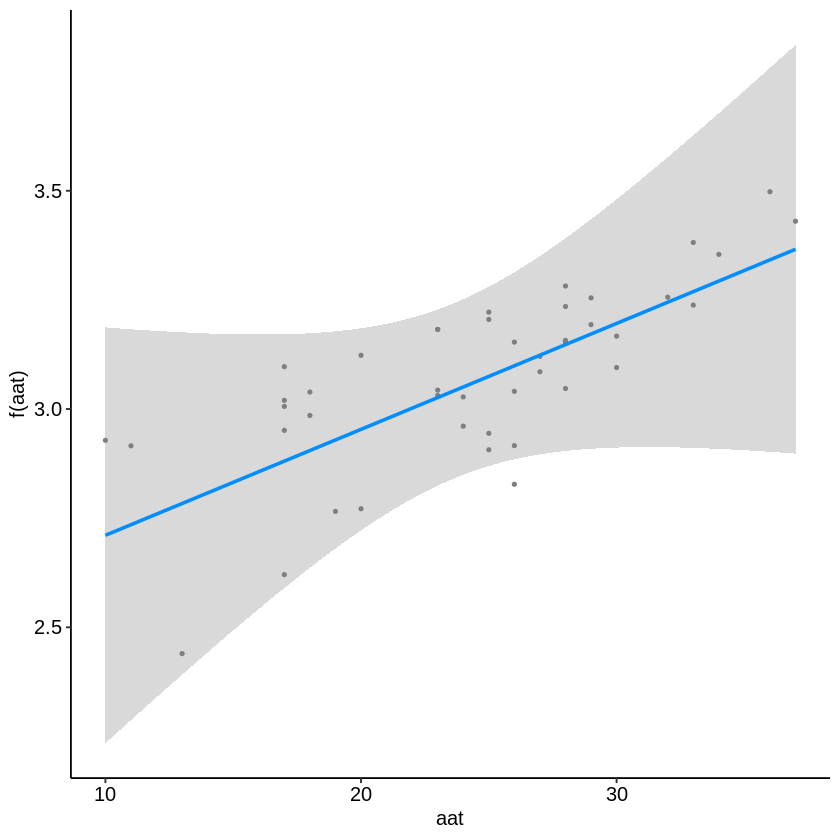

In [47]:
frac_malt <- glm(fgc ~ aat, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()


Call:
glm(formula = fngc ~ obt, family = quasibinomial())

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.8934     0.5049    1.77    0.084 .
obt          -0.0117     0.0190   -0.62    0.541  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.108)

    Null deviance: 4.8594  on 44  degrees of freedom
Residual deviance: 4.8182  on 43  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 3


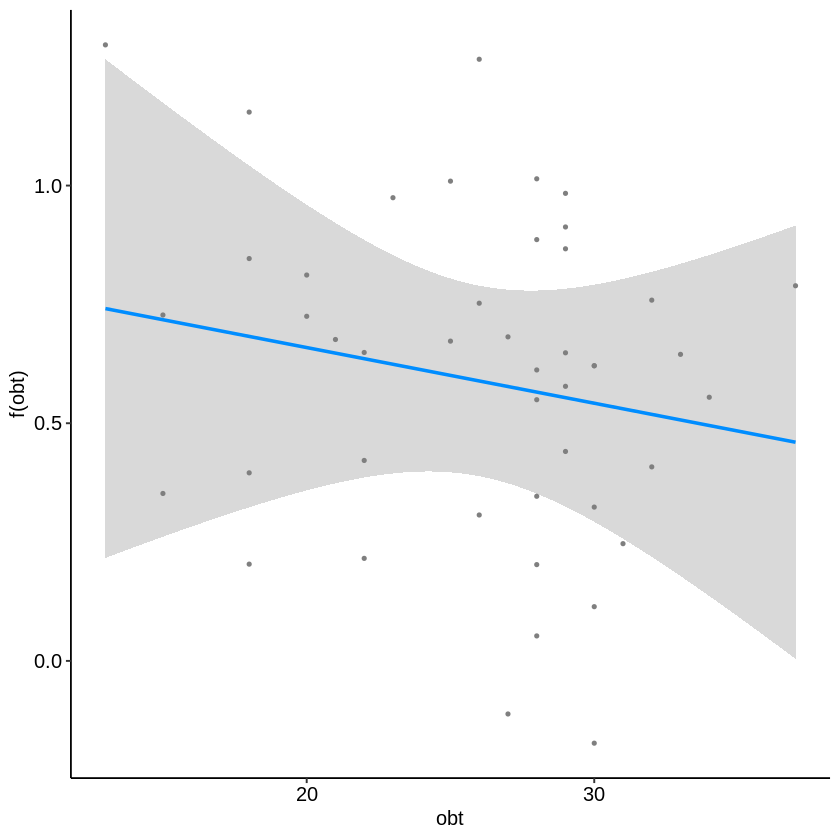

In [48]:
frac_malt <- glm(fngc ~ obt, family = quasibinomial())
summary(frac_malt)
visreg(frac_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

# Beta Regression

## Controlling for other facets


Call:
betareg(formula = fgc ~ obt + aat + dbt + nrt + njt + stai, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.515 -0.759 -0.155  0.864  2.112 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.69953    1.12113    0.62  0.53266    
obt         -0.05579    0.01653   -3.37  0.00074 ***
aat          0.05393    0.01520    3.55  0.00039 ***
dbt          0.01481    0.01238    1.20  0.23162    
nrt          0.00587    0.02326    0.25  0.80073    
njt          0.01459    0.01510    0.97  0.33382    
stai         0.03506    0.00963    3.64  0.00027 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     91.7       19.7    4.65  3.3e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:  114 on 8 Df
Pseudo R-squared: 0.311
Number of iterations: 33 (

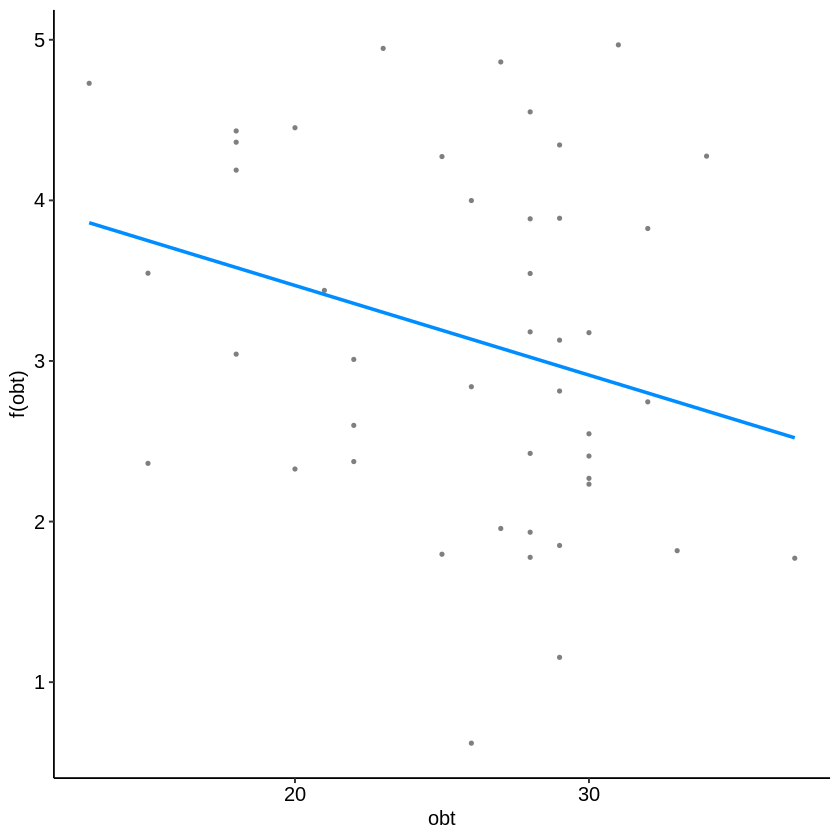

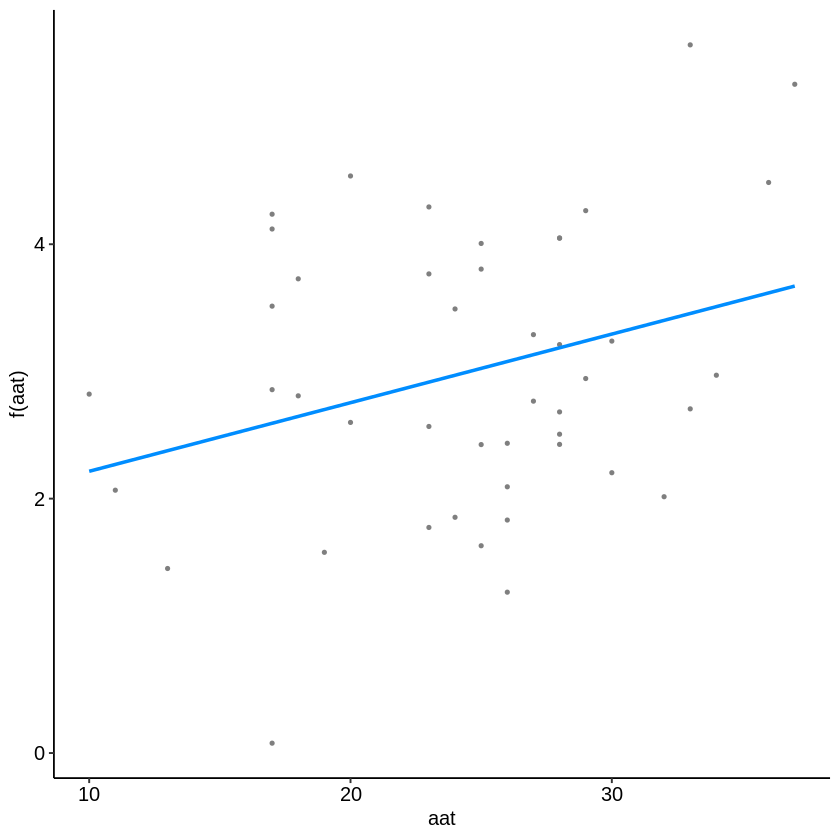

In [49]:
beta_malt <- betareg(fgc ~ obt + aat + dbt + nrt + njt + stai, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()
visreg(beta_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()

## Main Findings - Obt


Call:
betareg(formula = fgc ~ obt, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.210 -0.592  0.042  0.641  1.737 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.0920     0.4393    9.31   <2e-16 ***
obt          -0.0395     0.0160   -2.47    0.014 *  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     64.1       13.8    4.63  3.7e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:  107 on 3 Df
Pseudo R-squared: 0.184
Number of iterations: 29 (BFGS) + 4 (Fisher scoring) 

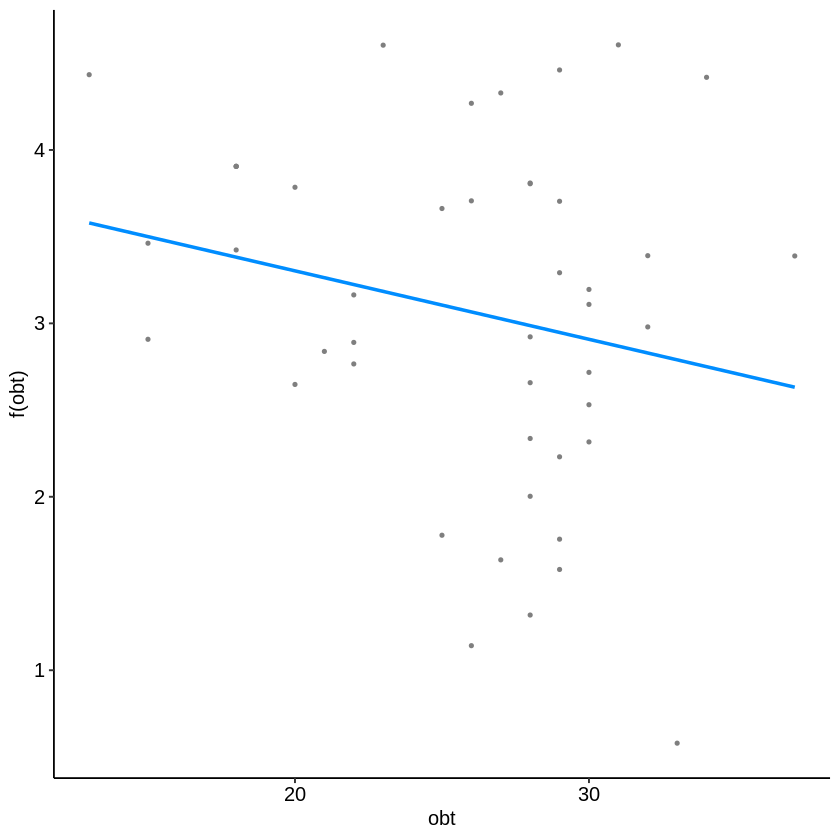

In [50]:
beta_malt <- betareg(fgc ~ obt, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

In [51]:
plogis(4.0920 + -0.0395) - plogis(4.0920)

#One unit increase in observation leads to a 0.06% decrease in proportion of correct Gos

[1] -0.000651


Call:
betareg(formula = fngc ~ obt, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.111 -0.715  0.046  0.674  2.592 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.9809     0.4829    2.03    0.042 *
obt          -0.0151     0.0182   -0.83    0.406  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     8.87       1.78    4.97  6.5e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:   22 on 3 Df
Pseudo R-squared: 0.0164
Number of iterations: 13 (BFGS) + 2 (Fisher scoring) 

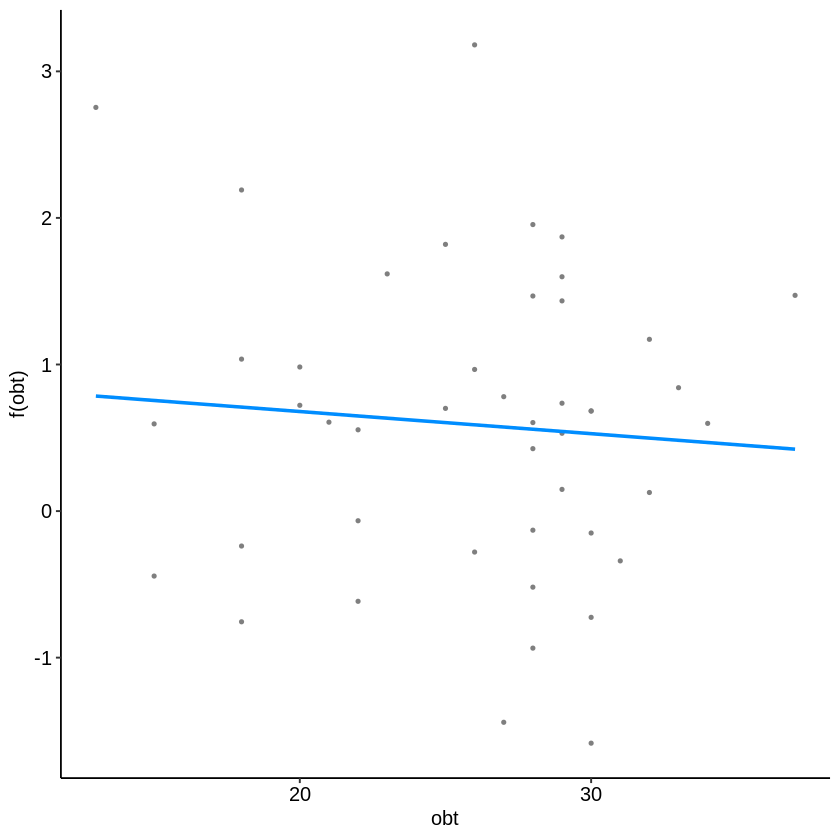

In [52]:
beta_malt <- betareg(fngc ~ obt, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

## Main Findings - Aat


Call:
betareg(formula = fgc ~ aat | obt, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.368 -0.575 -0.094  0.806  1.822 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.7064     0.3504    7.72  1.1e-14 ***
aat           0.0125     0.0139    0.90     0.37    

Phi coefficients (precision model with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.2253     0.9646    3.34  0.00083 ***
obt           0.0297     0.0364    0.82  0.41493    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:  104 on 4 Df
Pseudo R-squared: 0.0166
Number of iterations: 9 (BFGS) + 2 (Fisher scoring) 

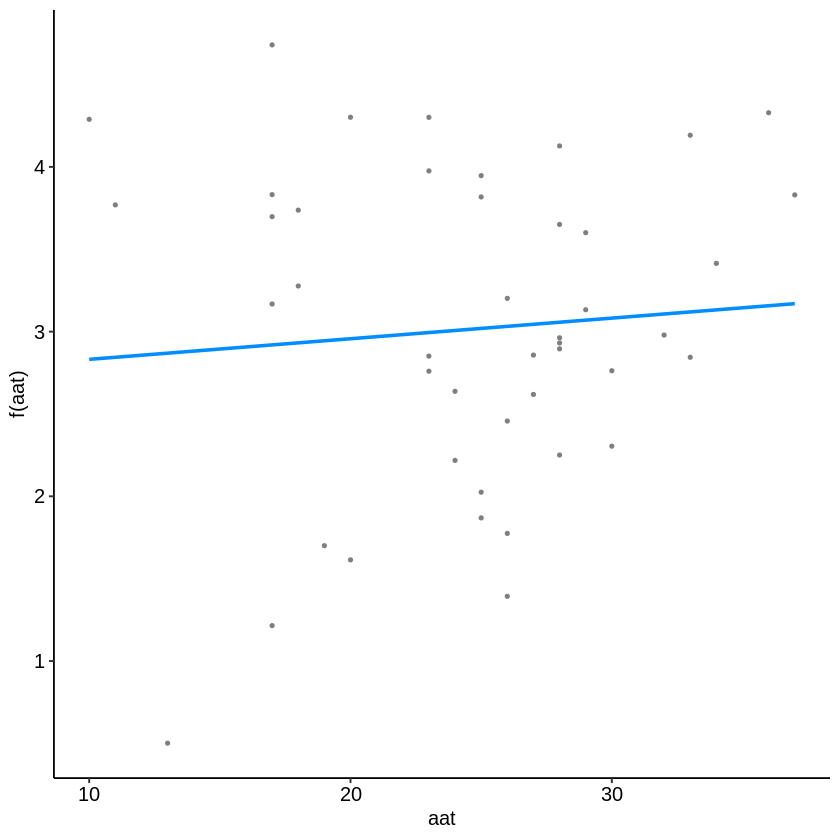

In [53]:
beta_malt <- betareg(fgc ~ aat | obt, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()


Call:
betareg(formula = fngc ~ obt | obt, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.248 -0.731  0.062  0.706  2.610 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.8696     0.5101    1.70    0.088 .
obt          -0.0109     0.0188   -0.58    0.563  

Phi coefficients (precision model with log link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   1.5713     0.9785    1.61     0.11
obt           0.0239     0.0370    0.64     0.52
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood: 22.2 on 4 Df
Pseudo R-squared: 0.0164
Number of iterations: 10 (BFGS) + 4 (Fisher scoring) 

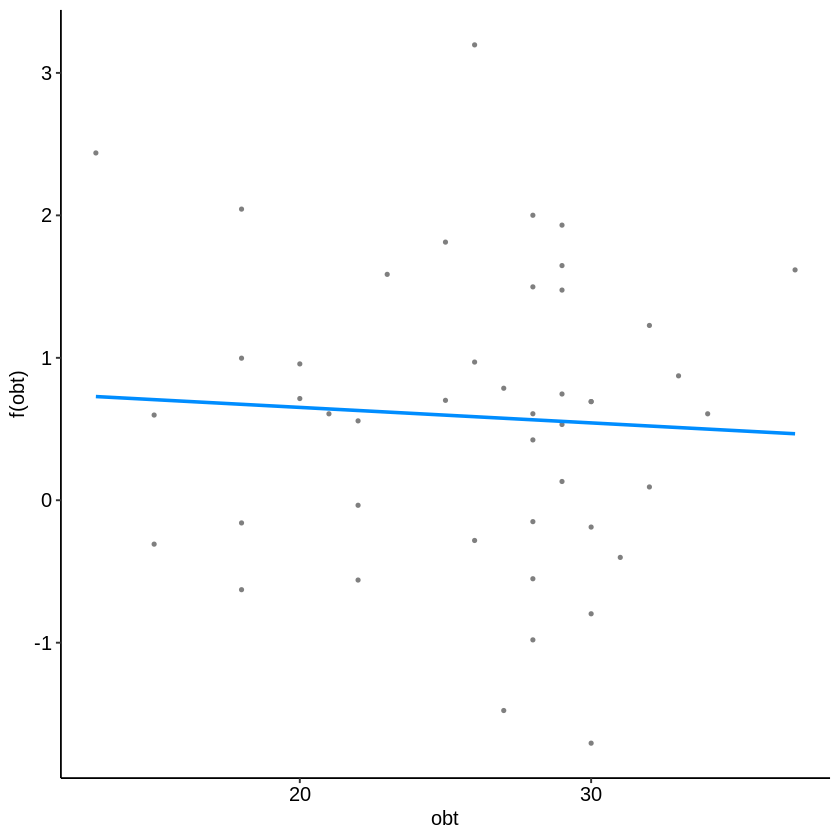

In [54]:
beta_malt <- betareg(fngc ~ obt | obt, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

# Bayesian Beta Reg

In [55]:
df <- data.frame(fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai)

## Main - Control

In [84]:
priors <-
  c(
    set_prior("normal(0, 10)", class = "b"), 
    set_prior("normal(0, 10)", class = "Intercept")
  )

bayes_malt_h1<-brm(formula = fgc~obt + aat + dbt + nrt + njt + stai, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.71      1.26    -1.76     3.17 1.00    25758    22712
obt          -0.05      0.02    -0.09    -0.02 1.00    27783    24708
aat           0.05      0.02     0.02     0.09 1.00    26872    23804
dbt           0.01      0.01    -0.01     0.04 1.00    31486    22541
nrt           0.01      0.03    -0.05     0.06 1.00    26872    23652
njt           0.01      0.02    -0.02     0.05 1.00    27694    22621
stai          0.03      0.01     0.01     0.06 1.00    24163    22325

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    77.33     17.49    47.11   115.16 1.00    24928    23203


In [85]:
bayes_malt_null_obt <- brm(formula = fgc~ aat + dbt + nrt + njt + stai, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_null_obt)

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.14      1.38    -2.52     2.86 1.00    23827    21432
aat           0.05      0.02     0.01     0.09 1.00    27396    22964
dbt           0.01      0.02    -0.03     0.04 1.00    30072    21679
nrt          -0.02      0.02    -0.07     0.02 1.00    30700    23734
njt           0.03      0.02    -0.01     0.07 1.00    26564    22731
stai          0.03      0.01     0.01     0.06 1.00    23665    20763

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    61.36     13.70    37.59    90.79 1.00    26121    22266

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and T

In [86]:
bayes_malt_null_aat <- brm(formula = fgc~ obt + dbt + nrt + njt + stai, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_null_aat)

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.78      1.33    -0.84     4.39 1.00    19841    20411
obt          -0.05      0.02    -0.09    -0.01 1.00    23754    22930
dbt           0.02      0.01    -0.01     0.05 1.00    26177    22424
nrt           0.02      0.03    -0.04     0.08 1.00    23236    22016
njt           0.02      0.02    -0.01     0.06 1.00    21160    21621
stai          0.02      0.01    -0.00     0.05 1.00    18667    20299

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    63.63     14.33    38.76    94.57 1.00    23985    21478

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and T

In [87]:
# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1

for_obt <- bayes_factor(bayes_malt_h1, bayes_malt_null_obt)
for_aat <- bayes_factor(bayes_malt_h1, bayes_malt_null_aat)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [89]:
for_obt
for_aat

Estimated Bayes factor in favor of bayes_malt_h1 over bayes_malt_null_obt: 0.18320

Estimated Bayes factor in favor of bayes_malt_h1 over bayes_malt_null_aat: 0.09527

## Main - Obt

### Go

In [73]:
priors <-
  c( 
    set_prior("normal(0, 10)", class = "Intercept")
  )

bayes_malt_null<-brm(formula = fgc~1, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_null)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ 1 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     3.04      0.10     2.84     3.23 1.00    16727    16356

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    52.54     11.50    32.28    77.36 1.00    15667    16583

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [74]:
priors <-
  c(
    set_prior("normal(0, 10)", class = "b"), 
    set_prior("normal(0, 10)", class = "Intercept")
  )

bayes_malt_h1 <-brm(formula = fgc~obt, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ obt 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     4.09      0.44     3.25     4.96 1.00    21058    19849
obt          -0.04      0.02    -0.07    -0.01 1.00    22287    20701

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    60.05     13.15    37.07    88.32 1.00    20838    19218

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [75]:
# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1

bayes_factor(bayes_malt_h1, bayes_malt_null)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


Estimated Bayes factor in favor of bayes_malt_h1 over bayes_malt_null: 0.03782

### No Go

In [60]:
priors <-
  c(
    set_prior("normal(0, 10)", class = "b"), 
    set_prior("normal(0, 10)", class = "Intercept")
  )

bayes_malt<-brm(formula = fngc~obt, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234)

summary(bayes_malt)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ obt 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.99      0.50     0.02     1.97 1.00    27074    22779
obt          -0.02      0.02    -0.05     0.02 1.00    27672    23109

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi     8.57      1.75     5.49    12.32 1.00    27606    22116

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [61]:
# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1

bobt <- hypothesis(bayes_malt, hypothesis = "obt = 0")

1/bobt$hypothesis$Evid.Ratio

[1] 0.00257

## Main - Aat

### Go

In [80]:
priors <-
  c(
    set_prior("normal(0, 10)", class = "Intercept")
  )

bayes_malt_null <-brm(formula = fgc~1, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_null)

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ 1 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     3.04      0.10     2.84     3.23 1.00    16727    16356

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    52.54     11.50    32.28    77.36 1.00    15667    16583

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [78]:
priors <-
  c(
    set_prior("normal(0, 10)", class = "b"), 
    set_prior("normal(0, 10)", class = "Intercept")
  )

bayes_malt_h1 <-brm(formula = fgc~aat, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ aat 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     2.82      0.34     2.16     3.51 1.00    23109    20828
aat           0.01      0.01    -0.02     0.04 1.00    23494    21435

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    52.39     11.53    32.24    77.26 1.00    21479    19770

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [81]:
# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1

bayes_factor(bayes_malt_h1, bayes_malt_null)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


Estimated Bayes factor in favor of bayes_malt_h1 over bayes_malt_null: 0.00171

### No Go

In [64]:
priors <-
  c(
    set_prior("normal(0, 10)", class = "b"), 
    set_prior("normal(0, 10)", class = "Intercept")
  )

bayes_malt<-brm(formula = fngc~aat, 
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234)

summary(bayes_malt)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ aat 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.71      0.42    -0.11     1.52 1.00    28276    22245
aat          -0.00      0.02    -0.04     0.03 1.00    28340    22532

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi     8.46      1.73     5.47    12.19 1.00    27949    23444

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [65]:
# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1

baat <- hypothesis(bayes_malt, hypothesis = "aat = 0")

1/baat$hypothesis$Evid.Ratio

[1] 0.00172

# Test


Call:
lm(formula = y ~ xgc)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.51  -2.77  -1.10   2.09  11.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.9862     5.0122    4.59  0.00036 ***
xgc          -0.0847     0.0757   -1.12  0.28065    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.93 on 15 degrees of freedom
Multiple R-squared:  0.0771,	Adjusted R-squared:  0.0155 
F-statistic: 1.25 on 1 and 15 DF,  p-value: 0.281


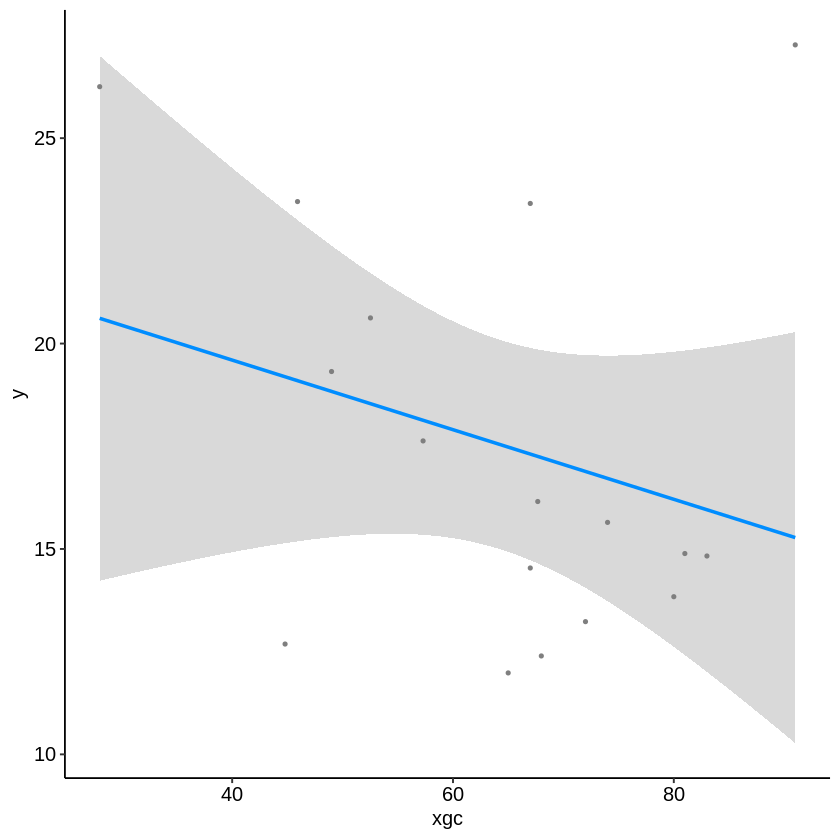

In [66]:
xgc <- ngc[1:20]
xgc <- xgc[-c (6, 13, 15)]

y <- c(14.889, 13.231, 23.41, 11.983, 13.838, 12.686, 12.396, 20.624, 15.647, 14.537, 27.27, 19.319, 26.252, 16.155, 14.829, 17.63, 23.456)

malt <- lm(y ~ xgc)

summary(malt)
visreg(malt, xvar = "xgc", overlay = TRUE, gg = TRUE) + theme_pubr()


Call:
lm(formula = gc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-4.911 -1.288 -0.008  1.801  3.452 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.80915    5.66668   14.26  < 2e-16 ***
xvar         0.20615    0.08000    2.58  0.01409 *  
obt         -0.20465    0.07442   -2.75  0.00917 ** 
dbt          0.10937    0.06379    1.71  0.09480 .  
nrt         -0.00256    0.10938   -0.02  0.98146    
njt          0.15360    0.08271    1.86  0.07129 .  
stai         0.18349    0.04987    3.68  0.00074 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.36 on 37 degrees of freedom
Multiple R-squared:  0.445,	Adjusted R-squared:  0.355 
F-statistic: 4.95 on 6 and 37 DF,  p-value: 0.000832


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9527         0.0692 
Kolmogorov-Smirnov        0.1337         0.3779 
Cramer-von Mises          3.1467         0.0000 
Anderson-Darling          0.6277         0.0956 
-----------------------------------------------

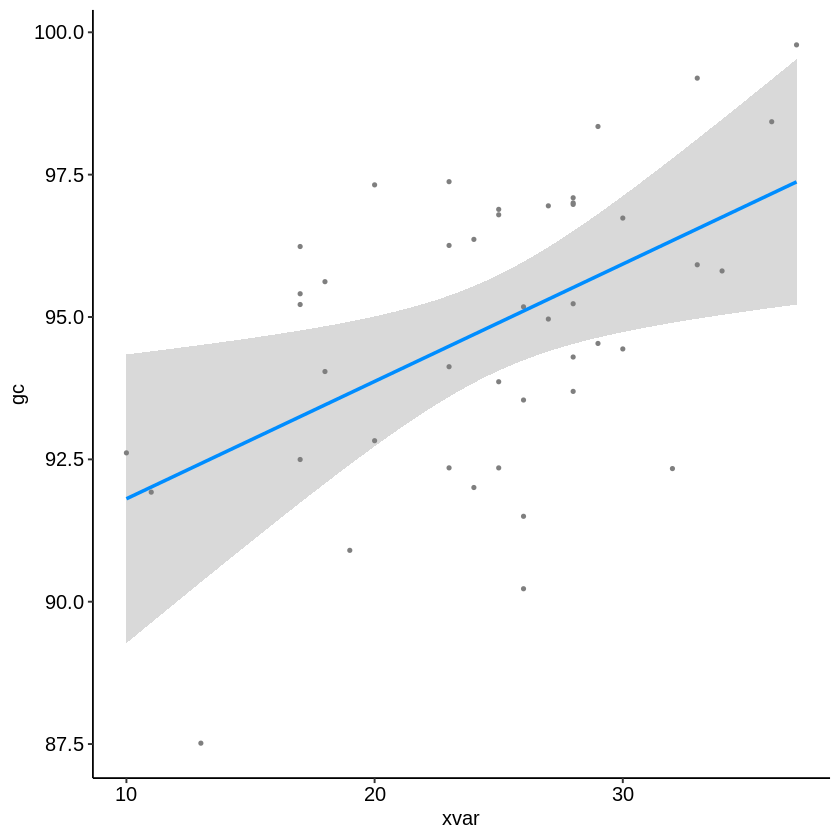

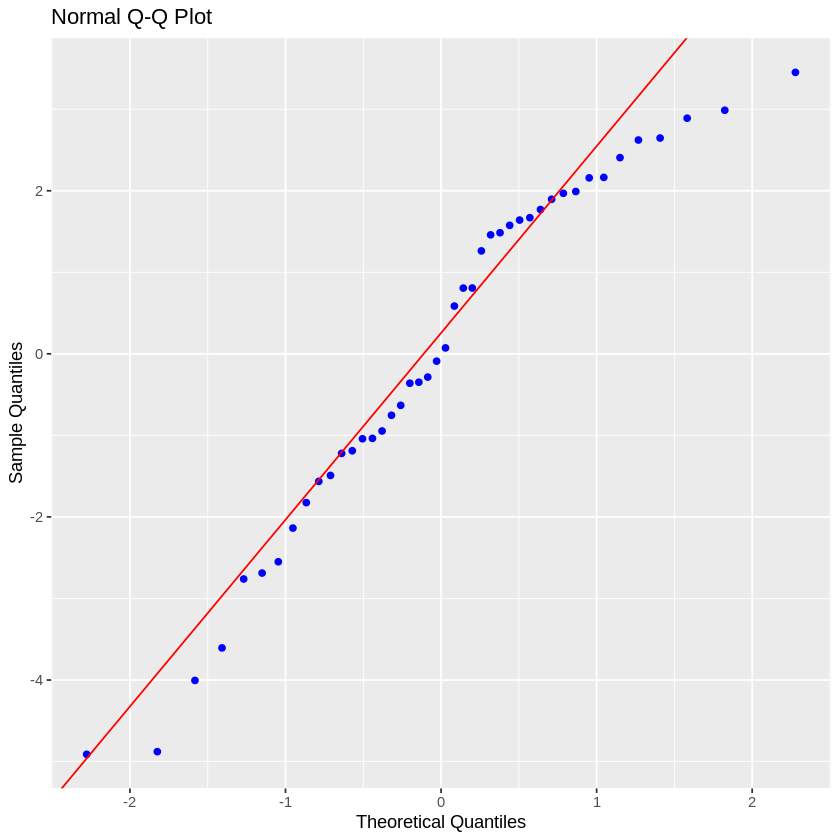


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : gc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  xvar             0.39742     1    1.0000 
  obt              0.54031     1    1.0000 
  dbt              2.02816     1    0.9264 
  nrt              0.60314     1    1.0000 
  njt              0.13898     1    1.0000 
  stai             0.00131     1    1.0000 
 -----------------------------------------
  simultaneous     4.28368     6    0.6383 
 -----------------------------------------

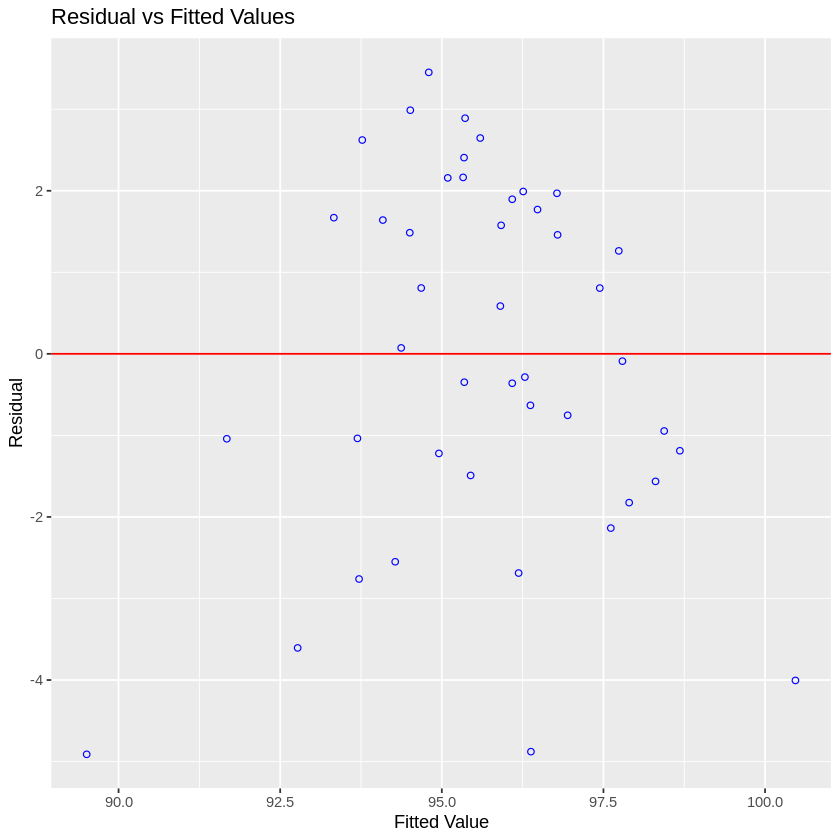

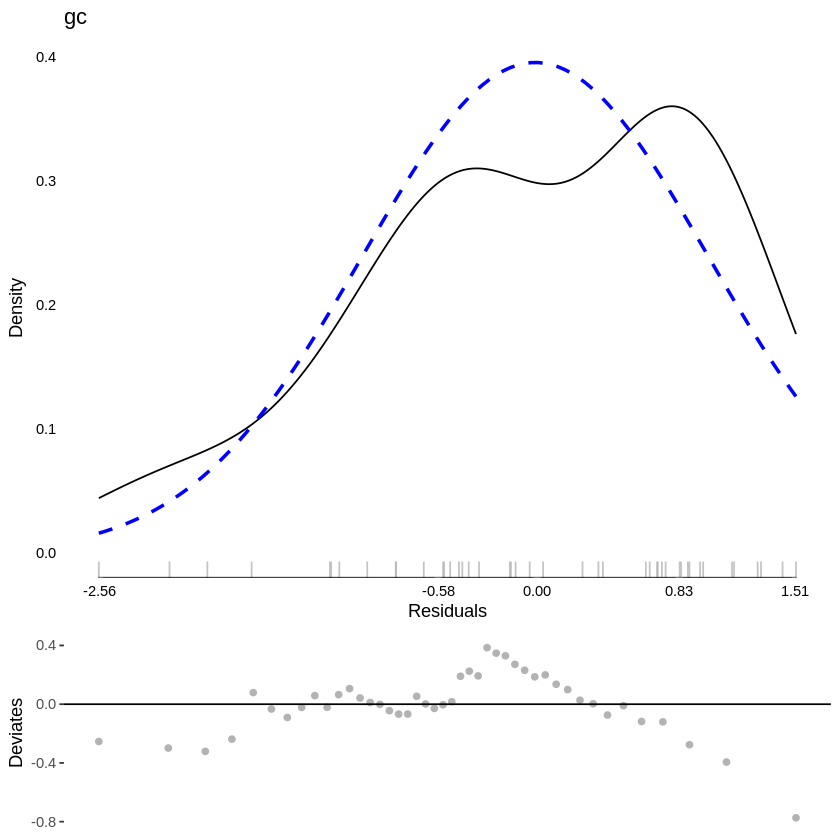

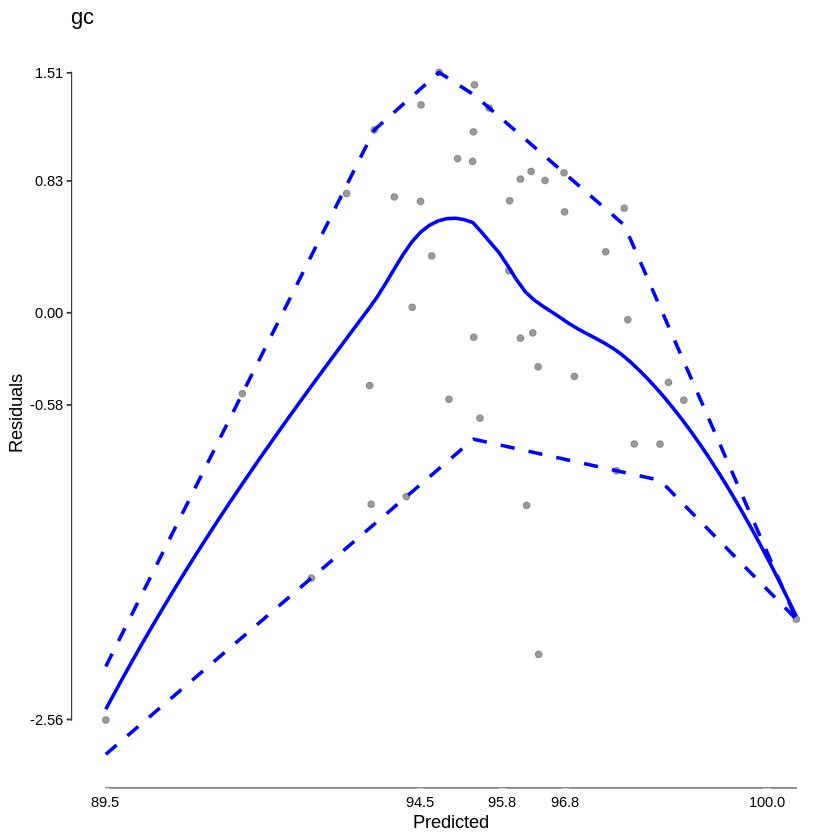

In [67]:
rem <- 44

xvar <- aat[-rem]
obt <- obt[-rem]
dbt <- dbt[-rem]
nrt <- nrt[-rem]
njt <- njt[-rem]
stai <- stai[-rem]
gc <- gc[-rem]

malt <- lm(gc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)